In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

Setting environment for Local Macbook Pro


In [2]:
atlas_name = 'atlasV6'

In [3]:
fixed_brain_name = 'MD589'
moving_brain_names = ['MD585', 'MD594']

In [4]:
resolution = '10.0um'
resolution_um = convert_resolution_string_to_um(resolution)

# Compute mean positions

## Compute instance centroids

In [28]:
structure_centroids_all_brains_um_wrt_fixed = []

fixed_brain_spec = {'name': fixed_brain_name, 'vol_type': 'annotationAsScore', 'resolution': resolution}

fixed_brain = \
DataManager.load_original_volume_all_known_structures_v3(\
stack_spec=fixed_brain_spec, in_bbox_wrt='wholebrain', common_shape=False)

fixed_brain_structure_centroids = get_centroid_3d(fixed_brain)
fixed_brain_structure_centroids_um = {s: c * resolution_um for s, c in fixed_brain_structure_centroids.iteritems()}

structure_centroids_all_brains_um_wrt_fixed.append(fixed_brain_structure_centroids_um)


for brain_m in moving_brain_names:

    moving_brain_spec = {'name': brain_m, 'vol_type': 'annotationAsScore', 'resolution': resolution}
    
    moving_brain = \
    DataManager.load_original_volume_all_known_structures_v3(\
    stack_spec=moving_brain_spec, in_bbox_wrt='wholebrain', common_shape=False)

    alignment_spec = dict(stack_m=moving_brain_spec, stack_f=fixed_brain_spec, warp_setting=109)

    moving_brain_structure_centroids_input_resol = get_centroid_3d(moving_brain)

    # Load registration.
    
    transform_parameters_moving_brain_to_fixed_brain = DataManager.load_alignment_results_v3(alignment_spec=alignment_spec, what='parameters')
    
    # Transform moving brains into alignment with the fixed brain.
    
    transformed_moving_brain_structure_centroids_input_resol_wrt_fixed = \
    dict(zip(moving_brain_structure_centroids_input_resol.keys(),
             transform_points(pts=moving_brain_structure_centroids_input_resol.values(), 
                            transform=transform_parameters_moving_brain_to_fixed_brain)))
    
    transformed_moving_brain_structure_centroids_um_wrt_fixed = \
     {s: c * resolution_um for s, c in transformed_moving_brain_structure_centroids_input_resol_wrt_fixed.iteritems()}
        
    structure_centroids_all_brains_um_wrt_fixed.append(transformed_moving_brain_structure_centroids_um_wrt_fixed)

Prior structure/index map not found. Generating a new one.
Prior structure/index map not found. Generating a new one.


rm -rf "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp" "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp"
1


File does not exist: /media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp
[Errno 2] No such file or directory: '/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp'
Score volume for Sp5C_R does not exist.


/home/yuncong/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json


Prior structure/index map not found. Generating a new one.


/home/yuncong/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json


In [29]:
structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed = defaultdict(list)
for sc in structure_centroids_all_brains_um_wrt_fixed:
    for k, c in sc.iteritems():
        structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed[k].append(c)
structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed.default_factory = None

## Compute standard centroids

In [31]:
nominal_centroids_wrt_canonicalAtlasSpace_um, \
instance_centroids_wrt_canonicalAtlasSpace_um, \
canonical_center_wrt_fixed_um, \
canonical_normal, \
transform_matrix_to_canonicalAtlasSpace_um = \
average_location(structure_centroids_all_brains_um_grouped_by_structure_wrt_fixed)

Mid-sagittal plane normal vector = [ 0.03572533 -0.08990513  0.99530938]
Mid-sagittal plane anchor = [ 11867.15068913   5650.97732404   4646.0404388 ]
Transform matrix to canonical atlas space =
[[  9.99360483e-01   1.60938754e-03  -3.57253260e-02  -1.17026747e+04]
 [  1.60938754e-03   9.95949871e-01   8.99051267e-02  -6.06489183e+03]
 [  3.57253260e-02  -8.99051267e-02   9.95310353e-01  -4.54015815e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Angular deviation around y axis (degree) = 5.5516552563


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


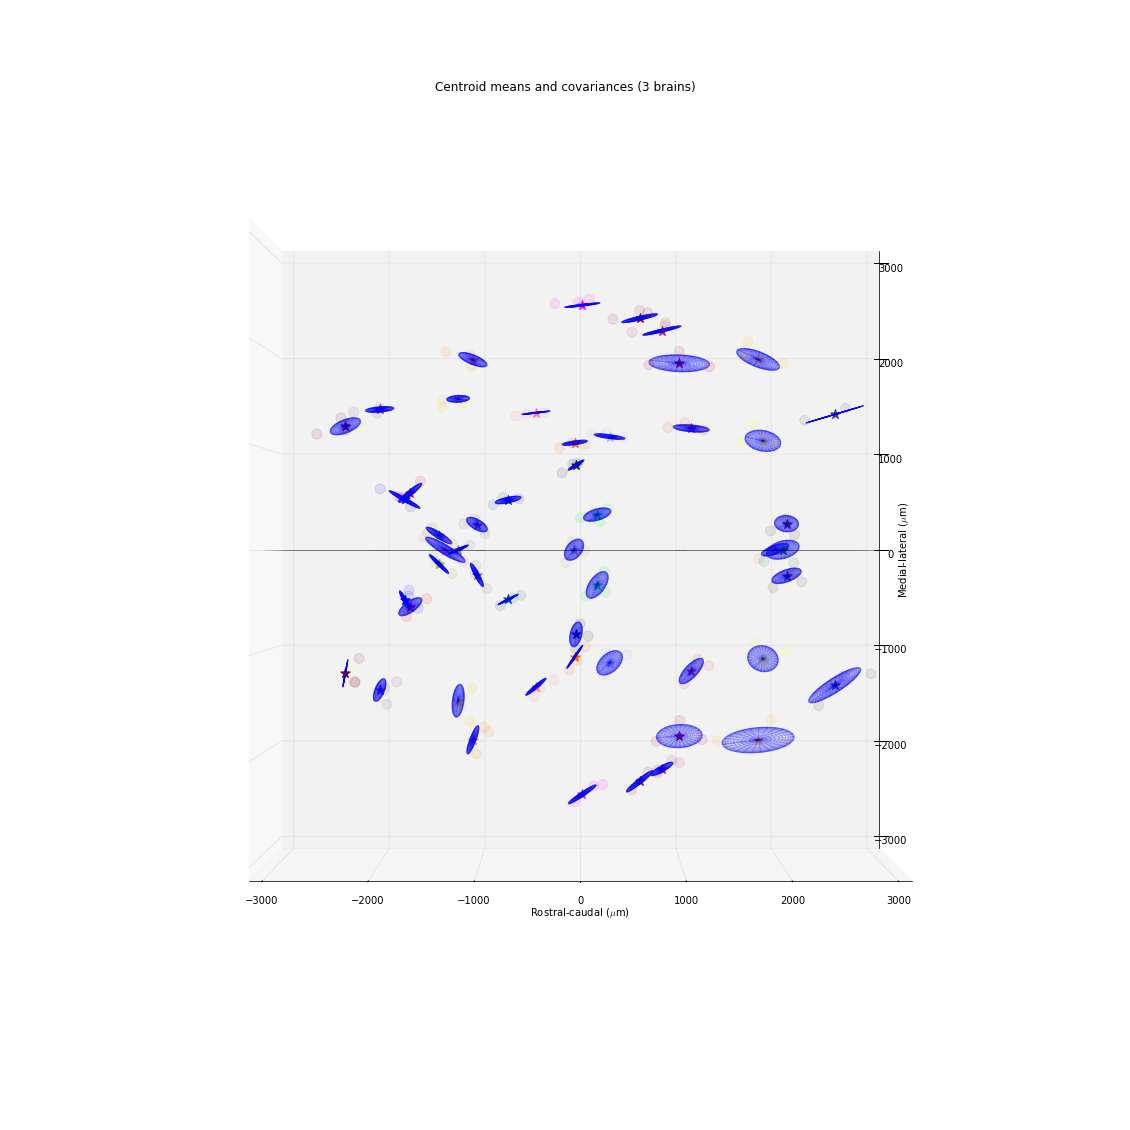

In [32]:
# Unit in microns, center at (0,0,0)

plot_centroid_means_and_covars_3d(instance_centroids=instance_centroids_wrt_canonicalAtlasSpace_um,
                                 nominal_locations=nominal_centroids_wrt_canonicalAtlasSpace_um,
                                 canonical_centroid=(0,0,0),
                                  show_canonical_centroid=False,
                                  canonical_normal=[0,0,1],
                                 colors={name_s: np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.
                                        for name_s in instance_centroids_wrt_canonicalAtlasSpace_um.keys()},
                                 xlim=[-3000, 3000],
                                 ylim=[-3000, 3000],
                                 zlim=[-3000, 3000],
                                 xlabel='Rostral-caudal ($\mu$m)',
                                 ylabel='',
                                 zlabel='Medial-lateral ($\mu$m)',
                                 title='Centroid means and covariances (3 brains)')

In [67]:
save_data(nominal_centroids_wrt_canonicalAtlasSpace_um, 
          DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name, resolution='1um'))

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_1um_meanPositions.pkl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_1um_meanPositions.pkl"
0


# Compute mean shapes

In [40]:
from aligner_v3 import Aligner

In [41]:
# Note that all shapes have voxel resolution matching input resolution (10.0 micron).

# for name_u in ['SNR']:
for name_u in all_known_structures:
    
    print name_u

    # Load instance volumes.
    
    instance_volumes = []
    instance_source = []
    
    if name_u in paired_structures:
        left_name = convert_to_left_name(name_u)
        right_name = convert_to_right_name(name_u)
    else:
        left_name = name_u
        right_name = name_u
            
    for brain_name in [fixed_brain_name] + moving_brain_names:
        
        brain_spec = {'name': brain_name, 'vol_type': 'annotationAsScore', 'resolution': resolution}

        try:
            right_instance_vol, _ = DataManager.load_original_volume_v2(stack_spec=brain_spec, 
                                                                     structure=right_name, 
                                                                    return_origin_instead_of_bbox=True,
                                                                    crop_to_minimal=True)
            instance_volumes.append(right_instance_vol) # if right, do not mirror
            instance_source.append((brain_name, 'R'))
        except Exception as e:
            continue

        try:
            left_instance_vol, _ = DataManager.load_original_volume_v2(stack_spec=brain_spec, 
                                                                     structure=left_name, 
                                                                    return_origin_instead_of_bbox=True,
                                                                    crop_to_minimal=True)
            instance_volumes.append(left_instance_vol[..., ::-1]) # if left, mirror
            instance_source.append((brain_name, 'L'))
        except:
            continue
            
    # Use the first instance as registration target.
    # Register every other instance to the first instance.
    
    template_instance_volume = instance_volumes[0]    
    template_instance_centroid_wrt_templateOrigin = get_centroid_3d(template_instance_volume).astype(np.int16)
    template_instance_wrt_templateCentroid = (template_instance_volume, - template_instance_centroid_wrt_templateOrigin)

    aligned_moving_instance_wrt_templateCentroid_all_instances = []
    
    for i in range(1, len(instance_volumes)):
        
        print 'Registering %s instance %d to instance 0' % (name_u, i)
        
        # Compute transform.

        moving_instance_volume = instance_volumes[i]

        aligner = Aligner({0: template_instance_wrt_templateCentroid}, 
                          {0: (moving_instance_volume, np.array((0,0,0)))}, 
                          labelIndexMap_m2f={0:0},
                         verbose=False)
        aligner.set_centroid(centroid_m='structure_centroid', centroid_f='structure_centroid')
        aligner.compute_gradient(smooth_first=True)

        lr = 1.
        _, _ = aligner.optimize(tf_type='rigid', 
                             history_len=100, 
                            max_iter_num=100 if name_u in ['SC', 'IC'] else 1000,
                             grad_computation_sample_number=None,
                                full_lr=np.array([lr,lr,lr,0.1,0.1,0.1]),
                                terminate_thresh_trans=.01
                               )
        
#         plt.figure();
#         plt.plot(aligner.scores);
#         plt.show();
        
        DataManager.save_alignment_results_v3(aligner=aligner, 
                                              select_best='max_value',
                          alignment_spec=dict(warp_setting=108, 
                                              stack_f=dict(name='%s_instance0' % name_u, vol_type='annotationAsScore'),
                                             stack_m=dict(name='%s_instance%d' % (name_u, i), vol_type='annotationAsScore')),
                                     reg_root_dir=os.path.join(MESH_ROOTDIR, atlas_name, 'mean_shapes', 'instance_registration'))        
        
        # Transform instances.

        T = convert_transform_forms(aligner=aligner, out_form=(3,4), select_best='max_value')
        
        aligned_moving_instance_volume, aligned_moving_instance_origin_wrt_templateCentroid = \
        transform_volume_v4(volume=(moving_instance_volume, (0,0,0)), transform=T,
                            return_origin_instead_of_bbox=True)

        aligned_moving_instance_wrt_templateCentroid = (aligned_moving_instance_volume, aligned_moving_instance_origin_wrt_templateCentroid)        
        aligned_moving_instance_wrt_templateCentroid_all_instances.append(aligned_moving_instance_wrt_templateCentroid)

    # Generate meshes for each instance.
    
    instance_mesh_wrt_templateCentroid_all_instances = [
        volume_to_polydata(v, origin=o, num_simplify_iter=3, smooth=True)
        for v, o in 
        [template_instance_wrt_templateCentroid] + aligned_moving_instance_wrt_templateCentroid_all_instances]
    
#     launch_vtk([actor_mesh(mesh, wireframe=True, color=np.array(high_contrast_colors[i+1])/255., opacity=1, wireframe_linewidth=3) 
#         for i, mesh in enumerate(instance_mesh_wrt_templateCentroid_all_instances)], 
#       background_color=(1,1,1))

    # Save meshes.
    
    for i, m in enumerate(instance_mesh_wrt_templateCentroid_all_instances):
        save_data(m, DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=name_u, 
                                                    resolution='10um', index=i))
        
    save_data(instance_source, DataManager.get_instance_sources_filepath(atlas_name=atlas_name, structure=name_u))

    # Compute average shape.
    
    if name_u == 'IC' or name_u == 'SC':
        # IC and SC boundaries are particularly jagged, so do a larger value smoothing.
        sigma = 5.
    else:
        sigma = 2.

    mean_shape_wrt_templateCentroid = \
        average_shape(volume_origin_list=[template_instance_wrt_templateCentroid] + \
                      aligned_moving_instance_wrt_templateCentroid_all_instances,
                      force_symmetric=(name_u in singular_structures), 
                      sigma=sigma,
                     )
        
    for surface_level in np.arange(0.1, 1.1, .1):
        print "level =", surface_level, ', volume =', \
        np.count_nonzero(mean_shape_wrt_templateCentroid[0] > surface_level) *  resolution_um ** 3 / 1e9, "mm^3"
        
    # Generate meshes for mean shape.
        
    mean_shape_isosurface_polydata_all_levels = \
    {surface_level:         
        volume_to_polydata(mean_shape_wrt_templateCentroid[0] >= surface_level, 
                           origin=mean_shape_wrt_templateCentroid[1], 
                             num_simplify_iter=3, smooth=True, 
                             return_mesh=False)
    for surface_level in np.arange(0.1, 1.1, .1)}
            
    # Identify the surrouding area as additional structure.
    
    wall_level = .5
    surround_distance_um = 200.
        
    surround_wrt_stdShapeCentroid = \
    get_surround_volume_v2(vol=mean_shape_wrt_templateCentroid[0], 
                           origin=mean_shape_wrt_templateCentroid[1],
                           wall_level=wall_level, 
                           distance=surround_distance_um / resolution_um, 
                           prob=True, 
                           return_origin_instead_of_bbox=True, 
                           padding=5)

    # Generate meshes for surrouding area.
        
    surround_isosurface_polydata_all_levels = \
    {surface_level:         
        volume_to_polydata(surround_wrt_stdShapeCentroid[0] >= surface_level, 
                           origin=surround_wrt_stdShapeCentroid[1], 
                             num_simplify_iter=3, smooth=True, 
                             return_mesh=False)
    for surface_level in np.arange(0.1, 1.1, .1)}
    
    
    # Save mean shape.

    save_data(mean_shape_wrt_templateCentroid[0], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, 
                                                       what='volume', resolution=resolution))

    save_data(mean_shape_wrt_templateCentroid[1], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, 
                                                       what='origin_wrt_meanShapeCentroid', resolution=resolution))

    for level in np.arange(0.1, 1.1, .1):
        save_data(mean_shape_isosurface_polydata_all_levels[level], 
                       DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, 
                                                           what='mesh', resolution=resolution, level=level))

    surround_name = convert_to_surround_name(name_u, margin=str(int(surround_distance_um))+'um')

    save_data(surround_wrt_stdShapeCentroid[0], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=surround_name, 
                                                       what='volume', resolution=resolution))

    save_data(surround_wrt_stdShapeCentroid[1], 
                   DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=surround_name, 
                                                       what='origin_wrt_meanShapeCentroid', resolution=resolution))

    for level in np.arange(0.1, 1.1, .1):
        save_data(surround_isosurface_polydata_all_levels[level], 
                       DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=surround_name, 
                                                           what='mesh', resolution=resolution, level=level))

5N
Registering 5N instance 1 to instance 0
Computing gradient for 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 29.63803623  41.75503797  20.04490043], centroid_f: [ 0.76469797  0.34528704  0.29166346]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 33.73320874  32.28375914  25.02870524], centroid_f: [ 0.76469797  0.34528704  0.29166346]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 34.39788062  37.57499478  20.86801164], centroid_f: [ 0.76469797  0.34528704  0.29166346]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 29.09946158  34.48541205  23.37807056], centroid_f: [ 0.76469797  0.34528704  0.29166346]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 35.8541372   32.72830057  26.56468129], centroid_f: [ 0.76469797  0.34528704  0.29166346]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance5/5N_instance5_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5

Interpolating/filling sparse volume: 0.01 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 15983: 0.18 seconds
simplify 1 @ 3198: 0.12 seconds
simplify 2 @ 641: 0.03 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15362: 0.14 seconds
simplify 1 @ 3075: 0.12 seconds
simplify 2 @ 616: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13190: 0.12 seconds
simplify 1 @ 2640: 0.09 seconds
simplify 2 @ 529: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17172: 0.13 seconds
simplify 1 @ 3436: 0.13 seconds
simplify 2 @ 688: 0.03 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15315: 0.11 seconds
simplify 1 @ 3066: 0.11 seconds
simplify 2 @ 614: 0.03 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_5N_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

simplify 0 @ 15048: 0.13 seconds
simplify 1 @ 3011: 0.11 seconds
simplify 2 @ 603: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18288: 0.14 seconds
simplify 1 @ 3659: 0.14 seconds
simplify 2 @ 733: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15792: 0.12 seconds
simplify 1 @ 3160: 0.11 seconds
simplify 2 @ 633: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 14477: 0.11 seconds
simplify 1 @ 2897: 0.10 seconds
simplify 2 @ 581: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 13526: 0.10 seconds
simplify 1 @ 2706: 0.10 seconds
simplify 2 @ 542: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12651: 0.10 seconds
simplify 1 @ 2531: 0.09 seconds
simplify 2 @ 507: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11876: 0.08 seconds
simplify 1 @ 2376: 0.08 seconds
simpl

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_5N_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 10.58515091  11.81780128   9.03965631], centroid_f: [ 0.0758209   0.93373134  0.13552239]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance1/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance1/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance1/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance1/6N_instance1_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 11.0512664    8.86176381   9.45590479], centroid_f: [ 0.0758209   0.93373134  0.13552239]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance2/6N_instance2_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 14.61570163  10.26396044  10.71646404], centroid_f: [ 0.0758209   0.93373134  0.13552239]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance3/6N_instance3_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 11.06600362   8.17337251  10.77237794], centroid_f: [ 0.0758209   0.93373134  0.13552239]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance4/6N_instance4_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  8.64069574  13.32880629  11.86347391], centroid_f: [ 0.0758209   0.93373134  0.13552239]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/6N_instance5/6N_instance5_annotationAsScoreVolume_warp108_6N_instance0_annotationAsScoreVolume/6

Interpolating/filling sparse volume: 0.00 seconds.
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 878: 0.01 seconds
simplify 1 @ 177: 0.01 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1292: 0.01 seconds
simplify 1 @ 260: 0.01 seconds
simplify 2 @ 53: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1170: 0.01 seconds
simplify 1 @ 235: 0.01 seconds
simplify 2 @ 48: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1695: 0.01 seconds
simplify 1 @ 340: 0.01 seconds
simplify 2 @ 69: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1727: 0.01 seconds
simplify 1 @ 347: 0.01 seconds
simplify 2 @ 71: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1730: 0.01 seconds
simplify 1 @ 347: 0.01 seconds
simplify 2 @ 71: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_6N_5.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/instance_sour

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2295: 0.02 seconds
simplify 1 @ 460: 0.01 seconds
simplify 2 @ 93: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1964: 0.01 seconds
simplify 1 @ 394: 0.01 seconds
simplify 2 @ 80: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1662: 0.01 seconds
simplify 1 @ 334: 0.01 seconds
simplify 2 @ 68: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1409: 0.01 seconds
simplify 1 @ 283: 0.01 seconds
simplify 2 @ 58: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1225: 0.01 seconds
simplify 1 @ 246: 0.01 seconds
simplify 2 @ 50: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 987: 0.01 seconds
simplify 1 @ 199: 0.01 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 798: 0.01 seconds
simplify 1 @ 161: 0.00 second

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_6N_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 45.22839224  26.51533908  46.47644335], centroid_f: [ 0.44528528  0.04330523  0.41486203]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance1/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance1/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance1/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance1/7N_instance1_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 47.04242733  27.35839104  38.48801203], centroid_f: [ 0.44528528  0.04330523  0.41486203]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance2/7N_instance2_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 40.14785153  30.20582989  42.96843161], centroid_f: [ 0.44528528  0.04330523  0.41486203]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance3/7N_instance3_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 42.69450311  33.52410418  38.49579385], centroid_f: [ 0.44528528  0.04330523  0.41486203]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance4/7N_instance4_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 45.24150963  31.12094086  42.43949502], centroid_f: [ 0.44528528  0.04330523  0.41486203]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7N_instance5/7N_instance5_annotationAsScoreVolume_warp108_7N_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.03 seconds.
marching cube: 0.07 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23034: 0.21 seconds
simplify 1 @ 4608: 0.20 seconds
simplify 2 @ 923: 0.04 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 28170: 0.24 seconds
simplify 1 @ 5635: 0.25 seconds
simplify 2 @ 1128: 0.05 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 26296: 0.24 seconds
simplify 1 @ 5260: 0.26 seconds
simplify 2 @ 1053: 0.05 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26694: 0.24 seconds
simplify 1 @ 5342: 0.27 seconds
simplify 2 @ 1069: 0.05 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26624: 0.25 seconds
simplify 1 @ 5326: 0.26 seconds
simplify 2 @ 1066: 0.05 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7N_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

simplify 0 @ 31691: 0.28 seconds
simplify 1 @ 6341: 0.31 seconds
simplify 2 @ 1269: 0.07 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27087: 0.22 seconds
simplify 1 @ 5419: 0.22 seconds
simplify 2 @ 1085: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24738: 0.20 seconds
simplify 1 @ 4949: 0.20 seconds
simplify 2 @ 991: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23330: 0.19 seconds
simplify 1 @ 4667: 0.19 seconds
simplify 2 @ 935: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 22315: 0.18 seconds
simplify 1 @ 4464: 0.18 seconds
simplify 2 @ 894: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21458: 0.17 seconds
simplify 1 @ 4293: 0.17 seconds
simplify 2 @ 860: 0.03 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20549: 0.16 seconds
simplify 1 @ 4111: 0.16 seconds
sim

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7N_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

simplify 1 @ 13946: 1.17 seconds
simplify 2 @ 2763: 0.23 seconds
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 55.51404195  57.75442588  63.20068255], centroid_f: [ 0.74210024  0.05175225  0.11051968]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance1/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance1/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance1/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance1/7n_instance1_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 43.69479348  40.08263918  82.61303277], centroid_f: [ 0.74210024  0.05175225  0.11051968]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance2/7n_instance2_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 62.65035738  56.55438591  60.46305495], centroid_f: [ 0.74210024  0.05175225  0.11051968]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance3/7n_instance3_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.13 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 39.34245391  54.52490329  61.67017131], centroid_f: [ 0.74210024  0.05175225  0.11051968]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance4/7n_instance4_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.07 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 38.808071    55.10711648  67.29417717], centroid_f: [ 0.74210024  0.05175225  0.11051968]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/7n_instance5/7n_instance5_annotationAsScoreVolume_warp108_7n_instance0_annotationAsScoreVolume/7

Interpolating/filling sparse volume: 0.07 seconds.
marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18733: 0.17 seconds
simplify 1 @ 3748: 0.16 seconds
simplify 2 @ 751: 0.04 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22425: 0.20 seconds
simplify 1 @ 4487: 0.22 seconds
simplify 2 @ 898: 0.05 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20145: 0.19 seconds
simplify 1 @ 4030: 0.19 seconds
simplify 2 @ 807: 0.04 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 21935: 0.20 seconds
simplify 1 @ 4390: 0.22 seconds
simplify 2 @ 879: 0.05 seconds
marching cube: 0.20 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20880: 0.19 seconds
simplify 1 @ 4177: 0.20 seconds
simplify 2 @ 837: 0.04 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 22833: 0.21 seconds
simplify 1 @ 4567: 0.22 seconds
simplify 2 @ 914: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_7n_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 0.22 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23971: 0.19 seconds
simplify 1 @ 4795: 0.21 seconds
simplify 2 @ 960: 0.05 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21449: 0.17 seconds
simplify 1 @ 4291: 0.18 seconds
simplify 2 @ 859: 0.04 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19784: 0.15 seconds
simplify 1 @ 3958: 0.17 seconds
simplify 2 @ 793: 0.04 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18342: 0.14 seconds
simplify 1 @ 3670: 0.15 seconds
simplify 2 @ 735: 0.03 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17055: 0.13 seconds
simplify 1 @ 3412: 0.14 seconds
simplify 2 @ 684: 0.03 seconds
marching cube: 0.21 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15913: 0.12 seconds
simplify 1 @ 3184: 0.13 seconds
simplify 2 @ 638: 0.03 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_7n_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 23.23133605  10.60345162   5.24801241], centroid_f: [ 0.53233621  0.38677059  0.82283548]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance1/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance1/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance1/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance1/Amb_instance1_annotationAsScoreVolume_warp108_Amb_instance0_annotat

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 17.54623168  10.86304955   6.06856246], centroid_f: [ 0.53233621  0.38677059  0.82283548]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance2/Amb_instance2_annotationAsScoreVolume_warp108_Amb_instance0_annotat

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 29.55308796  12.54435434   4.90642545], centroid_f: [ 0.53233621  0.38677059  0.82283548]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance3/Amb_instance3_annotationAsScoreVolume_warp108_Amb_instance0_annotat

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 19.62415558  10.4174002    4.8345957 ], centroid_f: [ 0.53233621  0.38677059  0.82283548]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance4/Amb_instance4_annotationAsScoreVolume_warp108_Amb_instance0_annotat

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 21.1753306    9.68239854   4.05745554], centroid_f: [ 0.53233621  0.38677059  0.82283548]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Amb_instance5/Amb_instance5_annotationAsScoreVolume_warp108_Amb_instance0_annotat

Interpolating/filling sparse volume: 0.00 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1483: 0.05 seconds
simplify 1 @ 298: 0.02 seconds
simplify 2 @ 61: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1465: 0.05 seconds
simplify 1 @ 294: 0.02 seconds
simplify 2 @ 60: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1697: 0.05 seconds
simplify 1 @ 341: 0.02 seconds
simplify 2 @ 69: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2415: 0.07 seconds
simplify 1 @ 484: 0.03 seconds
simplify 2 @ 98: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1265: 0.05 seconds
simplify 1 @ 254: 0.02 seconds
simplify 2 @ 52: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1122: 0.04 seconds
simplify 1 @ 226: 0.02 seconds
simplify 2 @ 46: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Amb_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2608: 0.03 seconds
simplify 1 @ 523: 0.02 seconds
simplify 2 @ 106: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2096: 0.03 seconds
simplify 1 @ 420: 0.01 seconds
simplify 2 @ 85: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1872: 0.02 seconds
simplify 1 @ 376: 0.01 seconds
simplify 2 @ 76: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1627: 0.02 seconds
simplify 1 @ 327: 0.01 seconds
simplify 2 @ 67: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1319: 0.02 seconds
simplify 1 @ 265: 0.01 seconds
simplify 2 @ 54: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1177: 0.01 seconds
simplify 1 @ 237: 0.01 seconds
simplify 2 @ 49: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 837: 0.01 secon

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Amb_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 29.5030576   34.92127138   8.29968142], centroid_f: [ 0.33886183  0.02740613  0.25889389]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance1/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance1/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance1/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance1/LC_instance1_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/L

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 34.03189185  27.8297471    6.73033394], centroid_f: [ 0.33886183  0.02740613  0.25889389]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance2/LC_instance2_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/L

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 27.9765547   29.63194472   6.9857411 ], centroid_f: [ 0.33886183  0.02740613  0.25889389]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance3/LC_instance3_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/L

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 37.01397474  25.33951447  10.88744065], centroid_f: [ 0.33886183  0.02740613  0.25889389]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance4/LC_instance4_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/L

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 44.12910703  28.95532248  11.07182593], centroid_f: [ 0.33886183  0.02740613  0.25889389]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LC_instance5/LC_instance5_annotationAsScoreVolume_warp108_LC_instance0_annotationAsScoreVolume/L

Interpolating/filling sparse volume: 0.01 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8801: 0.09 seconds
simplify 1 @ 1761: 0.07 seconds
simplify 2 @ 353: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8278: 0.09 seconds
simplify 1 @ 1657: 0.06 seconds
simplify 2 @ 332: 0.02 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8702: 0.09 seconds
simplify 1 @ 1741: 0.07 seconds
simplify 2 @ 349: 0.02 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7221: 0.08 seconds
simplify 1 @ 1445: 0.05 seconds
simplify 2 @ 290: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7978: 0.07 seconds
simplify 1 @ 1597: 0.06 seconds
simplify 2 @ 321: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7642: 0.11 seconds
simplify 1 @ 1530: 0.06 seconds
simplify 2 @ 307: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LC_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10570: 0.09 seconds
simplify 1 @ 2115: 0.07 seconds
simplify 2 @ 424: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9329: 0.07 seconds
simplify 1 @ 1867: 0.06 seconds
simplify 2 @ 375: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8338: 0.06 seconds
simplify 1 @ 1669: 0.06 seconds
simplify 2 @ 335: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7541: 0.06 seconds
simplify 1 @ 1509: 0.05 seconds
simplify 2 @ 303: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6925: 0.05 seconds
simplify 1 @ 1386: 0.05 seconds
simplify 2 @ 278: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6186: 0.05 seconds
simplify 1 @ 1238: 0.04 seconds
simplify 2 @ 249: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 556

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LC_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 48.22492861  40.2615068   30.93390937], centroid_f: [ 0.99256715  0.97806839  0.47688944]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance1/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance1/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance1/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance1/LRt_instance1_annotationAsScoreVolume_warp108_LRt_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 58.32941037  50.77759567  22.20706133], centroid_f: [ 0.99256715  0.97806839  0.47688944]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance2/LRt_instance2_annotationAsScoreVolume_warp108_LRt_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 57.13453031  59.46778149  26.00859004], centroid_f: [ 0.99256715  0.97806839  0.47688944]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance3/LRt_instance3_annotationAsScoreVolume_warp108_LRt_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 71.66399399  45.55739169  34.57080471], centroid_f: [ 0.99256715  0.97806839  0.47688944]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance4/LRt_instance4_annotationAsScoreVolume_warp108_LRt_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 67.79114227  40.52815396  30.88302946], centroid_f: [ 0.99256715  0.97806839  0.47688944]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/LRt_instance5/LRt_instance5_annotationAsScoreVolume_warp108_LRt_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
marching cube: 0.14 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 25936: 0.43 seconds
simplify 1 @ 5189: 0.40 seconds
simplify 2 @ 1039: 0.09 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 21358: 0.36 seconds
simplify 1 @ 4273: 0.32 seconds
simplify 2 @ 856: 0.07 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 25427: 0.42 seconds
simplify 1 @ 5088: 0.39 seconds
simplify 2 @ 1019: 0.09 seconds
marching cube: 0.21 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 22252: 0.45 seconds
simplify 1 @ 4452: 0.26 seconds
simplify 2 @ 891: 0.06 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 31929: 0.42 seconds
simplify 1 @ 6366: 0.37 seconds
simplify 2 @ 1271: 0.08 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_LRt_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

simplify 0 @ 26430: 0.37 seconds
simplify 1 @ 5287: 0.30 seconds
simplify 2 @ 1059: 0.06 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31358: 0.27 seconds
simplify 1 @ 6273: 0.29 seconds
simplify 2 @ 1256: 0.06 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27146: 0.22 seconds
simplify 1 @ 5430: 0.24 seconds
simplify 2 @ 1087: 0.05 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24631: 0.19 seconds
simplify 1 @ 4927: 0.22 seconds
simplify 2 @ 987: 0.05 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22547: 0.20 seconds
simplify 1 @ 4511: 0.22 seconds
simplify 2 @ 903: 0.05 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20562: 0.18 seconds
simplify 1 @ 4114: 0.20 seconds
simplify 2 @ 824: 0.04 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18805: 0.17 seconds
simplify 1 @ 3762: 0.18 seconds
si

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_LRt_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 37.16249492  58.64997603  38.91111786], centroid_f: [ 0.13630671  0.52273486  0.88550221]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance1/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance1/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance1/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance1/Pn_instance1_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/P

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 49.17892643  50.13707849  38.6573988 ], centroid_f: [ 0.13630671  0.52273486  0.88550221]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance2/Pn_instance2_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/P

Interpolating/filling sparse volume: 0.12 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 50.81240237  47.58072022  39.24360877], centroid_f: [ 0.13630671  0.52273486  0.88550221]
indices_f: set([0])


Computing gradient for 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance3/Pn_instance3_annotationAsScoreVolume_warp108_Pn_instance0_

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 47.1966183   44.65894412  34.01928852], centroid_f: [ 0.13630671  0.52273486  0.88550221]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance4/Pn_instance4_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/P

Interpolating/filling sparse volume: 0.08 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 51.80365892  46.02840467  41.0276233 ], centroid_f: [ 0.13630671  0.52273486  0.88550221]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Pn_instance5/Pn_instance5_annotationAsScoreVolume_warp108_Pn_instance0_annotationAsScoreVolume/P

Interpolating/filling sparse volume: 0.05 seconds.
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 37225: 0.39 seconds
simplify 1 @ 7447: 0.35 seconds
simplify 2 @ 1490: 0.07 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 42993: 0.37 seconds
simplify 1 @ 8601: 0.42 seconds
simplify 2 @ 1721: 0.08 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 47445: 0.43 seconds
simplify 1 @ 9491: 0.50 seconds
simplify 2 @ 1899: 0.10 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 43075: 0.43 seconds
simplify 1 @ 8618: 0.45 seconds
simplify 2 @ 1724: 0.09 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35563: 0.34 seconds
simplify 1 @ 7116: 0.37 seconds
simplify 2 @ 1424: 0.07 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 44944: 0.41 seconds
simplify 1 @ 8993: 0.58 seconds
simplify 2 @ 1799: 0.19 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Pn_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 0.15 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 41424: 0.35 seconds
simplify 1 @ 8286: 0.38 seconds
simplify 2 @ 1658: 0.08 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 38028: 0.34 seconds
simplify 1 @ 7607: 0.36 seconds
simplify 2 @ 1523: 0.07 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35545: 0.32 seconds
simplify 1 @ 7110: 0.33 seconds
simplify 2 @ 1423: 0.07 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33337: 0.30 seconds
simplify 1 @ 6669: 0.31 seconds
simplify 2 @ 1335: 0.06 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31334: 0.28 seconds
simplify 1 @ 6268: 0.29 seconds
simplify 2 @ 1255: 0.06 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 29633: 0.28 seconds
simplify 1 @ 5928: 0.33 seconds
simplify 2 @ 1187: 0.07 seconds
marching cube: 0.30 seconds
mesh_to_polydata: 0.06 seconds
simpl

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Pn_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

simplify 0 @ 86591: 1.38 seconds
simplify 1 @ 17260: 1.04 seconds
simplify 2 @ 3411: 0.22 seconds
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 38.87548558  22.35238335  26.20257301], centroid_f: [ 0.22088999  0.18435931  0.26275771]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance1/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance1/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance1/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance1/Tz_instance1_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/T

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 39.40828374  16.67554548  29.59391235], centroid_f: [ 0.22088999  0.18435931  0.26275771]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance2/Tz_instance2_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/T

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 50.36943812  16.47385475  26.78139895], centroid_f: [ 0.22088999  0.18435931  0.26275771]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance3/Tz_instance3_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/T

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 43.6552935   10.85382542  23.82618546], centroid_f: [ 0.22088999  0.18435931  0.26275771]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance4/Tz_instance4_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/T

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 38.69524564  14.16549575  16.51097259], centroid_f: [ 0.22088999  0.18435931  0.26275771]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Tz_instance5/Tz_instance5_annotationAsScoreVolume_warp108_Tz_instance0_annotationAsScoreVolume/T

Interpolating/filling sparse volume: 0.01 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10666: 0.10 seconds
simplify 1 @ 2134: 0.08 seconds
simplify 2 @ 428: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11768: 0.10 seconds
simplify 1 @ 2355: 0.09 seconds
simplify 2 @ 472: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11824: 0.09 seconds
simplify 1 @ 2366: 0.08 seconds
simplify 2 @ 474: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12820: 0.11 seconds
simplify 1 @ 2566: 0.10 seconds
simplify 2 @ 514: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12466: 0.10 seconds
simplify 1 @ 2494: 0.09 seconds
simplify 2 @ 500: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10644: 0.08 seconds
simplify 1 @ 2130: 0.08 seconds
simplify 2 @ 427: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Tz_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12217: 0.11 seconds
simplify 1 @ 2445: 0.09 seconds
simplify 2 @ 490: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10717: 0.09 seconds
simplify 1 @ 2145: 0.07 seconds
simplify 2 @ 430: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9730: 0.09 seconds
simplify 1 @ 1947: 0.07 seconds
simplify 2 @ 391: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9035: 0.08 seconds
simplify 1 @ 1808: 0.06 seconds
simplify 2 @ 363: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8342: 0.07 seconds
simplify 1 @ 1670: 0.06 seconds
simplify 2 @ 335: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7793: 0.07 seconds
simplify 1 @ 1560: 0.05 seconds
simplify 2 @ 313: 0.01 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 71

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Tz_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  47.21556635  117.75526174   43.10694969], centroid_f: [ 0.95560399  0.35702337  0.48305368]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance1/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance1/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance1/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance1/VLL_instance1_annotationAsScoreVolume_warp108_VLL_instance0_annotat

Interpolating/filling sparse volume: 0.09 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  36.05909311  109.6533132    21.1689851 ], centroid_f: [ 0.95560399  0.35702337  0.48305368]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance2/VLL_instance2_annotationAsScoreVolume_warp108_VLL_instance0_annotat

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 34.55205302  95.6344699   25.69165672], centroid_f: [ 0.95560399  0.35702337  0.48305368]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance3/VLL_instance3_annotationAsScoreVolume_warp108_VLL_instance0_annotat

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  30.02943368  108.74568841   21.30305209], centroid_f: [ 0.95560399  0.35702337  0.48305368]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance4/VLL_instance4_annotationAsScoreVolume_warp108_VLL_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  30.37327597  116.58272142   24.24201439], centroid_f: [ 0.95560399  0.35702337  0.48305368]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VLL_instance5/VLL_instance5_annotationAsScoreVolume_warp108_VLL_instance0_annotat

Interpolating/filling sparse volume: 0.10 seconds.
marching cube: 0.30 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 20772: 0.45 seconds
simplify 1 @ 4156: 0.32 seconds
simplify 2 @ 832: 0.07 seconds
marching cube: 0.44 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 35732: 0.51 seconds
simplify 1 @ 7140: 0.39 seconds
simplify 2 @ 1424: 0.08 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23887: 0.28 seconds
simplify 1 @ 4779: 0.24 seconds
simplify 2 @ 957: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22648: 0.26 seconds
simplify 1 @ 4532: 0.23 seconds
simplify 2 @ 907: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 23851: 0.40 seconds
simplify 1 @ 4729: 0.25 seconds
simplify 2 @ 933: 0.05 seconds
marching cube: 0.18 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 25728: 0.36 seconds
simplify 1 @ 5101: 0.33 seconds
simplify 2 @ 992: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VLL_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.30 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39407: 0.40 seconds
simplify 1 @ 7883: 0.38 seconds
simplify 2 @ 1578: 0.08 seconds
marching cube: 0.31 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25609: 0.26 seconds
simplify 1 @ 5123: 0.25 seconds
simplify 2 @ 1026: 0.05 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 22665: 0.24 seconds
simplify 1 @ 4534: 0.22 seconds
simplify 2 @ 908: 0.05 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20741: 0.22 seconds
simplify 1 @ 4149: 0.20 seconds
simplify 2 @ 831: 0.04 seconds
marching cube: 0.34 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18921: 0.21 seconds
simplify 1 @ 3785: 0.18 seconds
simplify 2 @ 758: 0.04 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17210: 0.18 seconds
simplify 1 @ 3443: 0.16 seconds
simplify 2 @ 690: 0.03 seconds
marching cube: 0.36 seconds
mesh_to_polydata: 0.03 seconds
simplify 

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VLL_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

simplify 1 @ 12425: 1.07 seconds
simplify 2 @ 2457: 0.23 seconds
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 28.52221948  24.06954841  24.21804469], centroid_f: [ 0.63073183  0.82384934  0.56215241]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance1/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance1/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance1/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance1/RMC_instance1_annotationAsScoreVolume_warp108_RMC_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 37.84501641  26.62198718  41.19233054], centroid_f: [ 0.63073183  0.82384934  0.56215241]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance2/RMC_instance2_annotationAsScoreVolume_warp108_RMC_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 24.90818852  31.33289553  26.56076985], centroid_f: [ 0.63073183  0.82384934  0.56215241]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance3/RMC_instance3_annotationAsScoreVolume_warp108_RMC_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 38.02274734  30.3608668   21.99150507], centroid_f: [ 0.63073183  0.82384934  0.56215241]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance4/RMC_instance4_annotationAsScoreVolume_warp108_RMC_instance0_annotat

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 28.11528567  34.17884214  21.28801561], centroid_f: [ 0.63073183  0.82384934  0.56215241]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RMC_instance5/RMC_instance5_annotationAsScoreVolume_warp108_RMC_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15381: 0.17 seconds
simplify 1 @ 3077: 0.13 seconds
simplify 2 @ 617: 0.03 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12180: 0.09 seconds
simplify 1 @ 2438: 0.10 seconds
simplify 2 @ 489: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20362: 0.17 seconds
simplify 1 @ 4076: 0.18 seconds
simplify 2 @ 816: 0.04 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12143: 0.09 seconds
simplify 1 @ 2431: 0.10 seconds
simplify 2 @ 487: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15440: 0.12 seconds
simplify 1 @ 3090: 0.13 seconds
simplify 2 @ 619: 0.03 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15386: 0.11 seconds
simplify 1 @ 3080: 0.13 seconds
simplify 2 @ 617: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RMC_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18566: 0.15 seconds
simplify 1 @ 3714: 0.15 seconds
simplify 2 @ 744: 0.03 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14431: 0.11 seconds
simplify 1 @ 2887: 0.11 seconds
simplify 2 @ 579: 0.03 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12869: 0.10 seconds
simplify 1 @ 2575: 0.10 seconds
simplify 2 @ 516: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11598: 0.09 seconds
simplify 1 @ 2321: 0.09 seconds
simplify 2 @ 465: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10545: 0.08 seconds
simplify 1 @ 2110: 0.08 seconds
simplify 2 @ 423: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9553: 0.07 seconds
simplify 1 @ 1912: 0.07 seconds
simplify 2 @ 384: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RMC_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 32.71222572  56.23691403  41.45857518], centroid_f: [ 0.85206971  0.46300829  0.89711739]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance1/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance1/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance1/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance1/SNC_instance1_annotationAsScoreVolume_warp108_SNC_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 36.55899964  60.91759405  47.68507318], centroid_f: [ 0.85206971  0.46300829  0.89711739]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance2/SNC_instance2_annotationAsScoreVolume_warp108_SNC_instance0_annotat

Interpolating/filling sparse volume: 0.08 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 39.36751361  63.15084011  30.06758972], centroid_f: [ 0.85206971  0.46300829  0.89711739]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance3/SNC_instance3_annotationAsScoreVolume_warp108_SNC_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 22.8020899   62.18901693  42.76025494], centroid_f: [ 0.85206971  0.46300829  0.89711739]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance4/SNC_instance4_annotationAsScoreVolume_warp108_SNC_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 22.01525445  65.26411191  46.02229496], centroid_f: [ 0.85206971  0.46300829  0.89711739]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNC_instance5/SNC_instance5_annotationAsScoreVolume_warp108_SNC_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14956: 0.11 seconds
simplify 1 @ 2992: 0.12 seconds
simplify 2 @ 600: 0.03 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20158: 0.16 seconds
simplify 1 @ 4033: 0.18 seconds
simplify 2 @ 808: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18625: 0.14 seconds
simplify 1 @ 3726: 0.16 seconds
simplify 2 @ 746: 0.03 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15803: 0.12 seconds
simplify 1 @ 3162: 0.13 seconds
simplify 2 @ 634: 0.03 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17369: 0.13 seconds
simplify 1 @ 3475: 0.15 seconds
simplify 2 @ 696: 0.03 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17774: 0.13 seconds
simplify 1 @ 3556: 0.15 seconds
simplify 2 @ 712: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNC_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 22349: 0.14 seconds
simplify 1 @ 4471: 0.19 seconds
simplify 2 @ 895: 0.04 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18596: 0.11 seconds
simplify 1 @ 3720: 0.15 seconds
simplify 2 @ 745: 0.03 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16310: 0.11 seconds
simplify 1 @ 3263: 0.13 seconds
simplify 2 @ 654: 0.03 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 14585: 0.09 seconds
simplify 1 @ 2918: 0.12 seconds
simplify 2 @ 585: 0.03 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 13135: 0.08 seconds
simplify 1 @ 2628: 0.10 seconds
simplify 2 @ 527: 0.02 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11632: 0.07 seconds
simplify 1 @ 2328: 0.09 seconds
simplify 2 @ 467: 0.02 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNC_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 71.42346821  77.95759298  64.60731755], centroid_f: [ 0.82816069  0.93174995  0.41511846]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance1/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance1/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance1/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance1/SNR_instance1_annotationAsScoreVolume_warp108_SNR_instance0_annotat

Interpolating/filling sparse volume: 0.10 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 72.26298637  88.0625146   65.64074806], centroid_f: [ 0.82816069  0.93174995  0.41511846]
indices_f: set([0])


Computing gradient for 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance2/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance2/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance2/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance2_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance2/SNR_instance2_annotationAsScoreVolume_warp

Interpolating/filling sparse volume: 0.24 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 63.7236791   91.47428224  59.73636349], centroid_f: [ 0.82816069  0.93174995  0.41511846]


Registering SNR instance 3 to instance 0
Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance3/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance3/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance3/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance3/SNR_instance3_annotationAsScoreVolume_warp108_SNR_instance0_annotat

Interpolating/filling sparse volume: 0.12 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  59.16028992  108.99449197   68.00898799], centroid_f: [ 0.82816069  0.93174995  0.41511846]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance4/SNR_instance4_annotationAsScoreVolume_warp108_SNR_instance0_annotat

Interpolating/filling sparse volume: 0.16 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  56.91059319  101.06597957   67.97702069], centroid_f: [ 0.82816069  0.93174995  0.41511846]


Registering SNR instance 5 to instance 0
Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SNR_instance5/SNR_instance5_annotationAsScoreVolume_warp108_SNR_instance0_annotat

Interpolating/filling sparse volume: 0.18 seconds.
marching cube: 0.34 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 54777: 0.56 seconds
simplify 1 @ 10957: 0.59 seconds
simplify 2 @ 2193: 0.11 seconds
marching cube: 0.30 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 59651: 0.53 seconds
simplify 1 @ 11931: 0.60 seconds
simplify 2 @ 2387: 0.12 seconds
marching cube: 0.36 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 64538: 0.54 seconds
simplify 1 @ 12909: 0.66 seconds
simplify 2 @ 2583: 0.14 seconds
marching cube: 0.30 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 55611: 0.52 seconds
simplify 1 @ 11123: 0.61 seconds
simplify 2 @ 2226: 0.12 seconds
marching cube: 0.44 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 70671: 0.64 seconds
simplify 1 @ 14136: 0.79 seconds
simplify 2 @ 2826: 0.17 seconds
marching cube: 0.53 seconds
mesh_to_polydata: 0.20 seconds
simplify 0 @ 75025: 1.26 seconds
simplify 1 @ 15012: 1.48 seconds
simplify 2 @ 3002: 0.33 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SNR_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.43 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 72609: 0.52 seconds
simplify 1 @ 14523: 0.72 seconds
simplify 2 @ 2906: 0.14 seconds
marching cube: 0.42 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 65869: 0.47 seconds
simplify 1 @ 13175: 0.67 seconds
simplify 2 @ 2636: 0.14 seconds
marching cube: 0.47 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 61920: 0.47 seconds
simplify 1 @ 12385: 0.63 seconds
simplify 2 @ 2478: 0.13 seconds
marching cube: 0.46 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 58172: 0.44 seconds
simplify 1 @ 11636: 0.81 seconds
simplify 2 @ 2328: 0.20 seconds
marching cube: 0.90 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 55208: 0.77 seconds
simplify 1 @ 11043: 0.90 seconds
simplify 2 @ 2210: 0.19 seconds
marching cube: 0.60 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 52631: 0.45 seconds
simplify 1 @ 10527: 0.57 seconds
simplify 2 @ 2107: 0.12 seconds
marching cube: 0.53 seconds
mesh_to_polydata: 0.06 seconds

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SNR_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 30.6506655   14.79162121  11.52907484], centroid_f: [ 0.0706728   0.7117282   0.18157061]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance1/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance1/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance1/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance1/3N_instance1_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 30.52708321  14.80833855   9.94577661], centroid_f: [ 0.0706728   0.7117282   0.18157061]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance2/3N_instance2_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 30.11466733  16.12475884  11.70507049], centroid_f: [ 0.0706728   0.7117282   0.18157061]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance3/3N_instance3_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 28.40215378  19.19776007  11.40551368], centroid_f: [ 0.0706728   0.7117282   0.18157061]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance4/3N_instance4_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 28.55872912  16.57564877   8.75795659], centroid_f: [ 0.0706728   0.7117282   0.18157061]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/3N_instance5/3N_instance5_annotationAsScoreVolume_warp108_3N_instance0_annotationAsScoreVolume/3

Interpolating/filling sparse volume: 0.00 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4322: 0.05 seconds
simplify 1 @ 866: 0.03 seconds
simplify 2 @ 174: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4293: 0.04 seconds
simplify 1 @ 860: 0.03 seconds
simplify 2 @ 173: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3738: 0.04 seconds
simplify 1 @ 749: 0.02 seconds
simplify 2 @ 151: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6120: 0.04 seconds
simplify 1 @ 1225: 0.04 seconds
simplify 2 @ 246: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5796: 0.05 seconds
simplify 1 @ 1161: 0.04 seconds
simplify 2 @ 233: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5278: 0.04 seconds
simplify 1 @ 1056: 0.03 seconds
simplify 2 @ 211: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_3N_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5449: 0.06 seconds
simplify 1 @ 1091: 0.04 seconds
simplify 2 @ 219: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4797: 0.05 seconds
simplify 1 @ 961: 0.03 seconds
simplify 2 @ 193: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4331: 0.04 seconds
simplify 1 @ 867: 0.03 seconds
simplify 2 @ 175: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4018: 0.04 seconds
simplify 1 @ 805: 0.03 seconds
simplify 2 @ 162: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3651: 0.04 seconds
simplify 1 @ 731: 0.03 seconds
simplify 2 @ 147: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3297: 0.03 seconds
simplify 1 @ 661: 0.02 seconds
simplify 2 @ 133: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3107: 0.0

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_3N_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 6.23971377  8.07513417  2.58855098], centroid_f: [ 0.19370861  0.37251656  0.13576159]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance1/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance1/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance1/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance1/4N_instance1_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  8.40748231  10.30232558   8.94101786], centroid_f: [ 0.19370861  0.37251656  0.13576159]
indices_f: set([0])


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreEvolution.png" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance2/4N_instance2_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVol

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  8.45109369   9.15641766  10.54189022], centroid_f: [ 0.19370861  0.37251656  0.13576159]
indices_f: set([0])


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreEvolution.png" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance3/4N_instance3_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVol

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 8.89336121  9.55567172  5.915839  ], centroid_f: [ 0.19370861  0.37251656  0.13576159]
indices_f: set([0])


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreEvolution.png" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance4/4N_instance4_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVol

Interpolating/filling sparse volume: 0.00 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  8.68518519  10.16181658   7.32451499], centroid_f: [ 0.19370861  0.37251656  0.13576159]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/4N_instance5/4N_instance5_annotationAsScoreVolume_warp108_4N_instance0_annotationAsScoreVolume/4

Interpolating/filling sparse volume: 0.00 seconds.
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 813: 0.01 seconds
simplify 1 @ 164: 0.01 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 569: 0.00 seconds
simplify 1 @ 115: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1218: 0.01 seconds
simplify 1 @ 245: 0.01 seconds
simplify 2 @ 50: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1015: 0.01 seconds
simplify 1 @ 204: 0.01 seconds
simplify 2 @ 42: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1434: 0.01 seconds
simplify 1 @ 288: 0.01 seconds
simplify 2 @ 59: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 928: 0.01 seconds
simplify 1 @ 187: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_4N_5.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/instance_sour

marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1499: 0.01 seconds
simplify 1 @ 301: 0.01 seconds
simplify 2 @ 61: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1144: 0.01 seconds
simplify 1 @ 230: 0.01 seconds
simplify 2 @ 47: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 921: 0.01 seconds
simplify 1 @ 185: 0.01 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 749: 0.01 seconds
simplify 1 @ 151: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 597: 0.00 seconds
simplify 1 @ 121: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 484: 0.00 seconds
simplify 1 @ 98: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 338: 0.00 seconds
simplify 1 @ 69: 0.00 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 212: 0.00 seconds
sim

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_4N_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 149.85981484   54.5723721    17.19207814], centroid_f: [ 0.27498249  0.44640282  0.08442388]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance1/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance1/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance1/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance1/Sp5I_instance1_annotationAsScoreVolume_warp108_Sp5I

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 19.38390464  41.17879476   7.68232982], centroid_f: [ 0.27498249  0.44640282  0.08442388]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance2/Sp5I_instance2_annotationAsScoreVolume_warp108_Sp5I

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 50.04005012  59.68199306  21.82878613], centroid_f: [ 0.27498249  0.44640282  0.08442388]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance3/Sp5I_instance3_annotationAsScoreVolume_warp108_Sp5I

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 48.48217848  58.5069647   16.32443785], centroid_f: [ 0.27498249  0.44640282  0.08442388]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance4/Sp5I_instance4_annotationAsScoreVolume_warp108_Sp5I

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 57.16482269  37.28595128   9.01039029], centroid_f: [ 0.27498249  0.44640282  0.08442388]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5I_instance5/Sp5I_instance5_annotationAsScoreVolume_warp108_Sp5I

Interpolating/filling sparse volume: 0.02 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18154: 0.32 seconds
simplify 1 @ 3626: 0.16 seconds
simplify 2 @ 726: 0.03 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 26536: 0.81 seconds
simplify 1 @ 5308: 0.28 seconds
simplify 2 @ 1063: 0.06 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8960: 0.11 seconds
simplify 1 @ 1794: 0.07 seconds
simplify 2 @ 360: 0.02 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 25268: 0.42 seconds
simplify 1 @ 5055: 0.26 seconds
simplify 2 @ 1012: 0.05 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19687: 0.33 seconds
simplify 1 @ 3939: 0.19 seconds
simplify 2 @ 789: 0.04 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 15135: 0.20 seconds
simplify 1 @ 3028: 0.14 seconds
simplify 2 @ 607: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5I_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atl

marching cube: 0.22 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 33297: 0.66 seconds
simplify 1 @ 6661: 0.32 seconds
simplify 2 @ 1333: 0.06 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 23165: 0.45 seconds
simplify 1 @ 4634: 0.25 seconds
simplify 2 @ 928: 0.05 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20262: 0.32 seconds
simplify 1 @ 4054: 0.20 seconds
simplify 2 @ 812: 0.04 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18036: 0.28 seconds
simplify 1 @ 3608: 0.17 seconds
simplify 2 @ 723: 0.04 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 15477: 0.25 seconds
simplify 1 @ 3097: 0.15 seconds
simplify 2 @ 621: 0.03 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13189: 0.18 seconds
simplify 1 @ 2639: 0.12 seconds
simplify 2 @ 529: 0.03 seconds
marching cube: 0.35 seconds
mesh_to_polydata: 0.04 seconds
simplify 0

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5I_meanShape_mesh_level0.3.stl" "s3://mousebrain

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 178.91156941   59.15750005   15.41074317], centroid_f: [ 0.11957671  0.14841455  0.59872779]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance1/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance1/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance1/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance1/Sp5O_instance1_annotationAsScoreVolume_warp108_Sp5O

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 111.67259363   47.6013749     5.13375516], centroid_f: [ 0.11957671  0.14841455  0.59872779]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance2/Sp5O_instance2_annotationAsScoreVolume_warp108_Sp5O

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 102.45301636   55.8943699    12.82522155], centroid_f: [ 0.11957671  0.14841455  0.59872779]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance3/Sp5O_instance3_annotationAsScoreVolume_warp108_Sp5O

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 127.39746462   58.63120498    9.11172348], centroid_f: [ 0.11957671  0.14841455  0.59872779]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance4/Sp5O_instance4_annotationAsScoreVolume_warp108_Sp5O

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 119.25043046   46.5785381     5.45866196], centroid_f: [ 0.11957671  0.14841455  0.59872779]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5O_instance5/Sp5O_instance5_annotationAsScoreVolume_warp108_Sp5O

Interpolating/filling sparse volume: 0.02 seconds.
marching cube: 0.11 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 23058: 0.56 seconds
simplify 1 @ 4613: 0.21 seconds
simplify 2 @ 924: 0.04 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 28471: 0.72 seconds
simplify 1 @ 5695: 0.28 seconds
simplify 2 @ 1140: 0.05 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11925: 0.48 seconds
simplify 1 @ 2386: 0.10 seconds
simplify 2 @ 478: 0.02 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 28230: 1.08 seconds
simplify 1 @ 5647: 0.30 seconds
simplify 2 @ 1131: 0.06 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 24597: 0.44 seconds
simplify 1 @ 4918: 0.25 seconds
simplify 2 @ 983: 0.05 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12403: 0.32 seconds
simplify 1 @ 2480: 0.12 seconds
simplify 2 @ 496: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5O_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atl

marching cube: 0.23 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 33203: 0.72 seconds
simplify 1 @ 6642: 0.32 seconds
simplify 2 @ 1330: 0.06 seconds
marching cube: 0.25 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26054: 0.59 seconds
simplify 1 @ 5212: 0.24 seconds
simplify 2 @ 1044: 0.05 seconds
marching cube: 0.25 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 23138: 0.42 seconds
simplify 1 @ 4629: 0.21 seconds
simplify 2 @ 927: 0.04 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19906: 0.37 seconds
simplify 1 @ 3982: 0.17 seconds
simplify 2 @ 798: 0.04 seconds
marching cube: 0.28 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 16221: 0.59 seconds
simplify 1 @ 3245: 0.25 seconds
simplify 2 @ 650: 0.05 seconds
marching cube: 0.48 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 13283: 0.52 seconds
simplify 1 @ 2658: 0.19 seconds
simplify 2 @ 533: 0.04 seconds
marching cube: 0.47 seconds
mesh_to_polydata: 0.04 seconds
simplify 

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5O_meanShape_mesh_level0.3.stl" "s3://mousebrain

File does not exist: /media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 63.10231329  69.01197029  35.13004933], centroid_f: [ 0.96025567  0.72772589  0.78446883]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance1/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance1/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance1/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance1/Sp5C_instance1_annotationAsScoreVolume_warp108_Sp5C

Interpolating/filling sparse volume: 0.14 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 69.45235433  69.26339674  35.49057229], centroid_f: [ 0.96025567  0.72772589  0.78446883]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance2/Sp5C_instance2_annotationAsScoreVolume_warp108_Sp5C

Interpolating/filling sparse volume: 0.11 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 96.27360171  71.52593051  50.78382841], centroid_f: [ 0.96025567  0.72772589  0.78446883]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance3/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance3/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance3/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/Sp5C_instance3/Sp5C_instance3_annotationAsScoreVolume_warp108_Sp5C

Interpolating/filling sparse volume: 0.31 seconds.
marching cube: 0.56 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 66857: 0.98 seconds
simplify 1 @ 13373: 0.75 seconds
simplify 2 @ 2676: 0.16 seconds
marching cube: 0.40 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 66344: 1.02 seconds
simplify 1 @ 13274: 1.12 seconds
simplify 2 @ 2655: 0.24 seconds
marching cube: 0.63 seconds
mesh_to_polydata: 0.13 seconds
simplify 0 @ 60516: 0.95 seconds
simplify 1 @ 12105: 0.73 seconds
simplify 2 @ 2422: 0.15 seconds
marching cube: 0.86 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 92642: 0.91 seconds
simplify 1 @ 18532: 1.07 seconds
simplify 2 @ 3707: 0.21 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_Sp5C_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/instance_sources/atlasV6_Sp5C_sources.pkl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/instance_sources/atlasV6_Sp5C_sources.pkl"
0
level = 0.1 , volume = 0.911713 mm^3
level = 0.2 , v

marching cube: 0.62 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 85144: 0.71 seconds
simplify 1 @ 17030: 0.87 seconds
simplify 2 @ 3407: 0.19 seconds
marching cube: 0.67 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 80026: 0.72 seconds
simplify 1 @ 16006: 0.83 seconds
simplify 2 @ 3202: 0.17 seconds
marching cube: 0.67 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 66682: 0.97 seconds
simplify 1 @ 13338: 1.10 seconds
simplify 2 @ 2669: 0.24 seconds
marching cube: 1.29 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 62866: 0.72 seconds
simplify 1 @ 12574: 0.76 seconds
simplify 2 @ 2516: 0.15 seconds
marching cube: 0.76 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 59211: 0.54 seconds
simplify 1 @ 11843: 0.65 seconds
simplify 2 @ 2370: 0.13 seconds
marching cube: 1.02 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 56160: 0.82 seconds
simplify 1 @ 11233: 0.92 seconds
simplify 2 @ 2248: 0.20 seconds
marching cube: 1.26 seconds
mesh_to_polydata: 0.07 seconds

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_Sp5C_meanShape_mesh_level0.3.stl" "s3://mousebrain

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 15.81826954  24.39932454  12.06931489], centroid_f: [ 0.25142922  0.37994512  0.91115939]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance1/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance1/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance1/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance1/PBG_instance1_annotationAsScoreVolume_warp108_PBG_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 18.17979687  22.5429591   17.19123433], centroid_f: [ 0.25142922  0.37994512  0.91115939]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance2/PBG_instance2_annotationAsScoreVolume_warp108_PBG_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 28.29446831  38.32786885  14.74252652], centroid_f: [ 0.25142922  0.37994512  0.91115939]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance3/PBG_instance3_annotationAsScoreVolume_warp108_PBG_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 19.56868309  46.4416355   14.79079066], centroid_f: [ 0.25142922  0.37994512  0.91115939]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance4/PBG_instance4_annotationAsScoreVolume_warp108_PBG_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 18.35144509  43.0803164   15.96178887], centroid_f: [ 0.25142922  0.37994512  0.91115939]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/PBG_instance5/PBG_instance5_annotationAsScoreVolume_warp108_PBG_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3292: 0.05 seconds
simplify 1 @ 660: 0.02 seconds
simplify 2 @ 133: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2893: 0.02 seconds
simplify 1 @ 580: 0.02 seconds
simplify 2 @ 117: 0.00 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4050: 0.04 seconds
simplify 1 @ 811: 0.03 seconds
simplify 2 @ 163: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4326: 0.05 seconds
simplify 1 @ 866: 0.03 seconds
simplify 2 @ 174: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4262: 0.06 seconds
simplify 1 @ 854: 0.03 seconds
simplify 2 @ 172: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4928: 0.06 seconds
simplify 1 @ 987: 0.04 seconds
simplify 2 @ 199: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_PBG_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7261: 0.07 seconds
simplify 1 @ 1453: 0.06 seconds
simplify 2 @ 292: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5861: 0.06 seconds
simplify 1 @ 1173: 0.05 seconds
simplify 2 @ 236: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4625: 0.04 seconds
simplify 1 @ 926: 0.04 seconds
simplify 2 @ 186: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3694: 0.03 seconds
simplify 1 @ 740: 0.03 seconds
simplify 2 @ 149: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3037: 0.03 seconds
simplify 1 @ 609: 0.02 seconds
simplify 2 @ 123: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2437: 0.02 seconds
simplify 1 @ 489: 0.02 seconds
simplify 2 @ 99: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1891: 0.0

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_PBG_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 37.9323021   25.54621743  16.98879008], centroid_f: [ 0.78125193  0.98146203  0.83958475]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance1/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance1/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance1/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance1/10N_instance1_annotationAsScoreVolume_warp108_10N_instance0_annotat

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 43.48528192  26.39018449  15.32618159], centroid_f: [ 0.78125193  0.98146203  0.83958475]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance2/10N_instance2_annotationAsScoreVolume_warp108_10N_instance0_annotat

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 50.73140996  33.73108423  20.45011633], centroid_f: [ 0.78125193  0.98146203  0.83958475]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance3/10N_instance3_annotationAsScoreVolume_warp108_10N_instance0_annotat

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 44.25274815  12.59229704  11.81084602], centroid_f: [ 0.78125193  0.98146203  0.83958475]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance4/10N_instance4_annotationAsScoreVolume_warp108_10N_instance0_annotat

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 56.79349453  17.905647    12.95652516], centroid_f: [ 0.78125193  0.98146203  0.83958475]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/10N_instance5/10N_instance5_annotationAsScoreVolume_warp108_10N_instance0_annotat

Interpolating/filling sparse volume: 0.02 seconds.
marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9313: 0.09 seconds
simplify 1 @ 1864: 0.08 seconds
simplify 2 @ 374: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9353: 0.08 seconds
simplify 1 @ 1872: 0.08 seconds
simplify 2 @ 376: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9623: 0.09 seconds
simplify 1 @ 1926: 0.08 seconds
simplify 2 @ 386: 0.02 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11382: 0.10 seconds
simplify 1 @ 2278: 0.10 seconds
simplify 2 @ 457: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7281: 0.07 seconds
simplify 1 @ 1457: 0.06 seconds
simplify 2 @ 293: 0.01 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7893: 0.07 seconds
simplify 1 @ 1580: 0.06 seconds
simplify 2 @ 317: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_10N_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11135: 0.10 seconds
simplify 1 @ 2228: 0.10 seconds
simplify 2 @ 447: 0.02 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9580: 0.08 seconds
simplify 1 @ 1917: 0.08 seconds
simplify 2 @ 385: 0.02 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8283: 0.07 seconds
simplify 1 @ 1658: 0.07 seconds
simplify 2 @ 333: 0.02 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7323: 0.06 seconds
simplify 1 @ 1466: 0.06 seconds
simplify 2 @ 294: 0.01 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6395: 0.05 seconds
simplify 1 @ 1280: 0.05 seconds
simplify 2 @ 257: 0.01 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5599: 0.04 seconds
simplify 1 @ 1121: 0.04 seconds
simplify 2 @ 225: 0.01 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 475

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_10N_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 60.57135879  50.6054334   29.65489513], centroid_f: [ 0.12666272  0.96690379  0.08770704]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance1/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance1/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance1/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance1/VCA_instance1_annotationAsScoreVolume_warp108_VCA_instance0_annotat

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 64.21000764  47.82480556  30.16162446], centroid_f: [ 0.12666272  0.96690379  0.08770704]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance2/VCA_instance2_annotationAsScoreVolume_warp108_VCA_instance0_annotat

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 68.25333356  51.96910176  26.9603055 ], centroid_f: [ 0.12666272  0.96690379  0.08770704]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance3/VCA_instance3_annotationAsScoreVolume_warp108_VCA_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 58.23299783  39.84092415  41.23475936], centroid_f: [ 0.12666272  0.96690379  0.08770704]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance4/VCA_instance4_annotationAsScoreVolume_warp108_VCA_instance0_annotat

Interpolating/filling sparse volume: 0.08 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 67.35818107  47.93627412  34.43117984], centroid_f: [ 0.12666272  0.96690379  0.08770704]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCA_instance5/VCA_instance5_annotationAsScoreVolume_warp108_VCA_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27887: 0.26 seconds
simplify 1 @ 5579: 0.25 seconds
simplify 2 @ 1117: 0.05 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 28862: 0.25 seconds
simplify 1 @ 5774: 0.26 seconds
simplify 2 @ 1156: 0.05 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 30650: 0.26 seconds
simplify 1 @ 6131: 0.29 seconds
simplify 2 @ 1228: 0.06 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34760: 0.32 seconds
simplify 1 @ 6950: 0.33 seconds
simplify 2 @ 1391: 0.07 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29721: 0.29 seconds
simplify 1 @ 5944: 0.30 seconds
simplify 2 @ 1190: 0.06 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30666: 0.29 seconds
simplify 1 @ 6133: 0.31 seconds
simplify 2 @ 1227: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCA_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34519: 0.27 seconds
simplify 1 @ 6905: 0.31 seconds
simplify 2 @ 1382: 0.06 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31172: 0.24 seconds
simplify 1 @ 6236: 0.29 seconds
simplify 2 @ 1248: 0.06 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 29030: 0.23 seconds
simplify 1 @ 5807: 0.26 seconds
simplify 2 @ 1163: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27236: 0.20 seconds
simplify 1 @ 5448: 0.25 seconds
simplify 2 @ 1091: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25509: 0.19 seconds
simplify 1 @ 5103: 0.22 seconds
simplify 2 @ 1022: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23931: 0.18 seconds
simplify 1 @ 4787: 0.21 seconds
simplify 2 @ 959: 0.04 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds
simpli

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCA_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 41.26642682  59.97666124  20.37209039], centroid_f: [ 0.48037703  0.27287221  0.43926891]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance1/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance1/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance1/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance1/VCP_instance1_annotationAsScoreVolume_warp108_VCP_instance0_annotat

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 32.19671144  53.919726    44.24383228], centroid_f: [ 0.48037703  0.27287221  0.43926891]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance2/VCP_instance2_annotationAsScoreVolume_warp108_VCP_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 29.43044193  51.43878927  12.85920331], centroid_f: [ 0.48037703  0.27287221  0.43926891]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance3/VCP_instance3_annotationAsScoreVolume_warp108_VCP_instance0_annotat

Interpolating/filling sparse volume: 0.02 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 30.74430753  58.17774991  25.44802752], centroid_f: [ 0.48037703  0.27287221  0.43926891]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance4/VCP_instance4_annotationAsScoreVolume_warp108_VCP_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 37.69174429  76.47947967  26.19103065], centroid_f: [ 0.48037703  0.27287221  0.43926891]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/VCP_instance5/VCP_instance5_annotationAsScoreVolume_warp108_VCP_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15753: 0.15 seconds
simplify 1 @ 3152: 0.13 seconds
simplify 2 @ 632: 0.03 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20057: 0.23 seconds
simplify 1 @ 4013: 0.20 seconds
simplify 2 @ 804: 0.05 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16691: 0.15 seconds
simplify 1 @ 3339: 0.16 seconds
simplify 2 @ 669: 0.04 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14785: 0.18 seconds
simplify 1 @ 2959: 0.16 seconds
simplify 2 @ 593: 0.03 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18118: 0.20 seconds
simplify 1 @ 3615: 0.17 seconds
simplify 2 @ 715: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19589: 0.20 seconds
simplify 1 @ 3917: 0.19 seconds
simplify 2 @ 785: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_VCP_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21153: 0.18 seconds
simplify 1 @ 4232: 0.19 seconds
simplify 2 @ 848: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17899: 0.14 seconds
simplify 1 @ 3581: 0.15 seconds
simplify 2 @ 717: 0.03 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16058: 0.13 seconds
simplify 1 @ 3213: 0.13 seconds
simplify 2 @ 644: 0.03 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14495: 0.11 seconds
simplify 1 @ 2900: 0.12 seconds
simplify 2 @ 581: 0.03 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 13343: 0.10 seconds
simplify 1 @ 2670: 0.11 seconds
simplify 2 @ 535: 0.02 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12220: 0.17 seconds
simplify 1 @ 2445: 0.17 seconds
simplify 2 @ 490: 0.04 seconds
marching cube: 0.20 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_VCP_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 72.75802088  36.86819235  92.01376058], centroid_f: [ 0.30345474  0.91207597  0.52181232]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance1/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance1/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance1/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance1/DC_instance1_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/D

Interpolating/filling sparse volume: 0.13 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 81.67530325  25.43387083  69.13894566], centroid_f: [ 0.30345474  0.91207597  0.52181232]
indices_f: set([0])


Computing gradient for 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance2/DC_instance2_annotationAsScoreVolume_warp108_DC_instance0_

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 52.66925213  32.91160017  61.06510611], centroid_f: [ 0.30345474  0.91207597  0.52181232]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance3/DC_instance3_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/D

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 69.19305147  25.82163396  65.92323917], centroid_f: [ 0.30345474  0.91207597  0.52181232]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance4/DC_instance4_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/D

Interpolating/filling sparse volume: 0.05 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 56.43515938  27.61108404  67.56923335], centroid_f: [ 0.30345474  0.91207597  0.52181232]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/DC_instance5/DC_instance5_annotationAsScoreVolume_warp108_DC_instance0_annotationAsScoreVolume/D

Interpolating/filling sparse volume: 0.04 seconds.
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 28177: 0.26 seconds
simplify 1 @ 5637: 0.26 seconds
simplify 2 @ 1128: 0.05 seconds
marching cube: 0.18 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34675: 0.31 seconds
simplify 1 @ 6936: 0.33 seconds
simplify 2 @ 1388: 0.07 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30383: 0.29 seconds
simplify 1 @ 6078: 0.32 seconds
simplify 2 @ 1217: 0.07 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27743: 0.25 seconds
simplify 1 @ 5551: 0.28 seconds
simplify 2 @ 1111: 0.06 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29534: 0.27 seconds
simplify 1 @ 5909: 0.30 seconds
simplify 2 @ 1183: 0.06 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27312: 0.26 seconds
simplify 1 @ 5465: 0.28 seconds
simplify 2 @ 1094: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_DC_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 0.23 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35550: 0.29 seconds
simplify 1 @ 7111: 0.34 seconds
simplify 2 @ 1423: 0.07 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27839: 0.23 seconds
simplify 1 @ 5569: 0.26 seconds
simplify 2 @ 1115: 0.05 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 25726: 0.20 seconds
simplify 1 @ 5146: 0.23 seconds
simplify 2 @ 1030: 0.05 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 24249: 0.22 seconds
simplify 1 @ 4851: 0.24 seconds
simplify 2 @ 971: 0.05 seconds
marching cube: 0.27 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 22824: 0.20 seconds
simplify 1 @ 4566: 0.23 seconds
simplify 2 @ 914: 0.05 seconds
marching cube: 0.27 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21412: 0.20 seconds
simplify 1 @ 4284: 0.21 seconds
simplify 2 @ 858: 0.04 seconds
marching cube: 0.27 seconds
mesh_to_polydata: 0.03 seconds
simplify

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_DC_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 25.22974787  15.86041076  12.68402208], centroid_f: [ 0.22974787  0.86041076  0.31597792]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance1/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance1/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance1/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance1/AP_instance1_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/A

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 27.19379845  16.6491093   15.54638328], centroid_f: [ 0.22974787  0.86041076  0.31597792]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance2/AP_instance2_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/A

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 27.19379845  16.6491093   14.45361672], centroid_f: [ 0.22974787  0.86041076  0.31597792]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance3/AP_instance3_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/A

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 31.89771471  11.08984519  20.58321047], centroid_f: [ 0.22974787  0.86041076  0.31597792]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance4/AP_instance4_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/A

Interpolating/filling sparse volume: 0.01 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 31.89771471  11.08984519  17.41678953], centroid_f: [ 0.22974787  0.86041076  0.31597792]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/AP_instance5/AP_instance5_annotationAsScoreVolume_warp108_AP_instance0_annotationAsScoreVolume/A

Interpolating/filling sparse volume: 0.01 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5356: 0.05 seconds
simplify 1 @ 1072: 0.04 seconds
simplify 2 @ 216: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5621: 0.05 seconds
simplify 1 @ 1125: 0.04 seconds
simplify 2 @ 226: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5810: 0.05 seconds
simplify 1 @ 1163: 0.04 seconds
simplify 2 @ 234: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4866: 0.05 seconds
simplify 1 @ 974: 0.04 seconds
simplify 2 @ 196: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6403: 0.06 seconds
simplify 1 @ 1282: 0.05 seconds
simplify 2 @ 258: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6862: 0.05 seconds
simplify 1 @ 1372: 0.05 seconds
simplify 2 @ 275: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_AP_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7268: 0.05 seconds
simplify 1 @ 1455: 0.05 seconds
simplify 2 @ 292: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6232: 0.05 seconds
simplify 1 @ 1248: 0.04 seconds
simplify 2 @ 251: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5568: 0.04 seconds
simplify 1 @ 1115: 0.04 seconds
simplify 2 @ 224: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5036: 0.04 seconds
simplify 1 @ 1008: 0.03 seconds
simplify 2 @ 203: 0.01 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4549: 0.04 seconds
simplify 1 @ 911: 0.03 seconds
simplify 2 @ 183: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 4102: 0.03 seconds
simplify 1 @ 822: 0.03 seconds
simplify 2 @ 166: 0.01 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3699: 

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_AP_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 54.88170146  35.21116092  36.48644143], centroid_f: [ 0.88170146  0.21116092  0.51355857]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance1/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance1/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance1/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance1/12N_instance1_annotationAsScoreVolume_warp108_12N_instance0_annotat

Interpolating/filling sparse volume: 0.06 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 48.06750207  41.91555114  38.59201129], centroid_f: [ 0.88170146  0.21116092  0.51355857]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance2/12N_instance2_annotationAsScoreVolume_warp108_12N_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 48.06750207  41.91555114  35.40798871], centroid_f: [ 0.88170146  0.21116092  0.51355857]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance3/12N_instance3_annotationAsScoreVolume_warp108_12N_instance0_annotat

Interpolating/filling sparse volume: 0.03 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 56.4252816   26.79680604  38.9413976 ], centroid_f: [ 0.88170146  0.21116092  0.51355857]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance4/12N_instance4_annotationAsScoreVolume_warp108_12N_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 56.4252816   26.79680604  39.0586024 ], centroid_f: [ 0.88170146  0.21116092  0.51355857]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/12N_instance5/12N_instance5_annotationAsScoreVolume_warp108_12N_instance0_annotat

Interpolating/filling sparse volume: 0.04 seconds.
marching cube: 0.10 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27870: 0.29 seconds
simplify 1 @ 5575: 0.28 seconds
simplify 2 @ 1116: 0.06 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29346: 0.29 seconds
simplify 1 @ 5871: 0.30 seconds
simplify 2 @ 1175: 0.06 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28624: 0.26 seconds
simplify 1 @ 5726: 0.30 seconds
simplify 2 @ 1146: 0.06 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28743: 0.53 seconds
simplify 1 @ 5750: 0.53 seconds
simplify 2 @ 1151: 0.12 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 28397: 0.54 seconds
simplify 1 @ 5681: 0.53 seconds
simplify 2 @ 1137: 0.13 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 28451: 0.52 seconds
simplify 1 @ 5691: 0.52 seconds
simplify 2 @ 1139: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_12N_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/align

marching cube: 0.11 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29983: 0.27 seconds
simplify 1 @ 5998: 0.28 seconds
simplify 2 @ 1201: 0.06 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27121: 0.24 seconds
simplify 1 @ 5425: 0.25 seconds
simplify 2 @ 1086: 0.05 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25441: 0.22 seconds
simplify 1 @ 5089: 0.23 seconds
simplify 2 @ 1019: 0.05 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24500: 0.22 seconds
simplify 1 @ 4901: 0.24 seconds
simplify 2 @ 981: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23420: 0.22 seconds
simplify 1 @ 4685: 0.23 seconds
simplify 2 @ 938: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22292: 0.20 seconds
simplify 1 @ 4460: 0.21 seconds
simplify 2 @ 893: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_12N_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-dat

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 47.15383762  46.54782032  78.74535454], centroid_f: [ 0.15383762  0.54782032  0.25464546]
indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance1/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance1/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance1/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance1/RtTg_instance1_annotationAsScoreVolume_warp108_RtTg

Interpolating/filling sparse volume: 0.10 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 56.8765227   52.78542867  83.80299549], centroid_f: [ 0.15383762  0.54782032  0.25464546]
indices_f: set([0])


Computing gradient for 0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance2/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance2/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance2/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance2_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance2/RtTg_instance2_annotationA

Interpolating/filling sparse volume: 0.12 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 56.8765227   52.78542867  84.19700451], centroid_f: [ 0.15383762  0.54782032  0.25464546]


Registering RtTg instance 3 to instance 0
Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance3/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance3/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance3/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance3/RtTg_instance3_annotationAsScoreVolume_warp108_RtTg

Interpolating/filling sparse volume: 0.11 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 52.0018438   58.05829151  73.95463975], centroid_f: [ 0.15383762  0.54782032  0.25464546]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance4/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance4/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance4/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance4/RtTg_instance4_annotationAsScoreVolume_warp108_RtTg

Interpolating/filling sparse volume: 0.17 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 52.0018438   58.05829151  90.04536025], centroid_f: [ 0.15383762  0.54782032  0.25464546]


Registering RtTg instance 5 to instance 0
Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/RtTg_instance5/RtTg_instance5_annotationAsScoreVolume_warp108_RtTg

Interpolating/filling sparse volume: 0.10 seconds.
marching cube: 0.52 seconds
mesh_to_polydata: 0.21 seconds
simplify 0 @ 65918: 1.74 seconds
simplify 1 @ 13209: 1.13 seconds
simplify 2 @ 2679: 0.24 seconds
marching cube: 0.46 seconds
mesh_to_polydata: 0.13 seconds
simplify 0 @ 66382: 1.14 seconds
simplify 1 @ 13238: 0.85 seconds
simplify 2 @ 2626: 0.17 seconds
marching cube: 0.31 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 66046: 0.66 seconds
simplify 1 @ 13213: 0.87 seconds
simplify 2 @ 2643: 0.23 seconds
marching cube: 0.50 seconds
mesh_to_polydata: 0.15 seconds
simplify 0 @ 67346: 1.10 seconds
simplify 1 @ 13473: 1.13 seconds
simplify 2 @ 2695: 0.24 seconds
marching cube: 0.39 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 64849: 0.69 seconds
simplify 1 @ 12975: 0.79 seconds
simplify 2 @ 2595: 0.17 seconds
marching cube: 0.33 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 64859: 0.60 seconds
simplify 1 @ 12976: 0.72 seconds
simplify 2 @ 2596: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_RtTg_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atl

marching cube: 0.34 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 65827: 0.56 seconds
simplify 1 @ 13167: 0.63 seconds
simplify 2 @ 2635: 0.12 seconds
marching cube: 0.34 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 56427: 0.52 seconds
simplify 1 @ 11287: 0.56 seconds
simplify 2 @ 2259: 0.11 seconds
marching cube: 0.37 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 49894: 0.44 seconds
simplify 1 @ 9980: 0.48 seconds
simplify 2 @ 1997: 0.10 seconds
marching cube: 0.36 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 46038: 0.42 seconds
simplify 1 @ 9209: 0.47 seconds
simplify 2 @ 1843: 0.12 seconds
marching cube: 0.71 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 42433: 0.71 seconds
simplify 1 @ 8488: 0.67 seconds
simplify 2 @ 1699: 0.15 seconds
marching cube: 0.71 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 39396: 0.64 seconds
simplify 1 @ 7880: 0.46 seconds
simplify 2 @ 1577: 0.09 seconds
marching cube: 0.43 seconds
mesh_to_polydata: 0.05 seconds
sim

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_RtTg_meanShape_mesh_level0.3.stl" "s3://mousebrain

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 143.06668276   80.6160288   187.88224172], centroid_f: [ 0.06668276  0.6160288   0.11775828]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance1/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance1/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance1/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance1/SC_instance1_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/S

Interpolating/filling sparse volume: 0.73 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


Registering SC instance 2 to instance 0


centroid_m: [ 112.20341699   90.77316198  176.65963179], centroid_f: [ 0.06668276  0.6160288   0.11775828]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance2/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance2/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance2/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance2/SC_instance2_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/S

Interpolating/filling sparse volume: 0.77 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


Registering SC instance 3 to instance 0


centroid_m: [ 112.20341699   90.77316198  187.34036821], centroid_f: [ 0.06668276  0.6160288   0.11775828]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance3/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance3/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance3/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance3/SC_instance3_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/S

Interpolating/filling sparse volume: 0.93 seconds.


Registering SC instance 4 to instance 0


Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  93.61075902   88.31547482  170.43025336], centroid_f: [ 0.06668276  0.6160288   0.11775828]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance4/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance4/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance4/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance4/SC_instance4_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/S

Interpolating/filling sparse volume: 0.63 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


Registering SC instance 5 to instance 0


centroid_m: [  93.61075902   88.31547482  173.56974664], centroid_f: [ 0.06668276  0.6160288   0.11775828]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance5/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance5/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance5/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/SC_instance5/SC_instance5_annotationAsScoreVolume_warp108_SC_instance0_annotationAsScoreVolume/S

Interpolating/filling sparse volume: 0.95 seconds.
marching cube: 3.89 seconds
mesh_to_polydata: 0.43 seconds
simplify 0 @ 270142: 2.93 seconds
simplify 1 @ 54030: 4.36 seconds
simplify 2 @ 10807: 0.82 seconds
marching cube: 2.51 seconds
mesh_to_polydata: 0.38 seconds
simplify 0 @ 291706: 4.38 seconds
simplify 1 @ 58353: 3.84 seconds
simplify 2 @ 11670: 0.76 seconds
marching cube: 2.00 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 296209: 2.68 seconds
simplify 1 @ 59250: 3.52 seconds
simplify 2 @ 11850: 0.78 seconds
marching cube: 1.88 seconds
mesh_to_polydata: 0.37 seconds
simplify 0 @ 302244: 2.81 seconds
simplify 1 @ 60462: 3.55 seconds
simplify 2 @ 12091: 0.81 seconds
marching cube: 1.96 seconds
mesh_to_polydata: 0.40 seconds
simplify 0 @ 306018: 3.96 seconds
simplify 1 @ 61223: 5.64 seconds
simplify 2 @ 12242: 1.03 seconds
marching cube: 2.48 seconds
mesh_to_polydata: 0.41 seconds
simplify 0 @ 325988: 4.37 seconds
simplify 1 @ 65207: 4.11 seconds
simplify 2 @ 13033: 0.89 sec

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_SC_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 2.45 seconds
mesh_to_polydata: 0.69 seconds
simplify 0 @ 297721: 4.06 seconds
simplify 1 @ 59545: 3.63 seconds
simplify 2 @ 11910: 0.77 seconds
marching cube: 2.33 seconds
mesh_to_polydata: 0.32 seconds
simplify 0 @ 264374: 2.62 seconds
simplify 1 @ 52876: 3.10 seconds
simplify 2 @ 10576: 0.68 seconds
marching cube: 2.45 seconds
mesh_to_polydata: 0.32 seconds
simplify 0 @ 244395: 2.40 seconds
simplify 1 @ 48880: 4.70 seconds
simplify 2 @ 9777: 0.99 seconds
marching cube: 3.93 seconds
mesh_to_polydata: 0.35 seconds
simplify 0 @ 228668: 2.64 seconds
simplify 1 @ 45735: 3.82 seconds
simplify 2 @ 9148: 0.67 seconds
marching cube: 2.87 seconds
mesh_to_polydata: 0.48 seconds
simplify 0 @ 215655: 3.47 seconds
simplify 1 @ 43132: 2.81 seconds
simplify 2 @ 8628: 0.64 seconds
marching cube: 3.05 seconds
mesh_to_polydata: 0.29 seconds
simplify 0 @ 201959: 1.95 seconds
simplify 1 @ 40393: 2.38 seconds
simplify 2 @ 8080: 0.54 seconds
marching cube: 5.08 seconds
mesh_to_polydata: 0.42

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_SC_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 119.33098808   73.23599228  169.46517973], centroid_f: [ 0.33098808  0.23599228  0.53482027]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance1/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance1/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance1/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance1/IC_instance1_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/I

Interpolating/filling sparse volume: 0.53 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


Registering IC instance 2 to instance 0


centroid_m: [ 115.92783081   92.39401432  166.27481376], centroid_f: [ 0.33098808  0.23599228  0.53482027]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance2/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance2/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance2/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance2/IC_instance2_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/I

Interpolating/filling sparse volume: 0.47 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


Registering IC instance 3 to instance 0


centroid_m: [ 115.92783081   92.39401432  171.72518624], centroid_f: [ 0.33098808  0.23599228  0.53482027]


Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance3/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance3/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance3/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance3/IC_instance3_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/I

Interpolating/filling sparse volume: 0.56 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  73.84832251   73.20146756  126.1262733 ], centroid_f: [ 0.33098808  0.23599228  0.53482027]


Registering IC instance 4 to instance 0
Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance4/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance4/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance4/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance4/IC_instance4_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/I

Interpolating/filling sparse volume: 0.33 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [  73.84832251   73.20146756  143.8737267 ], centroid_f: [ 0.33098808  0.23599228  0.53482027]


Registering IC instance 5 to instance 0
Computing gradient for 0


indices_f: set([0])


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance5/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance5/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance5/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/instance_registration/IC_instance5/IC_instance5_annotationAsScoreVolume_warp108_IC_instance0_annotationAsScoreVolume/I

Interpolating/filling sparse volume: 0.38 seconds.
marching cube: 1.26 seconds
mesh_to_polydata: 0.24 seconds
simplify 0 @ 164719: 2.24 seconds
simplify 1 @ 32945: 2.77 seconds
simplify 2 @ 6590: 0.79 seconds
marching cube: 2.37 seconds
mesh_to_polydata: 0.44 seconds
simplify 0 @ 178174: 3.03 seconds
simplify 1 @ 35639: 2.37 seconds
simplify 2 @ 7128: 0.53 seconds
marching cube: 2.39 seconds
mesh_to_polydata: 0.51 seconds
simplify 0 @ 209611: 3.00 seconds
simplify 1 @ 41931: 2.74 seconds
simplify 2 @ 8386: 0.84 seconds
marching cube: 2.62 seconds
mesh_to_polydata: 0.36 seconds
simplify 0 @ 202810: 2.45 seconds
simplify 1 @ 40564: 2.36 seconds
simplify 2 @ 8114: 0.51 seconds
marching cube: 0.85 seconds
mesh_to_polydata: 0.20 seconds
simplify 0 @ 171439: 1.68 seconds
simplify 1 @ 34296: 2.05 seconds
simplify 2 @ 6859: 0.46 seconds
marching cube: 1.08 seconds
mesh_to_polydata: 0.51 seconds
simplify 0 @ 184035: 3.50 seconds
simplify 1 @ 36819: 3.17 seconds
simplify 2 @ 7363: 0.73 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_0.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/aligned_instance_meshes/atlasV6_10um_IC_4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/aligned_instanc

marching cube: 1.37 seconds
mesh_to_polydata: 0.25 seconds
simplify 0 @ 208499: 2.14 seconds
simplify 1 @ 41701: 3.05 seconds
simplify 2 @ 8341: 0.85 seconds
marching cube: 2.21 seconds
mesh_to_polydata: 0.30 seconds
simplify 0 @ 186033: 2.42 seconds
simplify 1 @ 37208: 2.05 seconds
simplify 2 @ 7443: 0.45 seconds
marching cube: 1.43 seconds
mesh_to_polydata: 0.21 seconds
simplify 0 @ 170836: 1.96 seconds
simplify 1 @ 34168: 2.03 seconds
simplify 2 @ 6835: 0.41 seconds
marching cube: 1.42 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 158597: 1.63 seconds
simplify 1 @ 31721: 1.84 seconds
simplify 2 @ 6345: 0.41 seconds
marching cube: 1.62 seconds
mesh_to_polydata: 0.21 seconds
simplify 0 @ 147326: 2.84 seconds
simplify 1 @ 29466: 2.75 seconds
simplify 2 @ 5894: 0.57 seconds
marching cube: 2.49 seconds
mesh_to_polydata: 0.21 seconds
simplify 0 @ 134151: 1.72 seconds
simplify 1 @ 26831: 1.74 seconds
simplify 2 @ 5367: 0.38 seconds
marching cube: 1.86 seconds
mesh_to_polydata: 0.19 s

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_volume.bp" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_volume.bp"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_origin_wrt_meanShapeCentroid.txt" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_origin_wrt_meanShapeCentroid.txt"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_mesh_level0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_mesh_level0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_mesh_level0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_mesh_level0.2.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/atlasV6_10.0um_IC_meanShape_mesh_level0.3.stl" "s3://mousebrainatlas-data/CSHL_me

In [ ]:
i = 1

print 'Registering %s instance %d to instance 0' % (name_u, i)

# Compute transform.

moving_instance_volume = instance_volumes[i]

aligner = Aligner({0: template_instance_wrt_templateCentroid}, 
                  {0: (moving_instance_volume, np.array((0,0,0)))}, 
                  labelIndexMap_m2f={0:0})
aligner.set_centroid(centroid_m='structure_centroid', centroid_f='structure_centroid')
aligner.compute_gradient(smooth_first=True)

lr = .1
_, _ = aligner.optimize(tf_type='rigid', 
                     history_len=100, 
                    max_iter_num=100 if name_u in ['SC', 'IC'] else 10000,
                     grad_computation_sample_number=None,
                        full_lr=np.array([lr,lr,lr,0.1,0.1,0.1]),
                       terminate_thresh_trans=.01

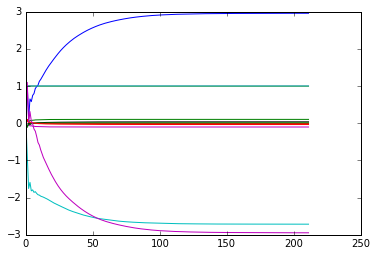

In [12]:
plt.plot(aligner.Ts);

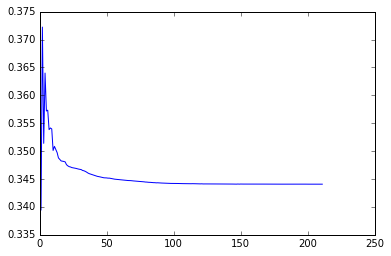

In [13]:
plt.plot(aligner.scores);

In [ ]:
[[  9.69838248e-01   7.41253856e-02   2.32205080e-01  -3.58975061e+01]
 [ -7.00849620e-02   9.97212129e-01  -2.56138103e-02  -3.87932318e+01]
 [ -2.33456356e-01   8.56716872e-03   9.72329540e-01  -1.27806610e+01]]

In [ ]:
# Transform instances.

T = convert_transform_forms(aligner=aligner, out_form=(3,4), select_best='max_value')
print T

aligned_moving_instance_volume, aligned_moving_instance_origin_wrt_templateCentroid = \
transform_volume_v3(moving_instance_volume, origin=(0,0,0), transform_parameters=T,
                    return_origin_instead_of_bbox=True)

aligned_moving_instance_wrt_templateCentroid = (aligned_moving_instance_volume, aligned_moving_instance_origin_wrt_templateCentroid)        

# Generate meshes for each instance.

instance_mesh_wrt_templateCentroid_all_instances = [
volume_to_polydata(v, origin=o, num_simplify_iter=3, smooth=True)
for v, o in 
[template_instance_wrt_templateCentroid] + [aligned_moving_instance_wrt_templateCentroid]]

launch_vtk([actor_mesh(mesh, wireframe=True, color=np.array(high_contrast_colors[i+1])/255., opacity=1) 
    for i, mesh in enumerate([instance_mesh_wrt_templateCentroid_all_instances[0],
                             instance_mesh_wrt_templateCentroid_all_instances[1]])], 
  background_color=(1,1,1))

# Visualize Results

/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp
/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp
/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_scoreHistory.bp
/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instan

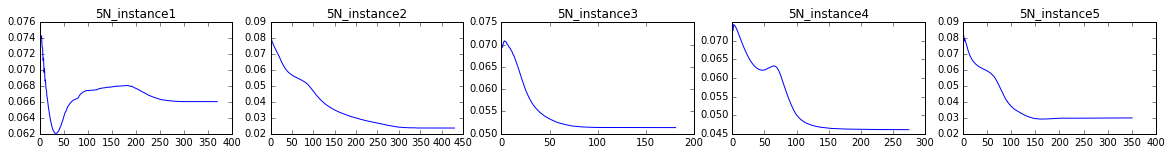

In [49]:
# for name_u in all_known_structures:
for name_u in ['5N']:
    fig, axes = plt.subplots(1, 5,squeeze=True, figsize=(20,2));
    for i in range(1, 6):
#         try:
        scores = DataManager.load_alignment_results_v3( what='scoreHistory',
      alignment_spec=dict(warp_setting=108, 
                          stack_f=dict(name='%s_instance0' % name_u, vol_type='annotationAsScore'),
                         stack_m=dict(name='%s_instance%d' % (name_u, i), vol_type='annotationAsScore')),
                 reg_root_dir=os.path.join(MESH_ROOTDIR, atlas_name, 'mean_shapes', 'instance_registration'))        
        axes[i-1].plot(scores);
        axes[i-1].set_title('%s_instance%d' % (name_u, i))
#         except:
#             pass
    plt.show();

/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance1/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance1_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_trajectory.bp
/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance2/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance2_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_trajectory.bp
/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance3/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance3_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume_trajectory.bp
/home/yuncong/CSHL_meshes/atlasV6/mean_shapes/instance_registration/5N_instance4/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_annotationAsScoreVolume/5N_instance4_annotationAsScoreVolume_warp108_5N_instance0_an

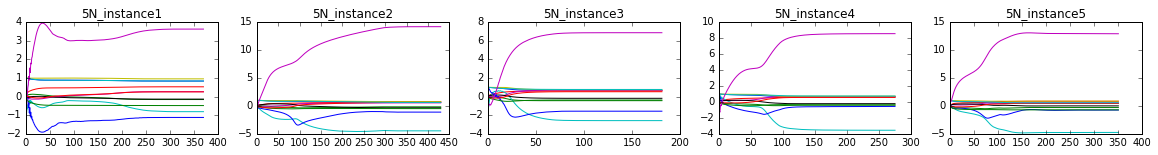

In [50]:
# for name_u in all_known_structures:
for name_u in ['5N']:
    fig, axes = plt.subplots(1, 5,squeeze=True, figsize=(20,2));
    for i in range(1, 6):
        try:
            trajectory = DataManager.load_alignment_results_v3(what='trajectory',
                              alignment_spec=dict(warp_setting=108, 
                                                  stack_f=dict(name='%s_instance0' % name_u, vol_type='annotationAsScore'),
                                                 stack_m=dict(name='%s_instance%d' % (name_u, i), vol_type='annotationAsScore')),
                                         reg_root_dir=os.path.join(MESH_ROOTDIR, atlas_name, 'mean_shapes', 'instance_registration'))        
            axes[i-1].plot(trajectory);
            axes[i-1].set_title('%s_instance%d' % (name_u, i))
        except:
            pass
    plt.show();

In [ ]:
for name_u in all_known_structures:

    # Load instance meshes.
    
    instance_meshes = []
    for i in range(6):
        m = load_data(DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=name_u, 
                                                         index=i, resolution='10um'))
        if m is not None:
            instance_meshes.append(m)

    launch_vtk([actor_mesh(m, wireframe=True, 
                           color=np.array(high_contrast_colors[i+1])/255., 
                           opacity=1, wireframe_linewidth=3) 
        for i, m in enumerate(instance_meshes)], 
      background_color=(1,1,1))
    
    # Load average shape.
    
    vol = load_data(DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, what='volume', resolution='10.0um'))
    ori_wrt_meanShapeCentroid = load_data(DataManager.get_mean_shape_filepath(atlas_name=atlas_name, structure=name_u, what='origin_wrt_meanShapeCentroid', resolution='10.0um'))
    
    standard_shape_volume_actor = actor_volume(vol.astype(np.float32), 
                                               what='probability', 
                                               origin=ori_wrt_meanShapeCentroid, 
                                              c=(0,0,0))
    
    launch_vtk([standard_shape_volume_actor])

# Combine standard shapes with standard centroid locations

In [5]:
atlas_resolution = '10.0um'
atlas_resolution_um = convert_resolution_string_to_um(atlas_resolution)

In [6]:
nominal_centroids_wrt_canonicalAtlasSpace_um = load_data(DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name, resolution='1um'))
nominal_centroids_wrt_canonicalAtlasSpace_10um = {s: c / atlas_resolution_um for s, c in nominal_centroids_wrt_canonicalAtlasSpace_um.iteritems()}

mean_shapes_10um_wrt_stdShapeCentroid = {name_u: DataManager.load_mean_shape(atlas_name=atlas_name, structure=name_u, resolution=atlas_resolution) 
                    for name_u in all_known_structures_unsided_including_surround_200um}

In [18]:
atlas_spec = dict(name='atlasV6', vol_type='score', resolution=atlas_resolution)

In [ ]:
mean_shape_transform_from_stdShapeCentroid_to_canonicalAtlasSpace_um = \

In [ ]:
mean_shape_transform_from_stdShapeCentroid_to_canonicalAtlasSpace_10um

In [ ]:
centroid_m = mean_shapes_10um_wrt_stdShapeCentroid[name_u][1]
centroid_f = nominal_centroids_wrt_canonicalAtlasSpace_10um[name_u]
rotation_matrix = mean_shape_rotations_from_stdShapeCentroid_to_canonicalAtlasSpace_10um[name_u]

transform_from_stdShapeCentroid_to_canonicalAtlasSpace_10um = \
{'parameters': rotation_matrix, 'centroid_m': centroid_m, 'centroid_f': centroid_f}

mean_shape_wrt_canonicalAtlasSpace_10um = \
transform_volume_v4(volume=mean_shapes_10um_wrt_stdShapeCentroid[name_u], 
                    transform=transform_from_stdShapeCentroid_to_canonicalAtlasSpace_10um)

In [22]:
# mean_shape_wrt_canonicalAtlasSpace_all_structures_10um = {}

for name_u in all_known_structures:
# for name_u in ['AP']:
    
    mean_shape_10um, mean_shape_origin_wrt_stdShapeCentroid_10um = mean_shapes_10um_wrt_stdShapeCentroid[name_u]
    
    if name_u in singular_structures:
                
        for name in [name_u, convert_to_surround_name(name_u, margin='200um')]:    
            
            mean_shape_wrt_canonicalAtlasSpace_10um = (mean_shape_10um, mean_shape_origin_wrt_stdShapeCentroid_10um + nominal_centroids_wrt_canonicalAtlasSpace_10um[name_u])
            
#             mean_shape_wrt_canonicalAtlasSpace_all_structures_10um[name] = mean_shape_wrt_canonicalAtlasSpace_10um

            DataManager.save_original_volume(volume=mean_shape_wrt_canonicalAtlasSpace_10um, 
                                             stack_spec=atlas_spec, 
                                             structure=name, wrt='canonicalAtlasSpace')
        
    else:
        
        left_name = convert_to_left_name(name_u)
        left_surround_name = convert_to_surround_name(left_name, margin='200um')
        right_name = convert_to_right_name(name_u)
        right_surround_name = convert_to_surround_name(right_name, margin='200um')
    
        for name in [left_name, left_surround_name]:
            
            left_mean_shape_wrt_canonicalAtlasSpace_10um = mirror_volume_v2(volume=mean_shape_10um,
                 centroid_wrt_origin=-mean_shape_origin_wrt_stdShapeCentroid_10um,
                new_centroid=nominal_centroids_wrt_canonicalAtlasSpace_10um[left_name])
                    
#             mean_shape_wrt_canonicalAtlasSpace_all_structures_10um[name] = left_mean_shape_wrt_canonicalAtlasSpace_10um

            DataManager.save_original_volume(volume=left_mean_shape_wrt_canonicalAtlasSpace_10um, 
                                 stack_spec=atlas_spec, 
                                 structure=name, wrt='canonicalAtlasSpace')
            
        for name in [right_name, right_surround_name]:
            
            right_mean_shape_wrt_canonicalAtlasSpace_10um = (mean_shape_10um, mean_shape_origin_wrt_stdShapeCentroid_10um + nominal_centroids_wrt_canonicalAtlasSpace_10um[right_name])

#             mean_shape_wrt_canonicalAtlasSpace_all_structures_10um[name] = right_mean_shape_wrt_canonicalAtlasSpace_10um

            DataManager.save_original_volume(volume=right_mean_shape_wrt_canonicalAtlasSpace_10um, 
                                 stack_spec=atlas_spec, 
                                 structure=name, wrt='canonicalAtlasSpace')

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_5N_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_5N_L_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_5N_L_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_5N_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_5N_L_surround_200um.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_1

0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_7n_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_7n_R_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_7n_R_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_

0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Pn_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Pn_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um

0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_RMC_L_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_RMC_L_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp

0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_3N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_3N_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_3N_R_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_3N_R_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_3N_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_3N_R_surround_200um.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6

0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5C_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5C_L_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5C_L_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/Yuncong

0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_VCA_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0

0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_12N_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_12N_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_12N_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_12N_surround_200um.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_12N_surround_200um_origin_wrt_canonicalAtlasSpace.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_12N_surround_200um_origin_wrt_canonicalAtlasSpace.txt"
0
aws s3 cp "/media/yun

# Convert to vtk polydata for visualization

In [ ]:
for name_s in all_known_structures_sided_including_surround_200um:
# for name_s in ['7N_L', '7N_R']:

    atlas_structure_wrt_canonicalAtlasSpace = \
    DataManager.load_original_volume_v2(stack_spec=atlas_spec, structure=name_s, bbox_wrt='canonicalAtlasSpace')

    for surface_level in np.arange(0.1, 1.1, .1):
        mean_shape_isosurface_polydata_wrt_canonicalAtlasSpace = \
        volume_to_polydata(volume=(atlas_structure_wrt_canonicalAtlasSpace[0] >= surface_level, atlas_structure_wrt_canonicalAtlasSpace[1]), 
                     num_simplify_iter=3, smooth=True, 
                     return_vertex_face_list=False)

        save_data(mean_shape_isosurface_polydata_wrt_canonicalAtlasSpace, 
                  DataManager.get_mesh_filepath_v2(atlas_spec, structure=name_s, level=surface_level))

marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11116: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.1.stl"
0


simplify 1 @ 2224: 0.08 seconds
simplify 2 @ 446: 0.02 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9565: 0.06 seconds
simplify 1 @ 1914: 0.07 seconds
simplify 2 @ 384: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.2.stl"
0


marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8257: 0.06 seconds
simplify 1 @ 1653: 0.06 seconds
simplify 2 @ 332: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.3.stl"
0


marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7290: 0.05 seconds
simplify 1 @ 1459: 0.05 seconds
simplify 2 @ 293: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.5.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6389: 0.04 seconds
simplify 1 @ 1279: 0.04 seconds
simplify 2 @ 257: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.6.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5597: 0.04 seconds
simplify 1 @ 1121: 0.03 seconds
simplify 2 @ 225: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.7.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4740: 0.03 seconds
simplify 1 @ 949: 0.03 seconds
simplify 2 @ 191: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.8.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3741: 0.03 seconds
simplify 1 @ 749: 0.02 seconds
simplify 2 @ 151: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l0.9.stl"


marching cube: 0.09 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1710: 0.01 seconds
simplify 1 @ 343: 0.01 seconds
simplify 2 @ 70: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_l1.0.stl"


marching cube: 0.08 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11116: 0.16 seconds
simplify 1 @ 2224: 0.16 seconds
simplify 2 @ 446: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.1.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 9565: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.2.stl"
0


simplify 1 @ 1914: 0.13 seconds
simplify 2 @ 384: 0.03 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8257: 0.08 seconds
simplify 1 @ 1653: 0.07 seconds
simplify 2 @ 332: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.3.stl"
0


marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7290: 0.06 seconds
simplify 1 @ 1459: 0.06 seconds
simplify 2 @ 293: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.4.stl"
0


marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6389: 0.05 seconds
simplify 1 @ 1279: 0.05 seconds
simplify 2 @ 257: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.5.stl"
0


marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5597: 0.05 seconds
simplify 1 @ 1121: 0.05 seconds
simplify 2 @ 225: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.6.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4740: 0.07 seconds
simplify 1 @ 949: 0.06 seconds
simplify 2 @ 191: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.7.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3741: 0.05 seconds
simplify 1 @ 749: 0.05 seconds
simplify 2 @ 151: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l0.9.stl"


marching cube: 0.10 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1710: 0.01 seconds
simplify 1 @ 343: 0.01 seconds
simplify 2 @ 70: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_L_surround_200um_l1.0.stl"


marching cube: 0.10 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11133: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.1.stl"
0


simplify 1 @ 2228: 0.10 seconds
simplify 2 @ 447: 0.02 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9569: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.2.stl"
0


simplify 1 @ 1915: 0.08 seconds
simplify 2 @ 384: 0.02 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8271: 0.06 seconds
simplify 1 @ 1655: 0.06 seconds
simplify 2 @ 332: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.3.stl"
0


marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7317: 0.05 seconds
simplify 1 @ 1465: 0.05 seconds
simplify 2 @ 294: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.4.stl"
0


marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6395: 0.05 seconds
simplify 1 @ 1280: 0.05 seconds
simplify 2 @ 257: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.5.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.6.stl"


marching cube: 0.09 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5596: 0.04 seconds
simplify 1 @ 1120: 0.04 seconds
simplify 2 @ 225: 0.01 seconds


0


marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4747: 0.04 seconds
simplify 1 @ 951: 0.04 seconds
simplify 2 @ 191: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.7.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.8.stl"


marching cube: 0.10 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3764: 0.03 seconds
simplify 1 @ 754: 0.03 seconds
simplify 2 @ 152: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l0.9.stl"


marching cube: 0.10 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1716: 0.02 seconds
simplify 1 @ 344: 0.01 seconds
simplify 2 @ 70: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_l1.0.stl"


marching cube: 0.09 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11133: 0.21 seconds
simplify 1 @ 2228: 0.21 seconds
simplify 2 @ 447: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.1.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 9569: 0.22 seconds
simplify 1 @ 1915: 0.16 seconds
simplify 2 @ 384: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.2.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8271: 0.13 seconds
simplify 1 @ 1655: 0.14 seconds
simplify 2 @ 332: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.3.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.4.stl"
0


simplify 0 @ 7317: 0.11 seconds
simplify 1 @ 1465: 0.11 seconds
simplify 2 @ 294: 0.02 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6395: 0.06 seconds
simplify 1 @ 1280: 0.06 seconds
simplify 2 @ 257: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.5.stl"
0


marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5596: 0.05 seconds
simplify 1 @ 1120: 0.05 seconds
simplify 2 @ 225: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.6.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.7.stl"

marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4747: 0.04 seconds
simplify 1 @ 951: 0.04 seconds
simplify 2 @ 191: 0.01 seconds



0


marching cube: 0.17 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3764: 0.05 seconds
simplify 1 @ 754: 0.05 seconds
simplify 2 @ 152: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l0.9.stl"


marching cube: 0.09 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1716: 0.02 seconds
simplify 1 @ 344: 0.02 seconds
simplify 2 @ 70: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_10N_R_surround_200um_l1.0.stl"


marching cube: 0.10 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29984: 0.38 seconds
simplify 1 @ 5998: 0.46 seconds
simplify 2 @ 1201: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.1.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 27114: 0.46 seconds
simplify 1 @ 5424: 0.45 seconds
simplify 2 @ 1086: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.2.stl"
0


marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.3.stl"
0


simplify 0 @ 25439: 0.26 seconds
simplify 1 @ 5089: 0.24 seconds
simplify 2 @ 1019: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24479: 0.24 seconds
simplify 1 @ 4897: 0.39 seconds
simplify 2 @ 981: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.4.stl"
0


marching cube: 0.22 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 23415: 0.39 seconds
simplify 1 @ 4684: 0.39 seconds
simplify 2 @ 938: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.5.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.6.stl"
0


simplify 0 @ 22279: 0.21 seconds
simplify 1 @ 4457: 0.22 seconds
simplify 2 @ 893: 0.04 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.7.stl"
0


simplify 0 @ 21100: 0.20 seconds
simplify 1 @ 4221: 0.21 seconds
simplify 2 @ 845: 0.04 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.8.stl"
0


simplify 0 @ 19982: 0.18 seconds
simplify 1 @ 3998: 0.16 seconds
simplify 2 @ 801: 0.03 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_l1.0.stl"


simplify 0 @ 18390: 0.15 seconds
simplify 1 @ 3679: 0.16 seconds
simplify 2 @ 737: 0.03 seconds
marching cube: 0.11 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 29984: 0.24 seconds
simplify 1 @ 5998: 0.26 seconds
simplify 2 @ 1201: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.1.stl"
0


marching cube: 0.12 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.2.stl"
0


simplify 0 @ 27114: 0.22 seconds
simplify 1 @ 5424: 0.25 seconds
simplify 2 @ 1086: 0.05 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.3.stl"
0


simplify 0 @ 25439: 0.22 seconds
simplify 1 @ 5089: 0.24 seconds
simplify 2 @ 1019: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.4.stl"
0


simplify 0 @ 24479: 0.22 seconds
simplify 1 @ 4897: 0.21 seconds
simplify 2 @ 981: 0.05 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 23415: 0.38 seconds
simplify 1 @ 4684: 0.42 seconds
simplify 2 @ 938: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.5.stl"
0


marching cube: 0.22 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 22279: 0.23 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.6.stl"
0


simplify 1 @ 4457: 0.25 seconds
simplify 2 @ 893: 0.05 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.7.stl"
0


simplify 0 @ 21100: 0.21 seconds
simplify 1 @ 4221: 0.23 seconds
simplify 2 @ 845: 0.05 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 19982: 0.31 seconds
simplify 1 @ 3998: 0.32 seconds
simplify 2 @ 801: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.8.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 18390: 0.30 seconds
simplify 1 @ 3679: 0.29 seconds
simplify 2 @ 737: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_12N_surround_200um_l1.0.stl"


marching cube: 0.13 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5464: 0.07 seconds
simplify 1 @ 1094: 0.04 seconds
simplify 2 @ 220: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4791: 0.06 seconds
simplify 1 @ 959: 0.04 seconds
simplify 2 @ 193: 0.01 seconds


0


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4327: 0.10 seconds
simplify 1 @ 867: 0.06 seconds
simplify 2 @ 175: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.3.stl"
0


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4029: 0.08 seconds
simplify 1 @ 807: 0.06 seconds
simplify 2 @ 163: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.4.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.5.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3657: 0.07 seconds
simplify 1 @ 733: 0.05 seconds
simplify 2 @ 148: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3301: 0.04 seconds
simplify 1 @ 661: 0.02 seconds
simplify 2 @ 133: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3109: 0.03 seconds
simplify 1 @ 623: 0.03 seconds
simplify 2 @ 126: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2679: 0.03 seconds
simplify 1 @ 537: 0.02 seconds
simplify 2 @ 109: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2217: 0.03 seconds
simplify 1 @ 445: 0.02 seconds
simplify 2 @ 90: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5464: 0.06 seconds
simplify 1 @ 1094: 0.04 seconds
simplify 2 @ 220: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4791: 0.05 seconds
simplify 1 @ 959: 0.03 seconds
simplify 2 @ 193: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.3.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4327: 0.05 seconds
simplify 1 @ 867: 0.03 seconds
simplify 2 @ 175: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4029: 0.04 seconds
simplify 1 @ 807: 0.03 seconds
simplify 2 @ 163: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3657: 0.04 seconds
simplify 1 @ 733: 0.03 seconds
simplify 2 @ 148: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3301: 0.04 seconds
simplify 1 @ 661: 0.02 seconds
simplify 2 @ 133: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3109: 0.03 seconds
simplify 1 @ 623: 0.02 seconds
simplify 2 @ 126: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2679: 0.03 seconds
simplify 1 @ 537: 0.02 seconds
simplify 2 @ 109: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2217: 0.02 seconds
simplify 1 @ 445: 0.01 seconds
simplify 2 @ 90: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_L_surround_200um_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5454: 0.06 seconds
simplify 1 @ 1092: 0.04 seconds
simplify 2 @ 220: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4803: 0.05 seconds
simplify 1 @ 962: 0.03 seconds
simplify 2 @ 194: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.3.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4328: 0.04 seconds
simplify 1 @ 867: 0.03 seconds
simplify 2 @ 175: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4011: 0.04 seconds
simplify 1 @ 803: 0.02 seconds
simplify 2 @ 162: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3645: 0.04 seconds
simplify 1 @ 730: 0.02 seconds
simplify 2 @ 147: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3290: 0.03 seconds
simplify 1 @ 659: 0.02 seconds
simplify 2 @ 133: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3114: 0.03 seconds
simplify 1 @ 624: 0.02 seconds
simplify 2 @ 126: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2678: 0.03 seconds
simplify 1 @ 537: 0.02 seconds
simplify 2 @ 109: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2197: 0.02 seconds
simplify 1 @ 441: 0.01 seconds
simplify 2 @ 89: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5454: 0.06 seconds
simplify 1 @ 1092: 0.03 seconds
simplify 2 @ 220: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4803: 0.05 seconds
simplify 1 @ 962: 0.03 seconds
simplify 2 @ 194: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.3.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4328: 0.04 seconds
simplify 1 @ 867: 0.03 seconds
simplify 2 @ 175: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4011: 0.04 seconds
simplify 1 @ 803: 0.03 seconds
simplify 2 @ 162: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3645: 0.04 seconds
simplify 1 @ 730: 0.02 seconds
simplify 2 @ 147: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3290: 0.03 seconds
simplify 1 @ 659: 0.02 seconds
simplify 2 @ 133: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3114: 0.03 seconds
simplify 1 @ 624: 0.02 seconds
simplify 2 @ 126: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2678: 0.03 seconds
simplify 1 @ 537: 0.02 seconds
simplify 2 @ 109: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2197: 0.02 seconds
simplify 1 @ 441: 0.01 seconds
simplify 2 @ 89: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_3N_R_surround_200um_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1496: 0.01 seconds
simplify 1 @ 300: 0.01 seconds
simplify 2 @ 61: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.2.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1145: 0.01 seconds
simplify 1 @ 230: 0.01 seconds
simplify 2 @ 47: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 927: 0.01 seconds
simplify 1 @ 187: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.4.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 752: 0.01 seconds
simplify 1 @ 152: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.5.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 605: 0.00 seconds
simplify 1 @ 122: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.6.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 476: 0.00 seconds
simplify 1 @ 96: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.7.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 339: 0.00 seconds
simplify 1 @ 69: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.8.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 212: 0.00 seconds
simplify 1 @ 44: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l0.9.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 39: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.1.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1496: 0.01 seconds
simplify 1 @ 300: 0.01 seconds
simplify 2 @ 61: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.2.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1145: 0.01 seconds
simplify 1 @ 230: 0.01 seconds
simplify 2 @ 47: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 927: 0.01 seconds
simplify 1 @ 187: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.4.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 752: 0.01 seconds
simplify 1 @ 152: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.5.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 605: 0.00 seconds
simplify 1 @ 122: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.6.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 476: 0.00 seconds
simplify 1 @ 96: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.7.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 339: 0.00 seconds
simplify 1 @ 69: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.8.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 212: 0.00 seconds
simplify 1 @ 44: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l0.9.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 39: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_L_surround_200um_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1500: 0.01 seconds
simplify 1 @ 301: 0.01 seconds
simplify 2 @ 61: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.2.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1143: 0.01 seconds
simplify 1 @ 230: 0.01 seconds
simplify 2 @ 47: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 921: 0.01 seconds
simplify 1 @ 185: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 748: 0.01 seconds
simplify 1 @ 151: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 594: 0.01 seconds
simplify 1 @ 120: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 481: 0.01 seconds
simplify 1 @ 97: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.7.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 338: 0.00 seconds
simplify 1 @ 69: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.8.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 213: 0.00 seconds
simplify 1 @ 44: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l0.9.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 38: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1500: 0.01 seconds
simplify 1 @ 301: 0.01 seconds
simplify 2 @ 61: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.2.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1143: 0.01 seconds
simplify 1 @ 230: 0.01 seconds
simplify 2 @ 47: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 921: 0.01 seconds
simplify 1 @ 185: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.4.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 748: 0.01 seconds
simplify 1 @ 151: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.5.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 594: 0.01 seconds
simplify 1 @ 120: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.6.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 481: 0.00 seconds
simplify 1 @ 97: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.7.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 338: 0.00 seconds
simplify 1 @ 69: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.8.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 213: 0.00 seconds
simplify 1 @ 44: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l0.9.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 38: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_4N_R_surround_200um_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18315: 0.17 seconds
simplify 1 @ 3664: 0.17 seconds
simplify 2 @ 734: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.1.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.2.stl"
0


simplify 0 @ 15772: 0.14 seconds
simplify 1 @ 3156: 0.13 seconds
simplify 2 @ 632: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.3.stl"
0


simplify 0 @ 14447: 0.14 seconds
simplify 1 @ 2891: 0.13 seconds
simplify 2 @ 579: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.4.stl"
0


simplify 0 @ 13504: 0.13 seconds
simplify 1 @ 2702: 0.12 seconds
simplify 2 @ 542: 0.03 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.5.stl"
0


simplify 0 @ 12620: 0.10 seconds
simplify 1 @ 2525: 0.10 seconds
simplify 2 @ 506: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11871: 0.10 seconds
simplify 1 @ 2375: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.6.stl"
0


simplify 2 @ 476: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11071: 0.09 seconds
simplify 1 @ 2215: 0.12 seconds
simplify 2 @ 444: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.7.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10298: 0.08 seconds
simplify 1 @ 2061: 0.07 seconds
simplify 2 @ 413: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.8.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9418: 0.07 seconds
simplify 1 @ 1885: 0.06 seconds
simplify 2 @ 378: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_l1.0.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 222: 0.00 seconds
simplify 1 @ 46: 0.00 seconds


0


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.1.stl"
0


simplify 0 @ 18315: 0.15 seconds
simplify 1 @ 3664: 0.15 seconds
simplify 2 @ 734: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15772: 0.14 seconds
simplify 1 @ 3156: 0.13 seconds
simplify 2 @ 632: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.2.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.3.stl"
0


simplify 0 @ 14447: 0.12 seconds
simplify 1 @ 2891: 0.12 seconds
simplify 2 @ 579: 0.03 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.4.stl"
0


simplify 0 @ 13504: 0.15 seconds
simplify 1 @ 2702: 0.10 seconds
simplify 2 @ 542: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.5.stl"
0


simplify 0 @ 12620: 0.10 seconds
simplify 1 @ 2525: 0.09 seconds
simplify 2 @ 506: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11871: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.6.stl"
0


simplify 1 @ 2375: 0.08 seconds
simplify 2 @ 476: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11071: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.7.stl"
0


simplify 1 @ 2215: 0.08 seconds
simplify 2 @ 444: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10298: 0.08 seconds
simplify 1 @ 2061: 0.07 seconds
simplify 2 @ 413: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.8.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9418: 0.07 seconds
simplify 1 @ 1885: 0.07 seconds
simplify 2 @ 378: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_L_surround_200um_l1.0.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 222: 0.00 seconds
simplify 1 @ 46: 0.00 seconds


0


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.1.stl"
0


simplify 0 @ 18290: 0.15 seconds
simplify 1 @ 3659: 0.15 seconds
simplify 2 @ 733: 0.03 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15792: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.2.stl"
0


simplify 1 @ 3160: 0.13 seconds
simplify 2 @ 633: 0.03 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.3.stl"
0


simplify 0 @ 14468: 0.11 seconds
simplify 1 @ 2895: 0.12 seconds
simplify 2 @ 580: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.4.stl"
0


simplify 0 @ 13534: 0.10 seconds
simplify 1 @ 2708: 0.10 seconds
simplify 2 @ 543: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.5.stl"
0


simplify 0 @ 12649: 0.10 seconds
simplify 1 @ 2531: 0.09 seconds
simplify 2 @ 507: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.6.stl"
0


simplify 0 @ 11882: 0.09 seconds
simplify 1 @ 2378: 0.09 seconds
simplify 2 @ 477: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11084: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.7.stl"
0


simplify 1 @ 2218: 0.08 seconds
simplify 2 @ 445: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10315: 0.07 seconds
simplify 1 @ 2064: 0.07 seconds
simplify 2 @ 414: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.8.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9423: 0.07 seconds
simplify 1 @ 1886: 0.06 seconds
simplify 2 @ 378: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_l1.0.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 224: 0.00 seconds
simplify 1 @ 46: 0.00 seconds


0


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18290: 0.15 seconds
simplify 1 @ 3659: 0.15 seconds
simplify 2 @ 733: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.1.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.2.stl"
0


simplify 0 @ 15792: 0.13 seconds
simplify 1 @ 3160: 0.12 seconds
simplify 2 @ 633: 0.03 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14468: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.3.stl"
0


simplify 1 @ 2895: 0.11 seconds
simplify 2 @ 580: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13534: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.4.stl"
0


simplify 1 @ 2708: 0.10 seconds
simplify 2 @ 543: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.5.stl"
0


simplify 0 @ 12649: 0.10 seconds
simplify 1 @ 2531: 0.09 seconds
simplify 2 @ 507: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11882: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.6.stl"
0


simplify 1 @ 2378: 0.08 seconds
simplify 2 @ 477: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11084: 0.08 seconds
simplify 1 @ 2218: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.7.stl"
0


simplify 2 @ 445: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10315: 0.07 seconds
simplify 1 @ 2064: 0.07 seconds
simplify 2 @ 414: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.8.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9423: 0.07 seconds
simplify 1 @ 1886: 0.07 seconds
simplify 2 @ 378: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_5N_R_surround_200um_l1.0.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 224: 0.00 seconds
simplify 1 @ 46: 0.00 seconds


0


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2297: 0.02 seconds
simplify 1 @ 461: 0.01 seconds
simplify 2 @ 93: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.2.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1964: 0.01 seconds
simplify 1 @ 394: 0.01 seconds
simplify 2 @ 80: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1664: 0.01 seconds
simplify 1 @ 334: 0.01 seconds
simplify 2 @ 68: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.4.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1403: 0.01 seconds
simplify 1 @ 282: 0.01 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.5.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1226: 0.01 seconds
simplify 1 @ 246: 0.01 seconds
simplify 2 @ 50: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.6.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 987: 0.01 seconds
simplify 1 @ 199: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.7.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 794: 0.01 seconds
simplify 1 @ 160: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.8.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 619: 0.00 seconds
simplify 1 @ 125: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l0.9.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 358: 0.00 seconds
simplify 1 @ 73: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2297: 0.02 seconds
simplify 1 @ 461: 0.02 seconds
simplify 2 @ 93: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.2.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1964: 0.01 seconds
simplify 1 @ 394: 0.01 seconds
simplify 2 @ 80: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1664: 0.01 seconds
simplify 1 @ 334: 0.01 seconds
simplify 2 @ 68: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1403: 0.01 seconds
simplify 1 @ 282: 0.01 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.5.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1226: 0.01 seconds
simplify 1 @ 246: 0.01 seconds
simplify 2 @ 50: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.6.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 987: 0.01 seconds
simplify 1 @ 199: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.7.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 794: 0.01 seconds
simplify 1 @ 160: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.8.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 619: 0.01 seconds
simplify 1 @ 125: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l0.9.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 358: 0.00 seconds
simplify 1 @ 73: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_L_surround_200um_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.1.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2286: 0.02 seconds
simplify 1 @ 458: 0.02 seconds
simplify 2 @ 93: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.2.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1961: 0.01 seconds
simplify 1 @ 393: 0.01 seconds
simplify 2 @ 80: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1661: 0.01 seconds
simplify 1 @ 333: 0.01 seconds
simplify 2 @ 68: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1407: 0.01 seconds
simplify 1 @ 283: 0.01 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1223: 0.02 seconds
simplify 1 @ 246: 0.02 seconds
simplify 2 @ 50: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 987: 0.02 seconds
simplify 1 @ 199: 0.02 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 796: 0.01 seconds
simplify 1 @ 160: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 618: 0.01 seconds
simplify 1 @ 125: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 355: 0.00 seconds
simplify 1 @ 72: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.1.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2286: 0.02 seconds
simplify 1 @ 458: 0.02 seconds
simplify 2 @ 93: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1961: 0.02 seconds
simplify 1 @ 393: 0.02 seconds
simplify 2 @ 80: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.3.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1661: 0.01 seconds
simplify 1 @ 333: 0.01 seconds
simplify 2 @ 68: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.4.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1407: 0.01 seconds
simplify 1 @ 283: 0.01 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.5.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1223: 0.01 seconds
simplify 1 @ 246: 0.01 seconds
simplify 2 @ 50: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.6.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 987: 0.01 seconds
simplify 1 @ 199: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.7.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 796: 0.01 seconds
simplify 1 @ 160: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 618: 0.01 seconds
simplify 1 @ 125: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l0.9.stl"


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 355: 0.00 seconds
simplify 1 @ 72: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_6N_R_surround_200um_l1.0.stl"


marching cube: 0.00 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.11 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27163: 0.27 seconds
simplify 1 @ 5434: 0.29 seconds
simplify 2 @ 1088: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.1.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 24824: 0.48 seconds
simplify 1 @ 4966: 0.47 seconds
simplify 2 @ 994: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.2.stl"
0


marching cube: 0.20 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 23393: 0.39 seconds
simplify 1 @ 4680: 0.36 seconds
simplify 2 @ 937: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.3.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 22368: 0.36 seconds
simplify 1 @ 4475: 0.37 seconds
simplify 2 @ 896: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.4.stl"
0


marching cube: 0.12 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.5.stl"
0


simplify 0 @ 21527: 0.22 seconds
simplify 1 @ 4307: 0.22 seconds
simplify 2 @ 863: 0.04 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20594: 0.20 seconds
simplify 1 @ 4120: 0.20 seconds
simplify 2 @ 825: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.6.stl"
0


marching cube: 0.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19821: 0.17 seconds
simplify 1 @ 3965: 0.17 seconds
simplify 2 @ 794: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.7.stl"
0


marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18797: 0.16 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.8.stl"
0


simplify 1 @ 3761: 0.17 seconds
simplify 2 @ 753: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17417: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l0.9.stl"
0


simplify 1 @ 3485: 0.15 seconds
simplify 2 @ 698: 0.03 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2676: 0.06 seconds
simplify 1 @ 536: 0.03 seconds
simplify 2 @ 108: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_l1.0.stl"
0


marching cube: 0.11 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27163: 0.27 seconds
simplify 1 @ 5434: 0.27 seconds
simplify 2 @ 1088: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.1.stl"
0


marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24824: 0.25 seconds
simplify 1 @ 4966: 0.35 seconds
simplify 2 @ 994: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.2.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.3.stl"
0


simplify 0 @ 23393: 0.38 seconds
simplify 1 @ 4680: 0.36 seconds
simplify 2 @ 937: 0.08 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22368: 0.22 seconds
simplify 1 @ 4475: 0.23 seconds
simplify 2 @ 896: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.4.stl"
0


marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.5.stl"
0


simplify 0 @ 21527: 0.21 seconds
simplify 1 @ 4307: 0.20 seconds
simplify 2 @ 863: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.6.stl"
0


simplify 0 @ 20594: 0.18 seconds
simplify 1 @ 4120: 0.18 seconds
simplify 2 @ 825: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.7.stl"
0


simplify 0 @ 19821: 0.17 seconds
simplify 1 @ 3965: 0.17 seconds
simplify 2 @ 794: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.8.stl"
0


simplify 0 @ 18797: 0.15 seconds
simplify 1 @ 3761: 0.15 seconds
simplify 2 @ 753: 0.03 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_L_surround_200um_l1.0.stl"


simplify 0 @ 17417: 0.14 seconds
simplify 1 @ 3485: 0.13 seconds
simplify 2 @ 698: 0.03 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2676: 0.03 seconds
simplify 1 @ 536: 0.02 seconds
simplify 2 @ 108: 0.00 seconds


0


marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.1.stl"
0


simplify 0 @ 27094: 0.22 seconds
simplify 1 @ 5420: 0.23 seconds
simplify 2 @ 1085: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24756: 0.22 seconds
simplify 1 @ 4952: 0.21 seconds
simplify 2 @ 992: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.2.stl"
0


marching cube: 0.11 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.3.stl"
0


simplify 0 @ 23335: 0.21 seconds
simplify 1 @ 4668: 0.21 seconds
simplify 2 @ 935: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22311: 0.22 seconds
simplify 1 @ 4463: 0.19 seconds
simplify 2 @ 894: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.4.stl"
0


marching cube: 0.21 seconds
mesh_to_polydata: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.5.stl"
0


simplify 0 @ 21447: 0.40 seconds
simplify 1 @ 4291: 0.36 seconds
simplify 2 @ 859: 0.08 seconds
marching cube: 0.21 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 20525: 0.48 seconds
simplify 1 @ 4106: 0.46 seconds
simplify 2 @ 822: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.6.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 19747: 0.49 seconds
simplify 1 @ 3951: 0.43 seconds
simplify 2 @ 791: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.7.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 18750: 0.39 seconds
simplify 1 @ 3751: 0.37 seconds
simplify 2 @ 751: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.8.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 17384: 0.30 seconds
simplify 1 @ 3478: 0.29 seconds
simplify 2 @ 697: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l0.9.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2684: 0.06 seconds
simplify 1 @ 537: 0.03 seconds
simplify 2 @ 109: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_l1.0.stl"
0


marching cube: 0.11 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27094: 0.28 seconds
simplify 1 @ 5420: 0.30 seconds
simplify 2 @ 1085: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.1.stl"
0


marching cube: 0.12 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.2.stl"
0


simplify 0 @ 24756: 0.25 seconds
simplify 1 @ 4952: 0.22 seconds
simplify 2 @ 992: 0.05 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.3.stl"
0


simplify 0 @ 23335: 0.20 seconds
simplify 1 @ 4668: 0.19 seconds
simplify 2 @ 935: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.4.stl"
0


simplify 0 @ 22311: 0.20 seconds
simplify 1 @ 4463: 0.19 seconds
simplify 2 @ 894: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.5.stl"
0


simplify 0 @ 21447: 0.18 seconds
simplify 1 @ 4291: 0.18 seconds
simplify 2 @ 859: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20525: 0.17 seconds
simplify 1 @ 4106: 0.17 seconds
simplify 2 @ 822: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.6.stl"
0


marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19747: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.7.stl"
0


simplify 1 @ 3951: 0.18 seconds
simplify 2 @ 791: 0.04 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18750: 0.16 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.8.stl"
0


simplify 1 @ 3751: 0.16 seconds
simplify 2 @ 751: 0.03 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l0.9.stl"
0


simplify 0 @ 17384: 0.22 seconds
simplify 1 @ 3478: 0.26 seconds
simplify 2 @ 697: 0.05 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2684: 0.06 seconds
simplify 1 @ 537: 0.04 seconds
simplify 2 @ 109: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7N_R_surround_200um_l1.0.stl"
0


marching cube: 0.45 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23962: 0.25 seconds
simplify 1 @ 4794: 0.26 seconds
simplify 2 @ 960: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.1.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21505: 0.20 seconds
simplify 1 @ 4302: 0.21 seconds
simplify 2 @ 862: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.2.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19817: 0.15 seconds
simplify 1 @ 3965: 0.17 seconds
simplify 2 @ 794: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.3.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18387: 0.14 seconds
simplify 1 @ 3679: 0.15 seconds
simplify 2 @ 737: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.4.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17090: 0.15 seconds
simplify 1 @ 3419: 0.16 seconds
simplify 2 @ 685: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.5.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15935: 0.13 seconds
simplify 1 @ 3188: 0.15 seconds
simplify 2 @ 639: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.6.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 14638: 0.14 seconds
simplify 1 @ 2929: 0.15 seconds
simplify 2 @ 587: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.7.stl"
0


marching cube: 0.55 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 13134: 0.23 seconds
simplify 1 @ 2628: 0.22 seconds
simplify 2 @ 527: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.8.stl"
0


marching cube: 0.46 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11113: 0.15 seconds
simplify 1 @ 2224: 0.15 seconds
simplify 2 @ 446: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l0.9.stl"
0


marching cube: 0.42 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_l1.0.stl"
255


marching cube: 0.37 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23962: 0.22 seconds
simplify 1 @ 4794: 0.23 seconds
simplify 2 @ 960: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.1.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21505: 0.18 seconds
simplify 1 @ 4302: 0.21 seconds
simplify 2 @ 862: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.2.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19817: 0.15 seconds
simplify 1 @ 3965: 0.17 seconds
simplify 2 @ 794: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.3.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18387: 0.14 seconds
simplify 1 @ 3679: 0.14 seconds
simplify 2 @ 737: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.4.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17090: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.5.stl"
0


simplify 1 @ 3419: 0.17 seconds
simplify 2 @ 685: 0.03 seconds
marching cube: 0.28 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15935: 0.13 seconds
simplify 1 @ 3188: 0.14 seconds
simplify 2 @ 639: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.6.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14638: 0.13 seconds
simplify 1 @ 2929: 0.14 seconds
simplify 2 @ 587: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.7.stl"
0


marching cube: 0.56 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 13134: 0.26 seconds
simplify 1 @ 2628: 0.26 seconds
simplify 2 @ 527: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.8.stl"
0


marching cube: 0.53 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11113: 0.16 seconds
simplify 1 @ 2224: 0.19 seconds
simplify 2 @ 446: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l0.9.stl"
0


marching cube: 0.45 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_L_surround_200um_l1.0.stl"
255


marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23963: 0.22 seconds
simplify 1 @ 4794: 0.23 seconds
simplify 2 @ 960: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.1.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21449: 0.18 seconds
simplify 1 @ 4291: 0.20 seconds
simplify 2 @ 859: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.2.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19785: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.3.stl"
0


simplify 1 @ 3958: 0.17 seconds
simplify 2 @ 793: 0.04 seconds
marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18348: 0.14 seconds
simplify 1 @ 3671: 0.16 seconds
simplify 2 @ 735: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.4.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17061: 0.12 seconds
simplify 1 @ 3413: 0.13 seconds
simplify 2 @ 684: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.5.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15922: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.6.stl"
0


simplify 1 @ 3186: 0.14 seconds
simplify 2 @ 638: 0.03 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14614: 0.11 seconds
simplify 1 @ 2924: 0.12 seconds
simplify 2 @ 586: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.7.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13129: 0.09 seconds
simplify 1 @ 2627: 0.09 seconds
simplify 2 @ 527: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.8.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11105: 0.08 seconds
simplify 1 @ 2222: 0.08 seconds
simplify 2 @ 446: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l0.9.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_l1.0.stl"
255


marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23963: 0.18 seconds
simplify 1 @ 4794: 0.21 seconds
simplify 2 @ 960: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.1.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21449: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.2.stl"
0


simplify 1 @ 4291: 0.19 seconds
simplify 2 @ 859: 0.04 seconds
marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19785: 0.15 seconds
simplify 1 @ 3958: 0.17 seconds
simplify 2 @ 793: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.3.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.4.stl"
0


simplify 0 @ 18348: 0.13 seconds
simplify 1 @ 3671: 0.14 seconds
simplify 2 @ 735: 0.03 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17061: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.5.stl"
0


simplify 1 @ 3413: 0.13 seconds
simplify 2 @ 684: 0.03 seconds
marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15922: 0.12 seconds
simplify 1 @ 3186: 0.13 seconds
simplify 2 @ 638: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.6.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14614: 0.11 seconds
simplify 1 @ 2924: 0.12 seconds
simplify 2 @ 586: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.7.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13129: 0.10 seconds
simplify 1 @ 2627: 0.10 seconds
simplify 2 @ 527: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.8.stl"
0


marching cube: 0.22 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11105: 0.08 seconds
simplify 1 @ 2222: 0.08 seconds
simplify 2 @ 446: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l0.9.stl"
0


marching cube: 0.20 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_7n_R_surround_200um_l1.0.stl"
255


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7259: 0.05 seconds
simplify 1 @ 1453: 0.05 seconds
simplify 2 @ 292: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.2.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6220: 0.05 seconds
simplify 1 @ 1245: 0.05 seconds
simplify 2 @ 250: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.3.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5567: 0.05 seconds
simplify 1 @ 1115: 0.04 seconds
simplify 2 @ 224: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.4.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5041: 0.04 seconds
simplify 1 @ 1009: 0.04 seconds
simplify 2 @ 203: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.5.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4537: 0.04 seconds
simplify 1 @ 909: 0.03 seconds
simplify 2 @ 183: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.6.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 4099: 0.03 seconds
simplify 1 @ 821: 0.03 seconds
simplify 2 @ 165: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.7.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3701: 0.03 seconds
simplify 1 @ 741: 0.02 seconds
simplify 2 @ 149: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.8.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3182: 0.02 seconds
simplify 1 @ 638: 0.02 seconds
simplify 2 @ 129: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l0.9.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2490: 0.02 seconds
simplify 1 @ 499: 0.02 seconds
simplify 2 @ 101: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_l1.0.stl"


marching cube: 0.02 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7259: 0.06 seconds
simplify 1 @ 1453: 0.07 seconds
simplify 2 @ 292: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.2.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6220: 0.05 seconds
simplify 1 @ 1245: 0.05 seconds
simplify 2 @ 250: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.3.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5567: 0.05 seconds
simplify 1 @ 1115: 0.04 seconds
simplify 2 @ 224: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.4.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5041: 0.04 seconds
simplify 1 @ 1009: 0.03 seconds
simplify 2 @ 203: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.5.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4537: 0.04 seconds
simplify 1 @ 909: 0.03 seconds
simplify 2 @ 183: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.6.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 4099: 0.03 seconds
simplify 1 @ 821: 0.03 seconds
simplify 2 @ 165: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.7.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3701: 0.03 seconds
simplify 1 @ 741: 0.03 seconds
simplify 2 @ 149: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.8.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3182: 0.03 seconds
simplify 1 @ 638: 0.02 seconds
simplify 2 @ 129: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l0.9.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2490: 0.02 seconds
simplify 1 @ 499: 0.02 seconds
simplify 2 @ 101: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_AP_surround_200um_l1.0.stl"


marching cube: 0.02 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2604: 0.05 seconds
simplify 1 @ 522: 0.03 seconds
simplify 2 @ 106: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2097: 0.03 seconds
simplify 1 @ 421: 0.02 seconds
simplify 2 @ 85: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.3.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1885: 0.02 seconds
simplify 1 @ 378: 0.01 seconds
simplify 2 @ 77: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1615: 0.02 seconds
simplify 1 @ 324: 0.01 seconds
simplify 2 @ 66: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1318: 0.02 seconds
simplify 1 @ 265: 0.01 seconds
simplify 2 @ 54: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1169: 0.02 seconds
simplify 1 @ 235: 0.02 seconds
simplify 2 @ 48: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 839: 0.02 seconds
simplify 1 @ 169: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 595: 0.01 seconds
simplify 1 @ 120: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 315: 0.01 seconds
simplify 1 @ 64: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2604: 0.04 seconds
simplify 1 @ 522: 0.02 seconds
simplify 2 @ 106: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2097: 0.03 seconds
simplify 1 @ 421: 0.02 seconds
simplify 2 @ 85: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.3.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1885: 0.02 seconds
simplify 1 @ 378: 0.01 seconds
simplify 2 @ 77: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1615: 0.02 seconds
simplify 1 @ 324: 0.01 seconds
simplify 2 @ 66: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1318: 0.02 seconds
simplify 1 @ 265: 0.01 seconds
simplify 2 @ 54: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1169: 0.01 seconds
simplify 1 @ 235: 0.01 seconds
simplify 2 @ 48: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 839: 0.01 seconds
simplify 1 @ 169: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 595: 0.01 seconds
simplify 1 @ 120: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 315: 0.01 seconds
simplify 1 @ 64: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_L_surround_200um_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2602: 0.04 seconds
simplify 1 @ 522: 0.02 seconds
simplify 2 @ 106: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2095: 0.03 seconds
simplify 1 @ 420: 0.02 seconds
simplify 2 @ 85: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.3.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1873: 0.04 seconds
simplify 1 @ 376: 0.03 seconds
simplify 2 @ 76: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.4.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1625: 0.04 seconds
simplify 1 @ 326: 0.03 seconds
simplify 2 @ 66: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.5.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1319: 0.04 seconds
simplify 1 @ 265: 0.03 seconds
simplify 2 @ 54: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.6.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1171: 0.02 seconds
simplify 1 @ 235: 0.02 seconds
simplify 2 @ 48: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 846: 0.02 seconds
simplify 1 @ 170: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 596: 0.01 seconds
simplify 1 @ 120: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 315: 0.01 seconds
simplify 1 @ 64: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2602: 0.04 seconds
simplify 1 @ 522: 0.02 seconds
simplify 2 @ 106: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.2.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2095: 0.03 seconds
simplify 1 @ 420: 0.02 seconds
simplify 2 @ 85: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.3.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1873: 0.03 seconds
simplify 1 @ 376: 0.02 seconds
simplify 2 @ 76: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.4.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1625: 0.03 seconds
simplify 1 @ 326: 0.02 seconds
simplify 2 @ 66: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.5.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1319: 0.03 seconds
simplify 1 @ 265: 0.02 seconds
simplify 2 @ 54: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.6.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1171: 0.02 seconds
simplify 1 @ 235: 0.02 seconds
simplify 2 @ 48: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.7.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 846: 0.01 seconds
simplify 1 @ 170: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.8.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 596: 0.01 seconds
simplify 1 @ 120: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l0.9.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 315: 0.01 seconds
simplify 1 @ 64: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Amb_R_surround_200um_l1.0.stl"


marching cube: 0.01 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.31 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35550: 0.42 seconds
simplify 1 @ 7111: 0.60 seconds
simplify 2 @ 1423: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.1.stl"
0


marching cube: 0.50 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 27833: 0.42 seconds
simplify 1 @ 5568: 0.36 seconds
simplify 2 @ 1115: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.2.stl"
0


marching cube: 0.32 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 25748: 0.24 seconds
simplify 1 @ 5151: 0.27 seconds
simplify 2 @ 1031: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.3.stl"
0


marching cube: 0.46 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 24274: 0.35 seconds
simplify 1 @ 4856: 0.37 seconds
simplify 2 @ 972: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.4.stl"
0


marching cube: 0.61 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 22832: 0.34 seconds
simplify 1 @ 4568: 0.29 seconds
simplify 2 @ 915: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.5.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 21432: 0.20 seconds
simplify 1 @ 4288: 0.22 seconds
simplify 2 @ 859: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.6.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.7.stl"
0


simplify 0 @ 20153: 0.20 seconds
simplify 1 @ 4032: 0.30 seconds
simplify 2 @ 808: 0.07 seconds
marching cube: 0.56 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 18702: 0.31 seconds
simplify 1 @ 3742: 0.30 seconds
simplify 2 @ 750: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.8.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17035: 0.15 seconds
simplify 1 @ 3408: 0.16 seconds
simplify 2 @ 683: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l0.9.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 16: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_l1.0.stl"
0


marching cube: 0.69 seconds
mesh_to_polydata: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.1.stl"
0


simplify 0 @ 35550: 0.54 seconds
simplify 1 @ 7111: 0.59 seconds
simplify 2 @ 1423: 0.12 seconds
marching cube: 0.32 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 27833: 0.26 seconds
simplify 1 @ 5568: 0.29 seconds
simplify 2 @ 1115: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.2.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25748: 0.21 seconds
simplify 1 @ 5151: 0.24 seconds
simplify 2 @ 1031: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.3.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24274: 0.22 seconds
simplify 1 @ 4856: 0.25 seconds
simplify 2 @ 972: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.4.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.5.stl"
0


simplify 0 @ 22832: 0.21 seconds
simplify 1 @ 4568: 0.24 seconds
simplify 2 @ 915: 0.05 seconds
marching cube: 0.64 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 21432: 0.38 seconds
simplify 1 @ 4288: 0.42 seconds
simplify 2 @ 859: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.6.stl"
0


marching cube: 0.52 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 20153: 0.29 seconds
simplify 1 @ 4032: 0.31 seconds
simplify 2 @ 808: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.7.stl"
0


marching cube: 0.49 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.8.stl"
0


simplify 0 @ 18702: 0.27 seconds
simplify 1 @ 3742: 0.29 seconds
simplify 2 @ 750: 0.07 seconds
marching cube: 0.29 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17035: 0.14 seconds
simplify 1 @ 3408: 0.16 seconds
simplify 2 @ 683: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l0.9.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 16: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_L_surround_200um_l1.0.stl"
0


marching cube: 0.50 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 35552: 0.54 seconds
simplify 1 @ 7112: 0.60 seconds
simplify 2 @ 1424: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.1.stl"
0


marching cube: 0.33 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27827: 0.26 seconds
simplify 1 @ 5567: 0.28 seconds
simplify 2 @ 1115: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.2.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25737: 0.23 seconds
simplify 1 @ 5149: 0.25 seconds
simplify 2 @ 1031: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.3.stl"
0


marching cube: 0.56 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 24248: 0.36 seconds
simplify 1 @ 4851: 0.45 seconds
simplify 2 @ 971: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.4.stl"
0


marching cube: 0.41 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22821: 0.20 seconds
simplify 1 @ 4565: 0.22 seconds
simplify 2 @ 914: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.5.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21409: 0.18 seconds
simplify 1 @ 4283: 0.22 seconds
simplify 2 @ 858: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.6.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20118: 0.15 seconds
simplify 1 @ 4025: 0.18 seconds
simplify 2 @ 806: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.7.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18658: 0.14 seconds
simplify 1 @ 3733: 0.16 seconds
simplify 2 @ 748: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.8.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16987: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l0.9.stl"
0


simplify 1 @ 3399: 0.16 seconds
simplify 2 @ 681: 0.03 seconds
marching cube: 0.27 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 18: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_l1.0.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35552: 0.32 seconds
simplify 1 @ 7112: 0.37 seconds
simplify 2 @ 1424: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.1.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27827: 0.22 seconds
simplify 1 @ 5567: 0.25 seconds
simplify 2 @ 1115: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.2.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.3.stl"
0


simplify 0 @ 25737: 0.20 seconds
simplify 1 @ 5149: 0.22 seconds
simplify 2 @ 1031: 0.04 seconds
marching cube: 0.25 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.4.stl"
0


simplify 0 @ 24248: 0.18 seconds
simplify 1 @ 4851: 0.21 seconds
simplify 2 @ 971: 0.04 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.5.stl"
0


simplify 0 @ 22821: 0.16 seconds
simplify 1 @ 4565: 0.19 seconds
simplify 2 @ 914: 0.04 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 21409: 0.17 seconds
simplify 1 @ 4283: 0.18 seconds
simplify 2 @ 858: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.6.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20118: 0.15 seconds
simplify 1 @ 4025: 0.16 seconds
simplify 2 @ 806: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.7.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18658: 0.13 seconds
simplify 1 @ 3733: 0.15 seconds
simplify 2 @ 748: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.8.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l0.9.stl"
0


simplify 0 @ 16987: 0.12 seconds
simplify 1 @ 3399: 0.13 seconds
simplify 2 @ 681: 0.03 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 18: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_DC_R_surround_200um_l1.0.stl"
0


marching cube: 1.60 seconds
mesh_to_polydata: 0.27 seconds
simplify 0 @ 208443: 2.35 seconds
simplify 1 @ 41690: 2.64 seconds
simplify 2 @ 8339: 0.52 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.1.stl"
0


marching cube: 1.60 seconds
mesh_to_polydata: 0.24 seconds
simplify 0 @ 185991: 2.05 seconds
simplify 1 @ 37200: 3.09 seconds
simplify 2 @ 7441: 0.79 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.2.stl"
0


marching cube: 1.61 seconds
mesh_to_polydata: 0.21 seconds
simplify 0 @ 170746: 1.84 seconds
simplify 1 @ 34150: 2.25 seconds
simplify 2 @ 6831: 0.47 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.3.stl"
0


marching cube: 1.73 seconds
mesh_to_polydata: 0.24 seconds
simplify 0 @ 158500: 1.96 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.4.stl"
0


simplify 1 @ 31701: 2.06 seconds
simplify 2 @ 6341: 0.39 seconds
marching cube: 1.52 seconds
mesh_to_polydata: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.5.stl"
0


simplify 0 @ 147243: 1.55 seconds
simplify 1 @ 29450: 1.82 seconds
simplify 2 @ 5891: 0.37 seconds
marching cube: 1.52 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 134088: 1.44 seconds
simplify 1 @ 26819: 1.61 seconds
simplify 2 @ 5365: 0.32 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.6.stl"
0


marching cube: 2.10 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 117048: 1.41 seconds
simplify 1 @ 23411: 1.87 seconds
simplify 2 @ 4683: 0.46 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.7.stl"
0


marching cube: 1.78 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 99454: 1.26 seconds
simplify 1 @ 19892: 1.17 seconds
simplify 2 @ 3980: 0.23 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.8.stl"
0


marching cube: 1.51 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 84243: 0.95 seconds
simplify 1 @ 16850: 0.91 seconds
simplify 2 @ 3371: 0.19 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l0.9.stl"
0


marching cube: 1.72 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_l1.0.stl"
255


marching cube: 2.82 seconds
mesh_to_polydata: 0.36 seconds
simplify 0 @ 208443: 2.69 seconds
simplify 1 @ 41690: 2.63 seconds
simplify 2 @ 8339: 0.50 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.1.stl"
0


marching cube: 4.37 seconds
mesh_to_polydata: 0.48 seconds
simplify 0 @ 185991: 3.64 seconds
simplify 1 @ 37200: 2.59 seconds
simplify 2 @ 7441: 0.54 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.2.stl"
0


marching cube: 2.06 seconds
mesh_to_polydata: 0.26 seconds
simplify 0 @ 170746: 2.94 seconds
simplify 1 @ 34150: 2.92 seconds
simplify 2 @ 6831: 0.48 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.3.stl"
0


marching cube: 1.55 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 158500: 1.95 seconds
simplify 1 @ 31701: 2.16 seconds
simplify 2 @ 6341: 0.59 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.4.stl"
0


marching cube: 2.95 seconds
mesh_to_polydata: 0.23 seconds
simplify 0 @ 147243: 1.79 seconds
simplify 1 @ 29450: 2.06 seconds
simplify 2 @ 5891: 0.63 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.5.stl"
0


marching cube: 1.78 seconds
mesh_to_polydata: 0.18 seconds
simplify 0 @ 134088: 1.95 seconds
simplify 1 @ 26819: 2.60 seconds
simplify 2 @ 5365: 0.54 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.6.stl"
0


marching cube: 1.57 seconds
mesh_to_polydata: 0.15 seconds
simplify 0 @ 117048: 1.28 seconds
simplify 1 @ 23411: 1.46 seconds
simplify 2 @ 4683: 0.33 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.7.stl"
0


marching cube: 1.50 seconds
mesh_to_polydata: 0.13 seconds
simplify 0 @ 99454: 1.18 seconds
simplify 1 @ 19892: 1.20 seconds
simplify 2 @ 3980: 0.26 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.8.stl"
0


marching cube: 2.96 seconds
mesh_to_polydata: 0.27 seconds
simplify 0 @ 84243: 2.09 seconds
simplify 1 @ 16850: 1.73 seconds
simplify 2 @ 3371: 0.36 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l0.9.stl"
0


marching cube: 1.62 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_IC_surround_200um_l1.0.stl"
255


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10593: 0.09 seconds
simplify 1 @ 2120: 0.08 seconds
simplify 2 @ 425: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.1.stl"
0


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9348: 0.08 seconds
simplify 1 @ 1871: 0.07 seconds
simplify 2 @ 375: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.2.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8372: 0.07 seconds
simplify 1 @ 1676: 0.07 seconds
simplify 2 @ 336: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.4.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7569: 0.06 seconds
simplify 1 @ 1515: 0.06 seconds
simplify 2 @ 304: 0.01 seconds


0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6967: 0.07 seconds
simplify 1 @ 1395: 0.06 seconds
simplify 2 @ 280: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.5.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.6.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6221: 0.06 seconds
simplify 1 @ 1245: 0.05 seconds
simplify 2 @ 250: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.7.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5591: 0.05 seconds
simplify 1 @ 1119: 0.04 seconds
simplify 2 @ 225: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.8.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4791: 0.04 seconds
simplify 1 @ 959: 0.03 seconds
simplify 2 @ 193: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l0.9.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3788: 0.03 seconds
simplify 1 @ 759: 0.03 seconds
simplify 2 @ 153: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_l1.0.stl"


marching cube: 0.03 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10593: 0.10 seconds
simplify 1 @ 2120: 0.08 seconds
simplify 2 @ 425: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.1.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9348: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.2.stl"
0


simplify 1 @ 1871: 0.07 seconds
simplify 2 @ 375: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8372: 0.08 seconds
simplify 1 @ 1676: 0.07 seconds
simplify 2 @ 336: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.3.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7569: 0.07 seconds
simplify 1 @ 1515: 0.06 seconds
simplify 2 @ 304: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.4.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6967: 0.06 seconds
simplify 1 @ 1395: 0.06 seconds
simplify 2 @ 280: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.5.stl"
0


marching cube: 0.08 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 6221: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.6.stl"
0


simplify 1 @ 1245: 0.10 seconds
simplify 2 @ 250: 0.02 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 5591: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.7.stl"
0


simplify 1 @ 1119: 0.09 seconds
simplify 2 @ 225: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4791: 0.07 seconds
simplify 1 @ 959: 0.06 seconds
simplify 2 @ 193: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.8.stl"
0


marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3788: 0.06 seconds
simplify 1 @ 759: 0.05 seconds
simplify 2 @ 153: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_L_surround_200um_l1.0.stl"


marching cube: 0.07 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10577: 0.11 seconds
simplify 1 @ 2117: 0.10 seconds
simplify 2 @ 425: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.1.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9327: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.2.stl"
0


simplify 1 @ 1867: 0.08 seconds
simplify 2 @ 375: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8339: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.3.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.4.stl"


simplify 1 @ 1669: 0.07 seconds
simplify 2 @ 335: 0.02 seconds
marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7542: 0.06 seconds
simplify 1 @ 1510: 0.05 seconds
simplify 2 @ 303: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.5.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6921: 0.06 seconds
simplify 1 @ 1385: 0.05 seconds
simplify 2 @ 278: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.6.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6189: 0.05 seconds
simplify 1 @ 1239: 0.04 seconds
simplify 2 @ 249: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.7.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5564: 0.05 seconds
simplify 1 @ 1114: 0.04 seconds
simplify 2 @ 224: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.8.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4750: 0.04 seconds
simplify 1 @ 951: 0.04 seconds
simplify 2 @ 191: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l0.9.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3773: 0.03 seconds
simplify 1 @ 756: 0.03 seconds
simplify 2 @ 152: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_l1.0.stl"


marching cube: 0.04 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10577: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.1.stl"
0


simplify 1 @ 2117: 0.10 seconds
simplify 2 @ 425: 0.02 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.2.stl"
0


simplify 0 @ 9327: 0.19 seconds
simplify 1 @ 1867: 0.16 seconds
simplify 2 @ 375: 0.04 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8339: 0.23 seconds
simplify 1 @ 1669: 0.16 seconds
simplify 2 @ 335: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.3.stl"
0


marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.4.stl"
0


simplify 0 @ 7542: 0.12 seconds
simplify 1 @ 1510: 0.12 seconds
simplify 2 @ 303: 0.03 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 6921: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.5.stl"
0


simplify 1 @ 1385: 0.10 seconds
simplify 2 @ 278: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6189: 0.07 seconds
simplify 1 @ 1239: 0.05 seconds
simplify 2 @ 249: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.6.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.7.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5564: 0.05 seconds
simplify 1 @ 1114: 0.04 seconds
simplify 2 @ 224: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.8.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4750: 0.05 seconds
simplify 1 @ 951: 0.04 seconds
simplify 2 @ 191: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l0.9.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3773: 0.03 seconds
simplify 1 @ 756: 0.03 seconds
simplify 2 @ 152: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LC_R_surround_200um_l1.0.stl"


marching cube: 0.03 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31266: 0.27 seconds
simplify 1 @ 6254: 0.30 seconds
simplify 2 @ 1252: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.1.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.2.stl"
0


simplify 0 @ 27068: 0.22 seconds
simplify 1 @ 5415: 0.25 seconds
simplify 2 @ 1084: 0.05 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.3.stl"
0


simplify 0 @ 24581: 0.22 seconds
simplify 1 @ 4917: 0.24 seconds
simplify 2 @ 985: 0.05 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.4.stl"
0


simplify 0 @ 22512: 0.20 seconds
simplify 1 @ 4504: 0.22 seconds
simplify 2 @ 902: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.5.stl"
0


simplify 0 @ 20485: 0.17 seconds
simplify 1 @ 4099: 0.18 seconds
simplify 2 @ 821: 0.04 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.6.stl"
0


simplify 0 @ 18771: 0.15 seconds
simplify 1 @ 3755: 0.16 seconds
simplify 2 @ 752: 0.03 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.7.stl"
0


simplify 0 @ 16589: 0.13 seconds
simplify 1 @ 3319: 0.13 seconds
simplify 2 @ 665: 0.03 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14557: 0.11 seconds
simplify 1 @ 2913: 0.11 seconds
simplify 2 @ 584: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.8.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_l1.0.stl"


simplify 0 @ 12447: 0.10 seconds
simplify 1 @ 2491: 0.09 seconds
simplify 2 @ 499: 0.02 seconds
marching cube: 0.14 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31266: 0.28 seconds
simplify 1 @ 6254: 0.29 seconds
simplify 2 @ 1252: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.1.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 27068: 0.40 seconds
simplify 1 @ 5415: 0.42 seconds
simplify 2 @ 1084: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.2.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.3.stl"
0


simplify 0 @ 24581: 0.36 seconds
simplify 1 @ 4917: 0.38 seconds
simplify 2 @ 985: 0.08 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22512: 0.20 seconds
simplify 1 @ 4504: 0.22 seconds
simplify 2 @ 902: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.4.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.5.stl"
0


simplify 0 @ 20485: 0.19 seconds
simplify 1 @ 4099: 0.20 seconds
simplify 2 @ 821: 0.04 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.6.stl"
0


simplify 0 @ 18771: 0.15 seconds
simplify 1 @ 3755: 0.15 seconds
simplify 2 @ 752: 0.03 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16589: 0.13 seconds
simplify 1 @ 3319: 0.14 seconds
simplify 2 @ 665: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.7.stl"
0


marching cube: 0.14 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.8.stl"
0


simplify 0 @ 14557: 0.11 seconds
simplify 1 @ 2913: 0.11 seconds
simplify 2 @ 584: 0.02 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12447: 0.09 seconds
simplify 1 @ 2491: 0.09 seconds
simplify 2 @ 499: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_L_surround_200um_l1.0.stl"


marching cube: 0.13 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31366: 0.26 seconds
simplify 1 @ 6274: 0.30 seconds
simplify 2 @ 1256: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.1.stl"
0


marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.2.stl"
0


simplify 0 @ 27144: 0.21 seconds
simplify 1 @ 5430: 0.25 seconds
simplify 2 @ 1087: 0.04 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.3.stl"
0


simplify 0 @ 24635: 0.20 seconds
simplify 1 @ 4928: 0.23 seconds
simplify 2 @ 987: 0.05 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 22543: 0.18 seconds
simplify 1 @ 4510: 0.20 seconds
simplify 2 @ 903: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.4.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20565: 0.20 seconds
simplify 1 @ 4114: 0.23 seconds
simplify 2 @ 824: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.5.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 18810: 0.29 seconds
simplify 1 @ 3763: 0.29 seconds
simplify 2 @ 754: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.6.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 16634: 0.15 seconds
simplify 1 @ 3328: 0.16 seconds
simplify 2 @ 667: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.7.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.8.stl"
0


simplify 0 @ 14583: 0.13 seconds
simplify 1 @ 2918: 0.13 seconds
simplify 2 @ 585: 0.03 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_l1.0.stl"


simplify 0 @ 12475: 0.11 seconds
simplify 1 @ 2496: 0.11 seconds
simplify 2 @ 500: 0.02 seconds
marching cube: 0.14 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31366: 0.27 seconds
simplify 1 @ 6274: 0.30 seconds
simplify 2 @ 1256: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.1.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27144: 0.20 seconds
simplify 1 @ 5430: 0.24 seconds
simplify 2 @ 1087: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.2.stl"
0


marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.3.stl"
0


simplify 0 @ 24635: 0.18 seconds
simplify 1 @ 4928: 0.22 seconds
simplify 2 @ 987: 0.04 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.4.stl"
0


simplify 0 @ 22543: 0.17 seconds
simplify 1 @ 4510: 0.19 seconds
simplify 2 @ 903: 0.04 seconds
marching cube: 0.18 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20565: 0.16 seconds
simplify 1 @ 4114: 0.17 seconds
simplify 2 @ 824: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.5.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.6.stl"
0


simplify 0 @ 18810: 0.14 seconds
simplify 1 @ 3763: 0.15 seconds
simplify 2 @ 754: 0.03 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16634: 0.13 seconds
simplify 1 @ 3328: 0.14 seconds
simplify 2 @ 667: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.7.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.8.stl"
0


simplify 0 @ 14583: 0.12 seconds
simplify 1 @ 2918: 0.12 seconds
simplify 2 @ 585: 0.03 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_LRt_R_surround_200um_l1.0.stl"


simplify 0 @ 12475: 0.09 seconds
simplify 1 @ 2496: 0.09 seconds
simplify 2 @ 500: 0.02 seconds
marching cube: 0.13 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7249: 0.05 seconds
simplify 1 @ 1451: 0.05 seconds
simplify 2 @ 291: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.2.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5859: 0.04 seconds
simplify 1 @ 1173: 0.04 seconds
simplify 2 @ 236: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.3.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4626: 0.04 seconds
simplify 1 @ 926: 0.03 seconds
simplify 2 @ 186: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.4.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3694: 0.03 seconds
simplify 1 @ 740: 0.03 seconds
simplify 2 @ 149: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.5.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3040: 0.02 seconds
simplify 1 @ 609: 0.02 seconds
simplify 2 @ 123: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.6.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2449: 0.02 seconds
simplify 1 @ 491: 0.02 seconds
simplify 2 @ 99: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.7.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1896: 0.03 seconds
simplify 1 @ 380: 0.03 seconds
simplify 2 @ 77: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.8.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1418: 0.02 seconds
simplify 1 @ 285: 0.02 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l0.9.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 882: 0.01 seconds
simplify 1 @ 178: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_l1.0.stl"


marching cube: 0.04 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7249: 0.07 seconds
simplify 1 @ 1451: 0.06 seconds
simplify 2 @ 291: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.2.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5859: 0.05 seconds
simplify 1 @ 1173: 0.05 seconds
simplify 2 @ 236: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.3.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4626: 0.04 seconds
simplify 1 @ 926: 0.04 seconds
simplify 2 @ 186: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.4.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3694: 0.03 seconds
simplify 1 @ 740: 0.02 seconds
simplify 2 @ 149: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.5.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3040: 0.02 seconds
simplify 1 @ 609: 0.02 seconds
simplify 2 @ 123: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.6.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2449: 0.02 seconds
simplify 1 @ 491: 0.02 seconds
simplify 2 @ 99: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.7.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1896: 0.02 seconds
simplify 1 @ 380: 0.01 seconds
simplify 2 @ 77: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.8.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1418: 0.01 seconds
simplify 1 @ 285: 0.01 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l0.9.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 882: 0.01 seconds
simplify 1 @ 178: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_L_surround_200um_l1.0.stl"


marching cube: 0.03 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7258: 0.05 seconds
simplify 1 @ 1453: 0.05 seconds
simplify 2 @ 292: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.2.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5860: 0.04 seconds
simplify 1 @ 1173: 0.04 seconds
simplify 2 @ 236: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.3.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4629: 0.04 seconds
simplify 1 @ 927: 0.03 seconds
simplify 2 @ 187: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.4.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3695: 0.03 seconds
simplify 1 @ 740: 0.02 seconds
simplify 2 @ 149: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.5.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3038: 0.02 seconds
simplify 1 @ 609: 0.02 seconds
simplify 2 @ 123: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.6.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2440: 0.02 seconds
simplify 1 @ 489: 0.02 seconds
simplify 2 @ 99: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.7.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1884: 0.03 seconds
simplify 1 @ 378: 0.02 seconds
simplify 2 @ 77: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.8.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1409: 0.02 seconds
simplify 1 @ 283: 0.02 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l0.9.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 883: 0.01 seconds
simplify 1 @ 178: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_l1.0.stl"


marching cube: 0.04 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7258: 0.07 seconds
simplify 1 @ 1453: 0.06 seconds
simplify 2 @ 292: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.1.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.2.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5860: 0.05 seconds
simplify 1 @ 1173: 0.05 seconds
simplify 2 @ 236: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.3.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4629: 0.04 seconds
simplify 1 @ 927: 0.03 seconds
simplify 2 @ 187: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.4.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3695: 0.03 seconds
simplify 1 @ 740: 0.03 seconds
simplify 2 @ 149: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.5.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3038: 0.02 seconds
simplify 1 @ 609: 0.02 seconds
simplify 2 @ 123: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.6.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2440: 0.02 seconds
simplify 1 @ 489: 0.02 seconds
simplify 2 @ 99: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.7.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1884: 0.01 seconds
simplify 1 @ 378: 0.01 seconds
simplify 2 @ 77: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.8.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1409: 0.01 seconds
simplify 1 @ 283: 0.01 seconds
simplify 2 @ 58: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l0.9.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 883: 0.01 seconds
simplify 1 @ 178: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_PBG_R_surround_200um_l1.0.stl"


marching cube: 0.03 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 41359: 0.37 seconds
simplify 1 @ 8273: 0.40 seconds
simplify 2 @ 1656: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.1.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 37910: 0.35 seconds
simplify 1 @ 7583: 0.37 seconds
simplify 2 @ 1518: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.2.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35445: 0.31 seconds
simplify 1 @ 7090: 0.33 seconds
simplify 2 @ 1419: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.3.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33236: 0.29 seconds
simplify 1 @ 6648: 0.32 seconds
simplify 2 @ 1331: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.4.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31246: 0.30 seconds
simplify 1 @ 6250: 0.29 seconds
simplify 2 @ 1251: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.5.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.6.stl"
0


simplify 0 @ 29530: 0.27 seconds
simplify 1 @ 5907: 0.26 seconds
simplify 2 @ 1183: 0.06 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.7.stl"
0


simplify 0 @ 27584: 0.23 seconds
simplify 1 @ 5518: 0.25 seconds
simplify 2 @ 1105: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.8.stl"
0


simplify 0 @ 25864: 0.23 seconds
simplify 1 @ 5174: 0.23 seconds
simplify 2 @ 1036: 0.04 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23845: 0.22 seconds
simplify 1 @ 4770: 0.21 seconds
simplify 2 @ 955: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l0.9.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4837: 0.04 seconds
simplify 1 @ 969: 0.03 seconds
simplify 2 @ 195: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_l1.0.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.1.stl"
0


simplify 0 @ 41359: 0.37 seconds
simplify 1 @ 8273: 0.39 seconds
simplify 2 @ 1656: 0.08 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 37910: 0.33 seconds
simplify 1 @ 7583: 0.37 seconds
simplify 2 @ 1518: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.2.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35445: 0.33 seconds
simplify 1 @ 7090: 0.33 seconds
simplify 2 @ 1419: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.3.stl"
0


marching cube: 0.18 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33236: 0.31 seconds
simplify 1 @ 6648: 0.32 seconds
simplify 2 @ 1331: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.4.stl"
0


marching cube: 0.20 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 31246: 0.54 seconds
simplify 1 @ 6250: 0.53 seconds
simplify 2 @ 1251: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.5.stl"
0


marching cube: 0.33 seconds
mesh_to_polydata: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.6.stl"
0


simplify 0 @ 29530: 0.48 seconds
simplify 1 @ 5907: 0.31 seconds
simplify 2 @ 1183: 0.06 seconds
marching cube: 0.18 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27584: 0.26 seconds
simplify 1 @ 5518: 0.29 seconds
simplify 2 @ 1105: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.7.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25864: 0.23 seconds
simplify 1 @ 5174: 0.23 seconds
simplify 2 @ 1036: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.8.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l0.9.stl"
0


simplify 0 @ 23845: 0.20 seconds
simplify 1 @ 4770: 0.20 seconds
simplify 2 @ 955: 0.04 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4837: 0.04 seconds
simplify 1 @ 969: 0.03 seconds
simplify 2 @ 195: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_L_surround_200um_l1.0.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 41408: 0.37 seconds
simplify 1 @ 8283: 0.39 seconds
simplify 2 @ 1658: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.1.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 38011: 0.34 seconds
simplify 1 @ 7603: 0.35 seconds
simplify 2 @ 1522: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.2.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35537: 0.33 seconds
simplify 1 @ 7109: 0.35 seconds
simplify 2 @ 1423: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.3.stl"
0


marching cube: 0.18 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 33329: 0.40 seconds
simplify 1 @ 6667: 0.51 seconds
simplify 2 @ 1335: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.4.stl"
0


marching cube: 0.33 seconds
mesh_to_polydata: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.5.stl"
0


simplify 0 @ 31311: 0.53 seconds
simplify 1 @ 6263: 0.45 seconds
simplify 2 @ 1254: 0.07 seconds
marching cube: 0.20 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29631: 0.31 seconds
simplify 1 @ 5927: 0.31 seconds
simplify 2 @ 1187: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.6.stl"
0


marching cube: 0.21 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 27662: 0.47 seconds
simplify 1 @ 5534: 0.44 seconds
simplify 2 @ 1108: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.7.stl"
0


marching cube: 0.32 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 25892: 0.46 seconds
simplify 1 @ 5180: 0.36 seconds
simplify 2 @ 1037: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.8.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23878: 0.24 seconds
simplify 1 @ 4777: 0.23 seconds
simplify 2 @ 957: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l0.9.stl"
0


marching cube: 0.18 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4829: 0.05 seconds
simplify 1 @ 967: 0.04 seconds
simplify 2 @ 195: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_l1.0.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.1.stl"
0


simplify 0 @ 41408: 0.39 seconds
simplify 1 @ 8283: 0.41 seconds
simplify 2 @ 1658: 0.08 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 38011: 0.38 seconds
simplify 1 @ 7603: 0.41 seconds
simplify 2 @ 1522: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.2.stl"
0


marching cube: 0.20 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35537: 0.36 seconds
simplify 1 @ 7109: 0.38 seconds
simplify 2 @ 1423: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.3.stl"
0


marching cube: 0.18 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33329: 0.31 seconds
simplify 1 @ 6667: 0.32 seconds
simplify 2 @ 1335: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.4.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31311: 0.29 seconds
simplify 1 @ 6263: 0.30 seconds
simplify 2 @ 1254: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.5.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29631: 0.31 seconds
simplify 1 @ 5927: 0.30 seconds
simplify 2 @ 1187: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.6.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27662: 0.25 seconds
simplify 1 @ 5534: 0.26 seconds
simplify 2 @ 1108: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.7.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25892: 0.24 seconds
simplify 1 @ 5180: 0.23 seconds
simplify 2 @ 1037: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.8.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23878: 0.20 seconds
simplify 1 @ 4777: 0.21 seconds
simplify 2 @ 957: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l0.9.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4829: 0.04 seconds
simplify 1 @ 967: 0.03 seconds
simplify 2 @ 195: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Pn_R_surround_200um_l1.0.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.1.stl"
0


simplify 0 @ 18637: 0.15 seconds
simplify 1 @ 3729: 0.15 seconds
simplify 2 @ 747: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.2.stl"
0


simplify 0 @ 14441: 0.11 seconds
simplify 1 @ 2889: 0.11 seconds
simplify 2 @ 579: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.3.stl"
0


simplify 0 @ 12896: 0.10 seconds
simplify 1 @ 2580: 0.10 seconds
simplify 2 @ 517: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11610: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.4.stl"
0


simplify 1 @ 2323: 0.08 seconds
simplify 2 @ 466: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10535: 0.07 seconds
simplify 1 @ 2108: 0.07 seconds
simplify 2 @ 423: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.5.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9536: 0.07 seconds
simplify 1 @ 1908: 0.06 seconds
simplify 2 @ 383: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.6.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8570: 0.06 seconds
simplify 1 @ 1715: 0.06 seconds
simplify 2 @ 344: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.7.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7465: 0.05 seconds
simplify 1 @ 1494: 0.05 seconds
simplify 2 @ 300: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l0.9.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6269: 0.04 seconds
simplify 1 @ 1255: 0.04 seconds
simplify 2 @ 252: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_l1.0.stl"


marching cube: 0.06 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18637: 0.15 seconds
simplify 1 @ 3729: 0.15 seconds
simplify 2 @ 747: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.1.stl"
0


marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14441: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.2.stl"
0


simplify 1 @ 2889: 0.11 seconds
simplify 2 @ 579: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.3.stl"
0


simplify 0 @ 12896: 0.10 seconds
simplify 1 @ 2580: 0.10 seconds
simplify 2 @ 517: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11610: 0.09 seconds
simplify 1 @ 2323: 0.09 seconds
simplify 2 @ 466: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.4.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10535: 0.08 seconds
simplify 1 @ 2108: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.5.stl"
0


simplify 2 @ 423: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9536: 0.07 seconds
simplify 1 @ 1908: 0.07 seconds
simplify 2 @ 383: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.6.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8570: 0.06 seconds
simplify 1 @ 1715: 0.06 seconds
simplify 2 @ 344: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.7.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7465: 0.05 seconds
simplify 1 @ 1494: 0.05 seconds
simplify 2 @ 300: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l0.9.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6269: 0.04 seconds
simplify 1 @ 1255: 0.04 seconds
simplify 2 @ 252: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_L_surround_200um_l1.0.stl"


marching cube: 0.07 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.1.stl"
0


simplify 0 @ 18583: 0.16 seconds
simplify 1 @ 3718: 0.16 seconds
simplify 2 @ 745: 0.03 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.2.stl"
0


simplify 0 @ 14435: 0.12 seconds
simplify 1 @ 2888: 0.12 seconds
simplify 2 @ 579: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.3.stl"
0


simplify 0 @ 12886: 0.09 seconds
simplify 1 @ 2578: 0.10 seconds
simplify 2 @ 517: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.4.stl"
0


simplify 0 @ 11591: 0.08 seconds
simplify 1 @ 2319: 0.08 seconds
simplify 2 @ 465: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10547: 0.07 seconds
simplify 1 @ 2111: 0.07 seconds
simplify 2 @ 423: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.5.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9556: 0.07 seconds
simplify 1 @ 1912: 0.07 seconds
simplify 2 @ 384: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.6.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8582: 0.06 seconds
simplify 1 @ 1718: 0.06 seconds
simplify 2 @ 345: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.7.stl"
0


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7495: 0.05 seconds
simplify 1 @ 1500: 0.05 seconds
simplify 2 @ 301: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l0.9.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6300: 0.05 seconds
simplify 1 @ 1261: 0.05 seconds
simplify 2 @ 253: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_l1.0.stl"


marching cube: 0.06 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18583: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.1.stl"
0


simplify 1 @ 3718: 0.15 seconds
simplify 2 @ 745: 0.03 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14435: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.2.stl"
0


simplify 1 @ 2888: 0.11 seconds
simplify 2 @ 579: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12886: 0.10 seconds
simplify 1 @ 2578: 0.10 seconds
simplify 2 @ 517: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.3.stl"
0


marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.4.stl"
0


simplify 0 @ 11591: 0.09 seconds
simplify 1 @ 2319: 0.09 seconds
simplify 2 @ 465: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10547: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.5.stl"
0


simplify 1 @ 2111: 0.08 seconds
simplify 2 @ 423: 0.02 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9556: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.6.stl"
0


simplify 1 @ 1912: 0.09 seconds
simplify 2 @ 384: 0.02 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8582: 0.12 seconds
simplify 1 @ 1718: 0.14 seconds
simplify 2 @ 345: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.7.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7495: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.8.stl"
0


simplify 1 @ 1500: 0.11 seconds
simplify 2 @ 301: 0.02 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6300: 0.05 seconds
simplify 1 @ 1261: 0.05 seconds
simplify 2 @ 253: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RMC_R_surround_200um_l1.0.stl"


marching cube: 0.07 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.47 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 65859: 1.04 seconds
simplify 1 @ 13173: 1.14 seconds
simplify 2 @ 2636: 0.24 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.1.stl"
0


marching cube: 0.51 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 56422: 0.69 seconds
simplify 1 @ 11286: 0.66 seconds
simplify 2 @ 2258: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.2.stl"
0


marching cube: 0.40 seconds
mesh_to_polydata: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.3.stl"
0


simplify 0 @ 49910: 0.46 seconds
simplify 1 @ 9983: 0.54 seconds
simplify 2 @ 1998: 0.11 seconds
marching cube: 0.46 seconds
mesh_to_polydata: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.4.stl"
0


simplify 0 @ 46045: 0.48 seconds
simplify 1 @ 9210: 0.48 seconds
simplify 2 @ 1843: 0.09 seconds
marching cube: 0.39 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.5.stl"
0


simplify 0 @ 42405: 0.41 seconds
simplify 1 @ 8482: 0.41 seconds
simplify 2 @ 1698: 0.08 seconds
marching cube: 0.36 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39400: 0.35 seconds
simplify 1 @ 7881: 0.36 seconds
simplify 2 @ 1577: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.6.stl"
0


marching cube: 0.37 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 36686: 0.33 seconds
simplify 1 @ 7338: 0.36 seconds
simplify 2 @ 1469: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.7.stl"
0


marching cube: 0.39 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33981: 0.31 seconds
simplify 1 @ 6797: 0.34 seconds
simplify 2 @ 1361: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.8.stl"
0


marching cube: 0.78 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 33028: 0.55 seconds
simplify 1 @ 6607: 0.57 seconds
simplify 2 @ 1323: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l0.9.stl"
0


marching cube: 0.49 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1961: 0.03 seconds
simplify 1 @ 395: 0.02 seconds
simplify 2 @ 82: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_l1.0.stl"
0


marching cube: 0.46 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 65859: 0.94 seconds
simplify 1 @ 13173: 1.14 seconds
simplify 2 @ 2636: 0.26 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.1.stl"
0


marching cube: 0.45 seconds
mesh_to_polydata: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.2.stl"
0


simplify 0 @ 56422: 0.61 seconds
simplify 1 @ 11286: 0.64 seconds
simplify 2 @ 2258: 0.13 seconds
marching cube: 0.40 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 49910: 0.48 seconds
simplify 1 @ 9983: 0.52 seconds
simplify 2 @ 1998: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.3.stl"
0


marching cube: 0.42 seconds
mesh_to_polydata: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.4.stl"
0


simplify 0 @ 46045: 0.49 seconds
simplify 1 @ 9210: 0.52 seconds
simplify 2 @ 1843: 0.10 seconds
marching cube: 0.45 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 42405: 0.48 seconds
simplify 1 @ 8482: 0.69 seconds
simplify 2 @ 1698: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.5.stl"
0


marching cube: 0.90 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 39400: 0.72 seconds
simplify 1 @ 7881: 0.70 seconds
simplify 2 @ 1577: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.6.stl"
0


marching cube: 0.46 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 36686: 0.38 seconds
simplify 1 @ 7338: 0.39 seconds
simplify 2 @ 1469: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.7.stl"
0


marching cube: 0.44 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.8.stl"
0


simplify 0 @ 33981: 0.30 seconds
simplify 1 @ 6797: 0.33 seconds
simplify 2 @ 1361: 0.06 seconds
marching cube: 0.39 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33028: 0.30 seconds
simplify 1 @ 6607: 0.32 seconds
simplify 2 @ 1323: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l0.9.stl"
0


marching cube: 0.35 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1961: 0.02 seconds
simplify 1 @ 395: 0.01 seconds
simplify 2 @ 82: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_RtTg_surround_200um_l1.0.stl"
0


marching cube: 2.35 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 297711: 2.65 seconds
simplify 1 @ 59543: 4.55 seconds
simplify 2 @ 11910: 1.29 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.1.stl"
0


marching cube: 2.75 seconds
mesh_to_polydata: 0.37 seconds
simplify 0 @ 264349: 3.33 seconds
simplify 1 @ 52871: 5.79 seconds
simplify 2 @ 10575: 1.16 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.2.stl"
0


marching cube: 3.53 seconds
mesh_to_polydata: 0.34 seconds
simplify 0 @ 244371: 2.46 seconds
simplify 1 @ 48875: 3.03 seconds
simplify 2 @ 9776: 0.65 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.3.stl"
0


marching cube: 2.89 seconds
mesh_to_polydata: 0.30 seconds
simplify 0 @ 228630: 2.31 seconds
simplify 1 @ 45727: 2.86 seconds
simplify 2 @ 9147: 0.57 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.4.stl"
0


marching cube: 2.64 seconds
mesh_to_polydata: 0.29 seconds
simplify 0 @ 215664: 2.35 seconds
simplify 1 @ 43134: 4.63 seconds
simplify 2 @ 8628: 0.91 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.5.stl"
0


marching cube: 2.66 seconds
mesh_to_polydata: 0.23 seconds
simplify 0 @ 201980: 1.91 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.6.stl"
0


simplify 1 @ 40398: 2.64 seconds
simplify 2 @ 8081: 0.57 seconds
marching cube: 2.80 seconds
mesh_to_polydata: 0.26 seconds
simplify 0 @ 188704: 2.95 seconds
simplify 1 @ 37742: 3.91 seconds
simplify 2 @ 7550: 0.79 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.7.stl"
0


marching cube: 4.42 seconds
mesh_to_polydata: 0.27 seconds
simplify 0 @ 174615: 2.18 seconds
simplify 1 @ 34924: 2.32 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.8.stl"
0


simplify 2 @ 6986: 0.41 seconds
marching cube: 2.36 seconds
mesh_to_polydata: 0.18 seconds
simplify 0 @ 159725: 1.53 seconds
simplify 1 @ 31946: 1.95 seconds
simplify 2 @ 6390: 0.34 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l0.9.stl"
0


marching cube: 2.13 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_l1.0.stl"
255


marching cube: 2.44 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 297711: 2.70 seconds
simplify 1 @ 59543: 5.07 seconds
simplify 2 @ 11910: 1.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.1.stl"
0


marching cube: 2.91 seconds
mesh_to_polydata: 0.36 seconds
simplify 0 @ 264349: 4.41 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.2.stl"
0


simplify 1 @ 52871: 5.38 seconds
simplify 2 @ 10575: 0.78 seconds
marching cube: 2.91 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 244371: 2.42 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.3.stl"
0


simplify 1 @ 48875: 3.13 seconds
simplify 2 @ 9776: 0.69 seconds
marching cube: 2.97 seconds
mesh_to_polydata: 0.32 seconds
simplify 0 @ 228630: 3.57 seconds
simplify 1 @ 45727: 5.19 seconds
simplify 2 @ 9147: 0.86 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.4.stl"
0


marching cube: 2.70 seconds
mesh_to_polydata: 0.29 seconds
simplify 0 @ 215664: 2.24 seconds
simplify 1 @ 43134: 4.24 seconds
simplify 2 @ 8628: 1.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.5.stl"
0


marching cube: 2.73 seconds
mesh_to_polydata: 0.25 seconds
simplify 0 @ 201980: 1.96 seconds
simplify 1 @ 40398: 2.35 seconds
simplify 2 @ 8081: 0.48 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.6.stl"
0


marching cube: 2.41 seconds
mesh_to_polydata: 0.22 seconds
simplify 0 @ 188704: 1.83 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.7.stl"
0


simplify 1 @ 37742: 3.15 seconds
simplify 2 @ 7550: 0.78 seconds
marching cube: 2.49 seconds
mesh_to_polydata: 0.20 seconds
simplify 0 @ 174615: 1.79 seconds
simplify 1 @ 34924: 2.27 seconds
simplify 2 @ 6986: 0.46 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.8.stl"
0


marching cube: 4.37 seconds
mesh_to_polydata: 0.25 seconds
simplify 0 @ 159725: 1.77 seconds
simplify 1 @ 31946: 1.99 seconds
simplify 2 @ 6390: 0.39 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l0.9.stl"
0


marching cube: 2.12 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SC_surround_200um_l1.0.stl"
255


marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.1.stl"
0


simplify 0 @ 22317: 0.15 seconds
simplify 1 @ 4465: 0.20 seconds
simplify 2 @ 894: 0.04 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18591: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.2.stl"
0


simplify 1 @ 3719: 0.16 seconds
simplify 2 @ 745: 0.04 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16274: 0.18 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.3.stl"
0


simplify 1 @ 3256: 0.24 seconds
simplify 2 @ 652: 0.05 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14582: 0.11 seconds
simplify 1 @ 2918: 0.14 seconds
simplify 2 @ 585: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.4.stl"
0


marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.5.stl"
0


simplify 0 @ 13140: 0.09 seconds
simplify 1 @ 2629: 0.11 seconds
simplify 2 @ 527: 0.02 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11643: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.6.stl"
0


simplify 1 @ 2330: 0.10 seconds
simplify 2 @ 467: 0.02 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10032: 0.06 seconds
simplify 1 @ 2008: 0.08 seconds
simplify 2 @ 403: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.7.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7821: 0.06 seconds
simplify 1 @ 1565: 0.06 seconds
simplify 2 @ 314: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l0.9.stl"


marching cube: 0.13 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2922: 0.02 seconds
simplify 1 @ 589: 0.02 seconds
simplify 2 @ 120: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_l1.0.stl"


marching cube: 0.14 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22317: 0.17 seconds
simplify 1 @ 4465: 0.22 seconds
simplify 2 @ 894: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.1.stl"
0


marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18591: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.2.stl"
0


simplify 1 @ 3719: 0.16 seconds
simplify 2 @ 745: 0.03 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.3.stl"
0


simplify 0 @ 16274: 0.11 seconds
simplify 1 @ 3256: 0.13 seconds
simplify 2 @ 652: 0.03 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.4.stl"
0


simplify 0 @ 14582: 0.10 seconds
simplify 1 @ 2918: 0.12 seconds
simplify 2 @ 585: 0.02 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.5.stl"
0


simplify 0 @ 13140: 0.08 seconds
simplify 1 @ 2629: 0.09 seconds
simplify 2 @ 527: 0.02 seconds
marching cube: 0.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11643: 0.07 seconds
simplify 1 @ 2330: 0.08 seconds
simplify 2 @ 467: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.6.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10032: 0.06 seconds
simplify 1 @ 2008: 0.07 seconds
simplify 2 @ 403: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.7.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7821: 0.05 seconds
simplify 1 @ 1565: 0.06 seconds
simplify 2 @ 314: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l0.9.stl"


marching cube: 0.13 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2922: 0.02 seconds
simplify 1 @ 589: 0.02 seconds
simplify 2 @ 120: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_L_surround_200um_l1.0.stl"


marching cube: 0.12 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 22352: 0.15 seconds
simplify 1 @ 4472: 0.19 seconds
simplify 2 @ 896: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.1.stl"
0


marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.2.stl"
0


simplify 0 @ 18602: 0.12 seconds
simplify 1 @ 3722: 0.15 seconds
simplify 2 @ 746: 0.03 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.3.stl"
0


simplify 0 @ 16312: 0.10 seconds
simplify 1 @ 3264: 0.13 seconds
simplify 2 @ 654: 0.03 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.4.stl"
0


simplify 0 @ 14586: 0.09 seconds
simplify 1 @ 2918: 0.12 seconds
simplify 2 @ 585: 0.03 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 13132: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.5.stl"
0


simplify 1 @ 2628: 0.10 seconds
simplify 2 @ 527: 0.02 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11632: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.6.stl"
0


simplify 1 @ 2328: 0.09 seconds
simplify 2 @ 467: 0.02 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10024: 0.06 seconds
simplify 1 @ 2006: 0.08 seconds
simplify 2 @ 402: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.7.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7836: 0.05 seconds
simplify 1 @ 1568: 0.06 seconds
simplify 2 @ 315: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.8.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2912: 0.04 seconds
simplify 1 @ 587: 0.04 seconds
simplify 2 @ 120: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l0.9.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_l1.0.stl"
255


marching cube: 0.24 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 22352: 0.21 seconds
simplify 1 @ 4472: 0.23 seconds
simplify 2 @ 896: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.1.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18602: 0.15 seconds
simplify 1 @ 3722: 0.18 seconds
simplify 2 @ 746: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.2.stl"
0


marching cube: 0.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16312: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.3.stl"
0


simplify 1 @ 3264: 0.15 seconds
simplify 2 @ 654: 0.03 seconds
marching cube: 0.13 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.4.stl"
0


simplify 0 @ 14586: 0.10 seconds
simplify 1 @ 2918: 0.12 seconds
simplify 2 @ 585: 0.03 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.5.stl"
0


simplify 0 @ 13132: 0.09 seconds
simplify 1 @ 2628: 0.11 seconds
simplify 2 @ 527: 0.02 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.6.stl"
0


simplify 0 @ 11632: 0.07 seconds
simplify 1 @ 2328: 0.09 seconds
simplify 2 @ 467: 0.02 seconds
marching cube: 0.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10024: 0.06 seconds
simplify 1 @ 2006: 0.08 seconds
simplify 2 @ 402: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.7.stl"
0


marching cube: 0.13 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7836: 0.05 seconds
simplify 1 @ 1568: 0.06 seconds
simplify 2 @ 315: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l0.9.stl"


marching cube: 0.12 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2912: 0.02 seconds
simplify 1 @ 587: 0.02 seconds
simplify 2 @ 120: 0.00 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNC_R_surround_200um_l1.0.stl"


marching cube: 0.12 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.52 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 72413: 0.59 seconds
simplify 1 @ 14484: 0.72 seconds
simplify 2 @ 2898: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.1.stl"
0


marching cube: 0.98 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 65716: 0.80 seconds
simplify 1 @ 13144: 0.83 seconds
simplify 2 @ 2630: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.2.stl"
0


marching cube: 0.60 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 61733: 0.49 seconds
simplify 1 @ 12348: 0.61 seconds
simplify 2 @ 2471: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.3.stl"
0


marching cube: 0.55 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 58060: 0.53 seconds
simplify 1 @ 11613: 0.66 seconds
simplify 2 @ 2324: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.4.stl"
0


marching cube: 0.91 seconds
mesh_to_polydata: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.5.stl"
0


simplify 0 @ 55102: 0.96 seconds
simplify 1 @ 11022: 1.11 seconds
simplify 2 @ 2206: 0.24 seconds
marching cube: 0.98 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 52503: 0.77 seconds
simplify 1 @ 10502: 0.82 seconds
simplify 2 @ 2102: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.6.stl"
0


marching cube: 0.58 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 50174: 0.45 seconds
simplify 1 @ 10036: 0.55 seconds
simplify 2 @ 2008: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.7.stl"
0


marching cube: 0.56 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 46912: 0.37 seconds
simplify 1 @ 9384: 0.48 seconds
simplify 2 @ 1878: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.8.stl"
0


marching cube: 0.48 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 41755: 0.33 seconds
simplify 1 @ 8352: 0.38 seconds
simplify 2 @ 1672: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l0.9.stl"
0


marching cube: 0.46 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18745: 0.13 seconds
simplify 1 @ 3747: 0.15 seconds
simplify 2 @ 750: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_l1.0.stl"
0


marching cube: 0.49 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 72413: 0.54 seconds
simplify 1 @ 14484: 0.77 seconds
simplify 2 @ 2898: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.1.stl"
0


marching cube: 0.52 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 65716: 0.56 seconds
simplify 1 @ 13144: 1.11 seconds
simplify 2 @ 2630: 0.24 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.2.stl"
0


marching cube: 0.64 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 61733: 0.54 seconds
simplify 1 @ 12348: 0.70 seconds
simplify 2 @ 2471: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.3.stl"
0


marching cube: 0.53 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 58060: 0.46 seconds
simplify 1 @ 11613: 0.60 seconds
simplify 2 @ 2324: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.4.stl"
0


marching cube: 0.48 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 55102: 0.41 seconds
simplify 1 @ 11022: 0.52 seconds
simplify 2 @ 2206: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.5.stl"
0


marching cube: 0.48 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 52503: 0.49 seconds
simplify 1 @ 10502: 0.55 seconds
simplify 2 @ 2102: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.6.stl"
0


marching cube: 1.01 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 50174: 0.73 seconds
simplify 1 @ 10036: 0.65 seconds
simplify 2 @ 2008: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.7.stl"
0


marching cube: 0.57 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 46912: 0.42 seconds
simplify 1 @ 9384: 0.49 seconds
simplify 2 @ 1878: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.8.stl"
0


marching cube: 0.54 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 41755: 0.38 seconds
simplify 1 @ 8352: 0.40 seconds
simplify 2 @ 1672: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l0.9.stl"
0


marching cube: 0.45 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18745: 0.13 seconds
simplify 1 @ 3747: 0.15 seconds
simplify 2 @ 750: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_L_surround_200um_l1.0.stl"
0


marching cube: 0.50 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 72608: 0.60 seconds
simplify 1 @ 14523: 0.75 seconds
simplify 2 @ 2906: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.1.stl"
0


marching cube: 0.99 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 65865: 0.95 seconds
simplify 1 @ 13174: 1.18 seconds
simplify 2 @ 2636: 0.27 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.2.stl"
0


marching cube: 0.59 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 61908: 0.54 seconds
simplify 1 @ 12383: 0.71 seconds
simplify 2 @ 2478: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.3.stl"
0


marching cube: 0.52 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 58152: 0.46 seconds
simplify 1 @ 11632: 0.62 seconds
simplify 2 @ 2328: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.4.stl"
0


marching cube: 0.58 seconds
mesh_to_polydata: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.5.stl"
0


simplify 0 @ 55189: 0.49 seconds
simplify 1 @ 11039: 0.61 seconds
simplify 2 @ 2209: 0.12 seconds
marching cube: 1.17 seconds
mesh_to_polydata: 0.13 seconds
simplify 0 @ 52632: 0.84 seconds
simplify 1 @ 10528: 0.86 seconds
simplify 2 @ 2107: 0.19 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.6.stl"
0


marching cube: 0.77 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 50263: 0.44 seconds
simplify 1 @ 10054: 0.55 seconds
simplify 2 @ 2012: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.7.stl"
0


marching cube: 0.60 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 47019: 0.36 seconds
simplify 1 @ 9405: 0.47 seconds
simplify 2 @ 1882: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.8.stl"
0


marching cube: 0.52 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 41832: 0.34 seconds
simplify 1 @ 8368: 0.40 seconds
simplify 2 @ 1675: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l0.9.stl"
0


marching cube: 0.50 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_l1.0.stl"
0


simplify 0 @ 18785: 0.13 seconds
simplify 1 @ 3755: 0.15 seconds
simplify 2 @ 752: 0.03 seconds
marching cube: 0.49 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 72608: 0.53 seconds
simplify 1 @ 14523: 0.74 seconds
simplify 2 @ 2906: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.1.stl"
0


marching cube: 0.48 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 65865: 0.54 seconds
simplify 1 @ 13174: 0.65 seconds
simplify 2 @ 2636: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.2.stl"
0


marching cube: 0.48 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 61908: 0.45 seconds
simplify 1 @ 12383: 0.62 seconds
simplify 2 @ 2478: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.3.stl"
0


marching cube: 0.49 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 58152: 0.45 seconds
simplify 1 @ 11632: 0.58 seconds
simplify 2 @ 2328: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.4.stl"
0


marching cube: 0.47 seconds
mesh_to_polydata: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.5.stl"
0


simplify 0 @ 55189: 0.41 seconds
simplify 1 @ 11039: 0.54 seconds
simplify 2 @ 2209: 0.11 seconds
marching cube: 0.52 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 52632: 0.43 seconds
simplify 1 @ 10528: 0.54 seconds
simplify 2 @ 2107: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.6.stl"
0


marching cube: 0.51 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.7.stl"
0


simplify 0 @ 50263: 0.50 seconds
simplify 1 @ 10054: 0.82 seconds
simplify 2 @ 2012: 0.18 seconds
marching cube: 0.83 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 47019: 0.42 seconds
simplify 1 @ 9405: 0.46 seconds
simplify 2 @ 1882: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.8.stl"
0


marching cube: 0.59 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 41832: 0.36 seconds
simplify 1 @ 8368: 0.41 seconds
simplify 2 @ 1675: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l0.9.stl"
0


marching cube: 0.51 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18785: 0.14 seconds
simplify 1 @ 3755: 0.16 seconds
simplify 2 @ 752: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_SNR_R_surround_200um_l1.0.stl"
0


marching cube: 0.72 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 85109: 0.79 seconds
simplify 1 @ 17023: 0.93 seconds
simplify 2 @ 3406: 0.18 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.1.stl"
0


marching cube: 0.73 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 80084: 0.73 seconds
simplify 1 @ 16018: 1.18 seconds
simplify 2 @ 3205: 0.29 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.2.stl"
0


marching cube: 0.82 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 66666: 0.65 seconds
simplify 1 @ 13334: 0.77 seconds
simplify 2 @ 2668: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.3.stl"
0


marching cube: 0.73 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 62811: 0.54 seconds
simplify 1 @ 12563: 0.65 seconds
simplify 2 @ 2514: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.4.stl"
0


marching cube: 0.66 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 59099: 0.46 seconds
simplify 1 @ 11821: 0.58 seconds
simplify 2 @ 2365: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.5.stl"
0


marching cube: 0.68 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 56090: 0.46 seconds
simplify 1 @ 11219: 0.57 seconds
simplify 2 @ 2245: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.6.stl"
0


marching cube: 0.71 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 52366: 0.44 seconds
simplify 1 @ 10474: 0.53 seconds
simplify 2 @ 2096: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.7.stl"
0


marching cube: 1.35 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 47360: 0.60 seconds
simplify 1 @ 9473: 0.58 seconds
simplify 2 @ 1896: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.8.stl"
0


marching cube: 0.77 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l0.9.stl"
0


simplify 0 @ 43640: 0.36 seconds
simplify 1 @ 8729: 0.43 seconds
simplify 2 @ 1747: 0.09 seconds
marching cube: 0.68 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1894: 0.02 seconds
simplify 1 @ 378: 0.01 seconds
simplify 2 @ 78: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_l1.0.stl"
0


marching cube: 0.67 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 85109: 0.78 seconds
simplify 1 @ 17023: 0.90 seconds
simplify 2 @ 3406: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.1.stl"
0


marching cube: 0.70 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 80084: 0.68 seconds
simplify 1 @ 16018: 0.78 seconds
simplify 2 @ 3205: 0.19 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.2.stl"
0


marching cube: 0.72 seconds
mesh_to_polydata: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.3.stl"
0


simplify 0 @ 66666: 0.76 seconds
simplify 1 @ 13334: 1.17 seconds
simplify 2 @ 2668: 0.24 seconds
marching cube: 0.80 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 62811: 0.61 seconds
simplify 1 @ 12563: 0.73 seconds
simplify 2 @ 2514: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.4.stl"
0


marching cube: 0.74 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 59099: 0.52 seconds
simplify 1 @ 11821: 0.62 seconds
simplify 2 @ 2365: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.5.stl"
0


marching cube: 0.75 seconds
mesh_to_polydata: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.6.stl"
0


simplify 0 @ 56090: 0.47 seconds
simplify 1 @ 11219: 0.51 seconds
simplify 2 @ 2245: 0.11 seconds
marching cube: 0.75 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 52366: 0.45 seconds
simplify 1 @ 10474: 0.56 seconds
simplify 2 @ 2096: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.7.stl"
0


marching cube: 1.43 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 47360: 0.73 seconds
simplify 1 @ 9473: 0.80 seconds
simplify 2 @ 1896: 0.18 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.8.stl"
0


marching cube: 0.80 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 43640: 0.42 seconds
simplify 1 @ 8729: 0.45 seconds
simplify 2 @ 1747: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l0.9.stl"
0


marching cube: 1.29 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1894: 0.04 seconds
simplify 1 @ 378: 0.02 seconds
simplify 2 @ 78: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_L_surround_200um_l1.0.stl"
0


marching cube: 0.83 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 85127: 0.91 seconds
simplify 1 @ 17027: 1.03 seconds
simplify 2 @ 3407: 0.21 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.1.stl"
0


marching cube: 0.73 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 80011: 0.74 seconds
simplify 1 @ 16003: 0.90 seconds
simplify 2 @ 3202: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.2.stl"
0


marching cube: 0.78 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 66673: 0.58 seconds
simplify 1 @ 13336: 0.68 seconds
simplify 2 @ 2668: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.3.stl"
0


marching cube: 0.81 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 62870: 0.60 seconds
simplify 1 @ 12575: 0.73 seconds
simplify 2 @ 2516: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.4.stl"
0


marching cube: 0.71 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 59189: 0.51 seconds
simplify 1 @ 11839: 0.62 seconds
simplify 2 @ 2369: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.5.stl"
0


marching cube: 0.68 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 56145: 0.45 seconds
simplify 1 @ 11230: 0.56 seconds
simplify 2 @ 2247: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.6.stl"
0


marching cube: 0.68 seconds
mesh_to_polydata: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.7.stl"
0


simplify 0 @ 52418: 0.41 seconds
simplify 1 @ 10485: 0.51 seconds
simplify 2 @ 2098: 0.10 seconds
marching cube: 0.65 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 47418: 0.37 seconds
simplify 1 @ 9485: 0.50 seconds
simplify 2 @ 1898: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.8.stl"
0


marching cube: 0.71 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 43728: 0.63 seconds
simplify 1 @ 8747: 0.79 seconds
simplify 2 @ 1751: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l0.9.stl"
0


marching cube: 1.04 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1894: 0.02 seconds
simplify 1 @ 379: 0.01 seconds
simplify 2 @ 79: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_l1.0.stl"
0


marching cube: 0.94 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 85127: 1.02 seconds
simplify 1 @ 17027: 1.69 seconds
simplify 2 @ 3407: 0.35 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.1.stl"
0


marching cube: 0.95 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 80011: 0.89 seconds
simplify 1 @ 16003: 0.85 seconds
simplify 2 @ 3202: 0.24 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.2.stl"
0


marching cube: 1.19 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 66673: 0.69 seconds
simplify 1 @ 13336: 0.79 seconds
simplify 2 @ 2668: 0.16 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.3.stl"
0


marching cube: 0.81 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 62870: 0.60 seconds
simplify 1 @ 12575: 0.74 seconds
simplify 2 @ 2516: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.4.stl"
0


marching cube: 0.74 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 59189: 0.49 seconds
simplify 1 @ 11839: 0.59 seconds
simplify 2 @ 2369: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.5.stl"
0


marching cube: 0.69 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 56145: 0.45 seconds
simplify 1 @ 11230: 0.47 seconds
simplify 2 @ 2247: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.6.stl"
0


marching cube: 0.71 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 52418: 0.42 seconds
simplify 1 @ 10485: 0.49 seconds
simplify 2 @ 2098: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.7.stl"
0


marching cube: 0.72 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 47418: 0.39 seconds
simplify 1 @ 9485: 0.47 seconds
simplify 2 @ 1898: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.8.stl"
0


marching cube: 0.74 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 43728: 0.55 seconds
simplify 1 @ 8747: 0.73 seconds
simplify 2 @ 1751: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l0.9.stl"
0


marching cube: 1.08 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1894: 0.02 seconds
simplify 1 @ 379: 0.02 seconds
simplify 2 @ 79: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5C_R_surround_200um_l1.0.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 33193: 0.75 seconds
simplify 1 @ 6640: 0.34 seconds
simplify 2 @ 1329: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.1.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23157: 0.39 seconds
simplify 1 @ 4633: 0.21 seconds
simplify 2 @ 928: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.2.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20225: 0.25 seconds
simplify 1 @ 4046: 0.18 seconds
simplify 2 @ 810: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.3.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18043: 0.25 seconds
simplify 1 @ 3610: 0.16 seconds
simplify 2 @ 723: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.4.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15468: 0.21 seconds
simplify 1 @ 3095: 0.13 seconds
simplify 2 @ 620: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.5.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13216: 0.17 seconds
simplify 1 @ 2644: 0.11 seconds
simplify 2 @ 530: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.6.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.7.stl"
0


simplify 0 @ 10837: 0.13 seconds
simplify 1 @ 2169: 0.08 seconds
simplify 2 @ 435: 0.02 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8469: 0.12 seconds
simplify 1 @ 1695: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.8.stl"
0


simplify 2 @ 340: 0.01 seconds
marching cube: 0.22 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5603: 0.09 seconds
simplify 1 @ 1122: 0.04 seconds
simplify 2 @ 226: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l0.9.stl"
0


marching cube: 0.22 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_l1.0.stl"
255


marching cube: 0.26 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 33193: 0.66 seconds
simplify 1 @ 6640: 0.33 seconds
simplify 2 @ 1329: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.1.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23157: 0.36 seconds
simplify 1 @ 4633: 0.19 seconds
simplify 2 @ 928: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.2.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.3.stl"
0


simplify 0 @ 20225: 0.24 seconds
simplify 1 @ 4046: 0.17 seconds
simplify 2 @ 810: 0.04 seconds
marching cube: 0.25 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.4.stl"
0


simplify 0 @ 18043: 0.27 seconds
simplify 1 @ 3610: 0.16 seconds
simplify 2 @ 723: 0.03 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15468: 0.20 seconds
simplify 1 @ 3095: 0.13 seconds
simplify 2 @ 620: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.5.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13216: 0.16 seconds
simplify 1 @ 2644: 0.10 seconds
simplify 2 @ 530: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.6.stl"
0


marching cube: 0.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10837: 0.12 seconds
simplify 1 @ 2169: 0.08 seconds
simplify 2 @ 435: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.7.stl"
0


marching cube: 0.22 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8469: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.8.stl"
0


simplify 1 @ 1695: 0.07 seconds
simplify 2 @ 340: 0.01 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5603: 0.08 seconds
simplify 1 @ 1122: 0.04 seconds
simplify 2 @ 226: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l0.9.stl"
0


marching cube: 0.21 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_L_surround_200um_l1.0.stl"
255


marching cube: 0.24 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 33299: 0.61 seconds
simplify 1 @ 6661: 0.31 seconds
simplify 2 @ 1333: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.1.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23167: 0.37 seconds
simplify 1 @ 4635: 0.19 seconds
simplify 2 @ 928: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.2.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20253: 0.28 seconds
simplify 1 @ 4052: 0.17 seconds
simplify 2 @ 812: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.3.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18044: 0.25 seconds
simplify 1 @ 3610: 0.16 seconds
simplify 2 @ 723: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.4.stl"
0


marching cube: 0.45 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.5.stl"
0


simplify 0 @ 15492: 0.38 seconds
simplify 1 @ 3100: 0.24 seconds
simplify 2 @ 621: 0.05 seconds
marching cube: 0.32 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13178: 0.20 seconds
simplify 1 @ 2637: 0.12 seconds
simplify 2 @ 529: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.6.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10820: 0.16 seconds
simplify 1 @ 2165: 0.10 seconds
simplify 2 @ 434: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.7.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8496: 0.13 seconds
simplify 1 @ 1700: 0.07 seconds
simplify 2 @ 341: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.8.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5636: 0.08 seconds
simplify 1 @ 1128: 0.04 seconds
simplify 2 @ 227: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l0.9.stl"
0


marching cube: 0.22 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_l1.0.stl"
255


marching cube: 0.26 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 33299: 0.69 seconds
simplify 1 @ 6661: 0.35 seconds
simplify 2 @ 1333: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.1.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 23167: 0.49 seconds
simplify 1 @ 4635: 0.24 seconds
simplify 2 @ 928: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.2.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20253: 0.27 seconds
simplify 1 @ 4052: 0.17 seconds
simplify 2 @ 812: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.3.stl"
0


marching cube: 0.31 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18044: 0.26 seconds
simplify 1 @ 3610: 0.16 seconds
simplify 2 @ 723: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.4.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.5.stl"
0


simplify 0 @ 15492: 0.24 seconds
simplify 1 @ 3100: 0.15 seconds
simplify 2 @ 621: 0.03 seconds
marching cube: 0.27 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13178: 0.20 seconds
simplify 1 @ 2637: 0.12 seconds
simplify 2 @ 529: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.6.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.7.stl"
0


simplify 0 @ 10820: 0.13 seconds
simplify 1 @ 2165: 0.08 seconds
simplify 2 @ 434: 0.02 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8496: 0.11 seconds
simplify 1 @ 1700: 0.06 seconds
simplify 2 @ 341: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.8.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5636: 0.09 seconds
simplify 1 @ 1128: 0.04 seconds
simplify 2 @ 227: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l0.9.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5I_R_surround_200um_l1.0.stl"
255


marching cube: 0.33 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 33032: 0.71 seconds
simplify 1 @ 6608: 0.36 seconds
simplify 2 @ 1323: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.1.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26032: 0.61 seconds
simplify 1 @ 5208: 0.25 seconds
simplify 2 @ 1043: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.2.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 23106: 0.52 seconds
simplify 1 @ 4622: 0.23 seconds
simplify 2 @ 926: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.3.stl"
0


marching cube: 0.31 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 19959: 0.42 seconds
simplify 1 @ 3993: 0.19 seconds
simplify 2 @ 800: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.4.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 16329: 0.35 seconds
simplify 1 @ 3267: 0.14 seconds
simplify 2 @ 655: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.5.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13327: 0.28 seconds
simplify 1 @ 2667: 0.11 seconds
simplify 2 @ 535: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.6.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.7.stl"
0


simplify 0 @ 10489: 0.21 seconds
simplify 1 @ 2099: 0.08 seconds
simplify 2 @ 421: 0.02 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8314: 0.15 seconds
simplify 1 @ 1664: 0.06 seconds
simplify 2 @ 334: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.8.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5681: 0.12 seconds
simplify 1 @ 1137: 0.04 seconds
simplify 2 @ 229: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l0.9.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_l1.0.stl"
255


marching cube: 0.29 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 33032: 0.63 seconds
simplify 1 @ 6608: 0.33 seconds
simplify 2 @ 1323: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.1.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26032: 0.58 seconds
simplify 1 @ 5208: 0.23 seconds
simplify 2 @ 1043: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.2.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 23106: 0.43 seconds
simplify 1 @ 4622: 0.20 seconds
simplify 2 @ 926: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.3.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 19959: 0.37 seconds
simplify 1 @ 3993: 0.17 seconds
simplify 2 @ 800: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.4.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.5.stl"
0


simplify 0 @ 16329: 0.59 seconds
simplify 1 @ 3267: 0.25 seconds
simplify 2 @ 655: 0.05 seconds
marching cube: 0.53 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 13327: 0.55 seconds
simplify 1 @ 2667: 0.22 seconds
simplify 2 @ 535: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.6.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.7.stl"
0


simplify 0 @ 10489: 0.26 seconds
simplify 1 @ 2099: 0.10 seconds
simplify 2 @ 421: 0.02 seconds
marching cube: 0.30 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.8.stl"
0


simplify 0 @ 8314: 0.19 seconds
simplify 1 @ 1664: 0.07 seconds
simplify 2 @ 334: 0.02 seconds
marching cube: 0.31 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5681: 0.13 seconds
simplify 1 @ 1137: 0.05 seconds
simplify 2 @ 229: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l0.9.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_L_surround_200um_l1.0.stl"
255


marching cube: 0.32 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 33221: 0.65 seconds
simplify 1 @ 6645: 0.32 seconds
simplify 2 @ 1330: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.1.stl"
0


marching cube: 0.35 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 26084: 0.58 seconds
simplify 1 @ 5218: 0.28 seconds
simplify 2 @ 1045: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.2.stl"
0


marching cube: 0.28 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 23137: 0.44 seconds
simplify 1 @ 4629: 0.23 seconds
simplify 2 @ 927: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.3.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19961: 0.37 seconds
simplify 1 @ 3993: 0.19 seconds
simplify 2 @ 800: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.4.stl"
0


marching cube: 0.30 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 16275: 0.37 seconds
simplify 1 @ 3256: 0.16 seconds
simplify 2 @ 652: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.5.stl"
0


marching cube: 0.32 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.6.stl"
0


simplify 0 @ 13290: 0.33 seconds
simplify 1 @ 2659: 0.14 seconds
simplify 2 @ 533: 0.03 seconds
marching cube: 0.27 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10498: 0.23 seconds
simplify 1 @ 2101: 0.09 seconds
simplify 2 @ 421: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.7.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8263: 0.17 seconds
simplify 1 @ 1654: 0.07 seconds
simplify 2 @ 332: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.8.stl"
0


marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 5686: 0.15 seconds
simplify 1 @ 1138: 0.04 seconds
simplify 2 @ 229: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l0.9.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_l1.0.stl"
255


marching cube: 0.28 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 33221: 0.62 seconds
simplify 1 @ 6645: 0.32 seconds
simplify 2 @ 1330: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.1.stl"
0


marching cube: 0.29 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 26084: 0.53 seconds
simplify 1 @ 5218: 0.25 seconds
simplify 2 @ 1045: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.2.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 23137: 0.42 seconds
simplify 1 @ 4629: 0.20 seconds
simplify 2 @ 927: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.3.stl"
0


marching cube: 0.27 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19961: 0.35 seconds
simplify 1 @ 3993: 0.18 seconds
simplify 2 @ 800: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.4.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.5.stl"
0


simplify 0 @ 16275: 0.32 seconds
simplify 1 @ 3256: 0.14 seconds
simplify 2 @ 652: 0.03 seconds
marching cube: 0.26 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13290: 0.29 seconds
simplify 1 @ 2659: 0.12 seconds
simplify 2 @ 533: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.6.stl"
0


marching cube: 0.24 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.7.stl"
0


simplify 0 @ 10498: 0.22 seconds
simplify 1 @ 2101: 0.08 seconds
simplify 2 @ 421: 0.02 seconds
marching cube: 0.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8263: 0.16 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.8.stl"
0


simplify 1 @ 1654: 0.06 seconds
simplify 2 @ 332: 0.01 seconds
marching cube: 0.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5686: 0.12 seconds
simplify 1 @ 1138: 0.04 seconds
simplify 2 @ 229: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l0.9.stl"
0


marching cube: 0.23 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Sp5O_R_surround_200um_l1.0.stl"
255


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12262: 0.10 seconds
simplify 1 @ 2454: 0.09 seconds
simplify 2 @ 492: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.1.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10726: 0.09 seconds
simplify 1 @ 2146: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.2.stl"
0


simplify 2 @ 430: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9763: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.3.stl"
0


simplify 1 @ 1954: 0.07 seconds
simplify 2 @ 392: 0.01 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9045: 0.09 seconds
simplify 1 @ 1810: 0.07 seconds
simplify 2 @ 363: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.4.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8355: 0.08 seconds
simplify 1 @ 1672: 0.06 seconds
simplify 2 @ 336: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.5.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7834: 0.07 seconds
simplify 1 @ 1568: 0.06 seconds
simplify 2 @ 315: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.6.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.7.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7166: 0.06 seconds
simplify 1 @ 1434: 0.05 seconds
simplify 2 @ 288: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.8.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6345: 0.06 seconds
simplify 1 @ 1270: 0.04 seconds
simplify 2 @ 255: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l0.9.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5127: 0.04 seconds
simplify 1 @ 1027: 0.03 seconds
simplify 2 @ 207: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_l1.0.stl"


marching cube: 0.04 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12262: 0.10 seconds
simplify 1 @ 2454: 0.09 seconds
simplify 2 @ 492: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.1.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10726: 0.09 seconds
simplify 1 @ 2146: 0.08 seconds
simplify 2 @ 430: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.2.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9763: 0.08 seconds
simplify 1 @ 1954: 0.07 seconds
simplify 2 @ 392: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.3.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9045: 0.08 seconds
simplify 1 @ 1810: 0.06 seconds
simplify 2 @ 363: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.4.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8355: 0.08 seconds
simplify 1 @ 1672: 0.06 seconds
simplify 2 @ 336: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.5.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7834: 0.07 seconds
simplify 1 @ 1568: 0.05 seconds
simplify 2 @ 315: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.6.stl"
0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7166: 0.07 seconds
simplify 1 @ 1434: 0.05 seconds
simplify 2 @ 288: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.7.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.8.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6345: 0.05 seconds
simplify 1 @ 1270: 0.04 seconds
simplify 2 @ 255: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l0.9.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5127: 0.04 seconds
simplify 1 @ 1027: 0.03 seconds
simplify 2 @ 207: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_L_surround_200um_l1.0.stl"


marching cube: 0.04 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12206: 0.11 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.1.stl"
0


simplify 1 @ 2442: 0.09 seconds
simplify 2 @ 490: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10713: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.2.stl"
0


simplify 1 @ 2144: 0.08 seconds
simplify 2 @ 430: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9731: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.3.stl"
0


simplify 1 @ 1947: 0.07 seconds
simplify 2 @ 391: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9050: 0.08 seconds
simplify 1 @ 1811: 0.06 seconds
simplify 2 @ 363: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.4.stl"
0


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8344: 0.08 seconds
simplify 1 @ 1670: 0.05 seconds
simplify 2 @ 335: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.5.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.6.stl"

marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7796: 0.07 seconds
simplify 1 @ 1560: 0.05 seconds
simplify 2 @ 313: 0.01 seconds



0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.7.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7154: 0.06 seconds
simplify 1 @ 1432: 0.05 seconds
simplify 2 @ 288: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.8.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6318: 0.05 seconds
simplify 1 @ 1265: 0.04 seconds
simplify 2 @ 254: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l0.9.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5095: 0.04 seconds
simplify 1 @ 1020: 0.03 seconds
simplify 2 @ 205: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_l1.0.stl"


marching cube: 0.04 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.1.stl"
0


simplify 0 @ 12206: 0.11 seconds
simplify 1 @ 2442: 0.09 seconds
simplify 2 @ 490: 0.02 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10713: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.2.stl"
0


simplify 1 @ 2144: 0.08 seconds
simplify 2 @ 430: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9731: 0.10 seconds
simplify 1 @ 1947: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.3.stl"
0


simplify 2 @ 391: 0.02 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9050: 0.09 seconds
simplify 1 @ 1811: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.4.stl"
0


simplify 2 @ 363: 0.01 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8344: 0.08 seconds
simplify 1 @ 1670: 0.06 seconds
simplify 2 @ 335: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.5.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.6.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7796: 0.07 seconds
simplify 1 @ 1560: 0.05 seconds
simplify 2 @ 313: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.7.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7154: 0.06 seconds
simplify 1 @ 1432: 0.05 seconds
simplify 2 @ 288: 0.01 seconds


0


marching cube: 0.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6318: 0.07 seconds
simplify 1 @ 1265: 0.05 seconds
simplify 2 @ 254: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.8.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l0.9.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5095: 0.05 seconds
simplify 1 @ 1020: 0.03 seconds
simplify 2 @ 205: 0.01 seconds


0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_Tz_R_surround_200um_l1.0.stl"


marching cube: 0.04 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
simplify 0 @ 0: 0.00 seconds


255


marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.1.stl"
0


simplify 0 @ 34592: 0.27 seconds
simplify 1 @ 6920: 0.31 seconds
simplify 2 @ 1385: 0.06 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.2.stl"
0


simplify 0 @ 31243: 0.23 seconds
simplify 1 @ 6250: 0.28 seconds
simplify 2 @ 1251: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.3.stl"
0


simplify 0 @ 29110: 0.21 seconds
simplify 1 @ 5823: 0.26 seconds
simplify 2 @ 1166: 0.05 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27316: 0.21 seconds
simplify 1 @ 5464: 0.25 seconds
simplify 2 @ 1094: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.4.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.5.stl"
0


simplify 0 @ 25622: 0.27 seconds
simplify 1 @ 5126: 0.39 seconds
simplify 2 @ 1026: 0.08 seconds
marching cube: 0.30 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 24050: 0.33 seconds
simplify 1 @ 4811: 0.37 seconds
simplify 2 @ 963: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.6.stl"
0


marching cube: 0.18 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22430: 0.19 seconds
simplify 1 @ 4487: 0.22 seconds
simplify 2 @ 899: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.7.stl"
0


marching cube: 0.18 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20826: 0.18 seconds
simplify 1 @ 4166: 0.20 seconds
simplify 2 @ 834: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.8.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_l1.0.stl"


simplify 0 @ 18765: 0.15 seconds
simplify 1 @ 3754: 0.16 seconds
simplify 2 @ 752: 0.03 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 546: 0.01 seconds
simplify 1 @ 110: 0.00 seconds


0


marching cube: 0.16 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34592: 0.27 seconds
simplify 1 @ 6920: 0.32 seconds
simplify 2 @ 1385: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.1.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.2.stl"
0


simplify 0 @ 31243: 0.23 seconds
simplify 1 @ 6250: 0.28 seconds
simplify 2 @ 1251: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.3.stl"
0


simplify 0 @ 29110: 0.21 seconds
simplify 1 @ 5823: 0.26 seconds
simplify 2 @ 1166: 0.05 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.4.stl"
0


simplify 0 @ 27316: 0.21 seconds
simplify 1 @ 5464: 0.24 seconds
simplify 2 @ 1094: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.5.stl"
0


simplify 0 @ 25622: 0.20 seconds
simplify 1 @ 5126: 0.22 seconds
simplify 2 @ 1026: 0.04 seconds
marching cube: 0.16 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.6.stl"
0


simplify 0 @ 24050: 0.17 seconds
simplify 1 @ 4811: 0.21 seconds
simplify 2 @ 963: 0.04 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.7.stl"
0


simplify 0 @ 22430: 0.17 seconds
simplify 1 @ 4487: 0.20 seconds
simplify 2 @ 899: 0.04 seconds
marching cube: 0.18 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 20826: 0.29 seconds
simplify 1 @ 4166: 0.32 seconds
simplify 2 @ 834: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.8.stl"
0


marching cube: 0.31 seconds
mesh_to_polydata: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l0.9.stl"
0


simplify 0 @ 18765: 0.27 seconds
simplify 1 @ 3754: 0.28 seconds
simplify 2 @ 752: 0.06 seconds
marching cube: 0.20 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 546: 0.01 seconds
simplify 1 @ 110: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_L_surround_200um_l1.0.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34525: 0.34 seconds
simplify 1 @ 6906: 0.36 seconds
simplify 2 @ 1382: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.1.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31166: 0.25 seconds
simplify 1 @ 6234: 0.30 seconds
simplify 2 @ 1248: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.2.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 29025: 0.22 seconds
simplify 1 @ 5806: 0.27 seconds
simplify 2 @ 1162: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.3.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.4.stl"
0


simplify 0 @ 27236: 0.19 seconds
simplify 1 @ 5448: 0.24 seconds
simplify 2 @ 1091: 0.05 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.5.stl"
0


simplify 0 @ 25515: 0.18 seconds
simplify 1 @ 5104: 0.22 seconds
simplify 2 @ 1022: 0.04 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 23928: 0.17 seconds
simplify 1 @ 4787: 0.20 seconds
simplify 2 @ 959: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.6.stl"
0


marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.7.stl"
0


simplify 0 @ 22287: 0.15 seconds
simplify 1 @ 4459: 0.19 seconds
simplify 2 @ 893: 0.04 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.8.stl"
0


simplify 0 @ 20649: 0.15 seconds
simplify 1 @ 4131: 0.17 seconds
simplify 2 @ 827: 0.03 seconds
marching cube: 0.15 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l0.9.stl"
0
aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_l1.0.stl"


simplify 0 @ 18604: 0.13 seconds
simplify 1 @ 3722: 0.15 seconds
simplify 2 @ 746: 0.03 seconds
marching cube: 0.14 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 546: 0.01 seconds
simplify 1 @ 110: 0.00 seconds


0


marching cube: 0.17 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34525: 0.29 seconds
simplify 1 @ 6906: 0.33 seconds
simplify 2 @ 1382: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.1.stl"
0


marching cube: 0.17 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31166: 0.28 seconds
simplify 1 @ 6234: 0.42 seconds
simplify 2 @ 1248: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.2.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.2.stl"
0


marching cube: 0.31 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 29025: 0.42 seconds
simplify 1 @ 5806: 0.47 seconds
simplify 2 @ 1162: 0.10 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.3.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.3.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27236: 0.24 seconds
simplify 1 @ 5448: 0.27 seconds
simplify 2 @ 1091: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.4.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.4.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25515: 0.22 seconds
simplify 1 @ 5104: 0.24 seconds
simplify 2 @ 1022: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.5.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.5.stl"
0


marching cube: 0.18 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23928: 0.17 seconds
simplify 1 @ 4787: 0.21 seconds
simplify 2 @ 959: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.6.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.6.stl"
0


marching cube: 0.16 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.7.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.7.stl"
0


simplify 0 @ 22287: 0.18 seconds
simplify 1 @ 4459: 0.19 seconds
simplify 2 @ 893: 0.05 seconds
marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20649: 0.18 seconds
simplify 1 @ 4131: 0.21 seconds
simplify 2 @ 827: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.8.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.8.stl"
0


marching cube: 0.19 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18604: 0.16 seconds
simplify 1 @ 3722: 0.17 seconds
simplify 2 @ 746: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.9.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l0.9.stl"
0


marching cube: 0.36 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 546: 0.01 seconds
simplify 1 @ 110: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l1.0.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCA_R_surround_200um_l1.0.stl"
0


marching cube: 0.26 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 21107: 0.33 seconds
simplify 1 @ 4223: 0.33 seconds
simplify 2 @ 846: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCP_L_l0.1.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV6/atlasV6_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_VCP_L_l0.1.stl"


In [52]:
mean_shape_level05isosurface_polydata_wrt_canonicalAtlasSpace_all_structures = \
{name_s: load_data(DataManager.get_mesh_filepath_v2(atlas_spec, structure=name_s, level=0.5))
for name_s in all_known_structures_sided}

In [58]:
launch_vtk([actor_mesh(v, wireframe=True) for s, v in mean_shape_level05isosurface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
          + [actor_sphere([0,0,0])])

NameError: name 'mean_shape_isosurface_polydata_wrt_canonicalAtlasSpace_level05_all_structures' is not defined

# Shell

Just use MD589's shell, until we find a way to average the outlines.

In [ ]:
from conversion import *

margin_um = 200
margin_tb = margin_um / XY_PIXEL_DISTANCE_TB

from scipy.ndimage.morphology import distance_transform_edt

# for stack in ['MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602']:
for stack in ['MD589']:
    
#     contours_valid_by_z = {}
    contour_prob_maps_by_sec = {}
    
    for sec in metadata_cache['valid_sections'][stack]:
                
        m = DataManager.load_thumbnail_mask_v3(stack, prep_id=2, section=sec)
        contours = find_contour_points(m, sample_every=1)[1]
        contours_valid = [cnt[(cnt[:,0] >= 1) & (cnt[:,1] >= 1)] for cnt in contours]
        
#         z = np.mean(DataManager.convert_section_to_z(stack, sec, downsample=32, z_begin=0))
#         contours_valid_by_z[z] = contours_valid[0]
        
        m2 = np.zeros_like(m, np.bool)
        for cnt in contours_valid:
            m2[cnt[:,1], cnt[:,0]] = 1
        distance_to_contour = distance_transform_edt(~m2)
        contour_prob_map = np.exp(-distance_to_contour**2/(2*margin_tb)**2)
        contour_prob_map[contour_prob_map < 1e-2] = 0
        contour_prob_maps_by_sec[sec] = contour_prob_map
        
outline_prob_volume, outline_prob_volume_bbox = images_to_volume(images=contour_prob_maps_by_sec, 
                                                                 voxel_size=(XY_PIXEL_DISTANCE_TB, XY_PIXEL_DISTANCE_TB, SECTION_THICKNESS/XY_PIXEL_DISTANCE_TB))

# outline_prob_volume_bbox (xm,xm,ym,ym) relative to cropped, (zm,zm) relative to uncropped.

crop_box = metadata_cache['cropbox']['MD589']
outline_prob_volume_bbox_rel2uncropped = np.array(outline_prob_volume_bbox) + (crop_box[0], crop_box[0], crop_box[2], crop_box[2], 0, 0)

display_volume_sections(outline_prob_volume, direction='z', ncols=5, cmap=plt.cm.gray, start_level=0)

In [ ]:
outline_prob_volume_origin_rel2canon = outline_prob_volume_bbox_rel2uncropped[[0,2,4]] - canonical_centroid_rel2uncropped

In [ ]:
shell_vol_origin_dict_rel2canon = {'shell': (outline_prob_volume, outline_prob_volume_origin_rel2canon)}

# Load

In [ ]:
standard_shape_level05surface_polydata_wrt_canonicalAtlasSpace_all_structures = \
DataManager.load_meshes_v2(atlas_spec, levels=.5, include_surround=True, 
                           structures=all_known_structures_sided + all_known_structures_sided_with_surround_200um)

In [ ]:
launch_vtk([actor_mesh(p, wireframe=True) 
           for s, p in standard_shape_level05surface_polydata_wrt_canonicalAtlasSpace_all_structures.iteritems()] \
            + [actor_sphere((0,0,0), radius=1)])

In [ ]:
# Load shell

stack_fixed = 'MD589'
shell_polydata_rel2uncropped = DataManager.load_shell_mesh(stack=stack_fixed, downscale=32)
shell_actor_rel2canon = actor_mesh(shell_polydata_rel2uncropped, (1,1,1), opacity=.15, 
                              wireframe=False, origin=-canonical_centroid_rel2uncropped)

In [ ]:
# atlas_volume, structure_to_label, label_to_structure = \
# DataManager.load_original_volume_all_known_structures(stack=atlas_name, sided=True)

In [ ]:
vol, origin_rel2canon = structure_vol_origin_dicts_rel2canon['7N_L']

one_structure_volume_actor_rel2canon = actor_volume(vol.astype(np.float32), what='score', 
                                              origin=origin_rel2canon,
                                                    auxdata=0.8*(vol>0.1).astype(np.float32),
                                              c=np.array(name_unsided_to_color['7N'])/255.)
#                                             c=np.array((1,0,0)))

# Render

In [ ]:
launch_vtk([] \
    + structure_mesh_actors_rel2canon \
#     + [one_structure_volume_actor_rel2canon] \
#     + [shell_volume_actor_rel2canon] \
#     + structure_mesh_surround_actors_rel2canon \
    + [shell_actor_rel2canon] \
    + [actor_sphere((0,0,0), radius=1)], 
           init_angle='sagittal', 
    background_color=(1,1,1),
depth_peeling=True)